<a href="https://colab.research.google.com/github/Krish5118/Cancer/blob/main/Health_cervical_cancer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**cevical cancer dataset:**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/SEM-4/kag_risk_factors_cervical_cancer.csv")


**Descriptive statistics and data cleaning**

In [ ]:
df.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [ ]:
df.describe()

Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [ ]:
df.shape

(858, 36)

In [ ]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
cancer=df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)

In [ ]:
nulls=cancer.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [ ]:
cancer=cancer.replace('?',np.nan)

In [ ]:
cancer.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                      NaN                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs:HPV  \
0                             0.0  0.0  ...      0.0   
1                             0.0  0.0  ...      0.0   
2                             0.0  0.0  ...      0.0   
3                             3.0  0.0  ...      0.0   
4                            15.0  0.0  ...      0.0   

  STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller  \
0                         0         0      0      0  0          0        0   
1                         0         0      0      0  0          0        0   
2                         0         0      0      0  0          0        0   
3                         0         1      0      1  0          0        0   
4                         0         0      0      0  0          0        0   

  Citology Biopsy  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0  

[5 rows x 34 columns]

In [ ]:

cancer.fillna(0,inplace=True)
cancer.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs:HPV  \
0                             0.0  0.0  ...      0.0   
1                             0.0  0.0  ...      0.0   
2                             0.0  0.0  ...      0.0   
3                             3.0  0.0  ...      0.0   
4                            15.0  0.0  ...      0.0   

  STDs: Number of diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller  \
0                         0         0      0      0  0          0        0   
1                         0         0      0      0  0          0        0   
2                         0         0      0      0  0          0        0   
3                         0         1      0      1  0          0        0   
4                         0         0      0      0  0          0        0   

  Citology Biopsy  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0  

[5 rows x 34 columns]

In [ ]:
cancer.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0
Schiller                              0
Citology                              0
Biopsy                                0
dtype: int64

In [ ]:
df[['Age','Dx']]

Age  Dx
0     18   0
1     15   0
2     34   0
3     52   0
4     46   0
..   ...  ..
853   34   0
854   32   0
855   25   0
856   33   0
857   29   0

[858 rows x 2 columns]

**EDA(exploratory decriptive analysis)**

In [ ]:
df_columns=['smokes','Hormonal Contraceptives','IUD','STDs','STD:condyl','STDs:condylomatosis','STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis	','STDs:syphilis',
    'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS',
    'STDs:HIV','STDs:Hepatitis B','STDs:HPV','Number of diagnosis','Dx:cancer','Dx:CIN',
    'Dx:HPV','Dx','Hinselmann','Schiller','Citology',	'Biopsy',]

In [ ]:
import math
import warnings
warnings.filterwarnings('ignore')

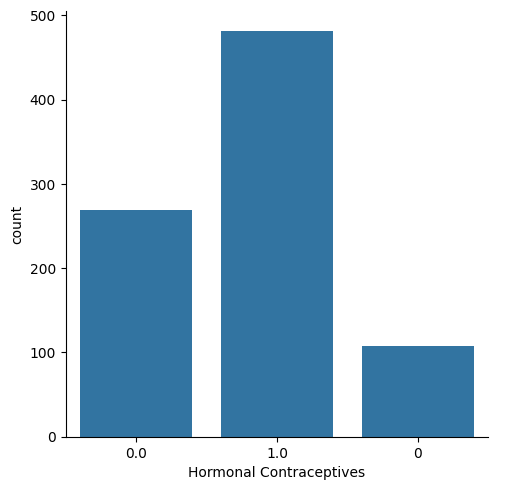

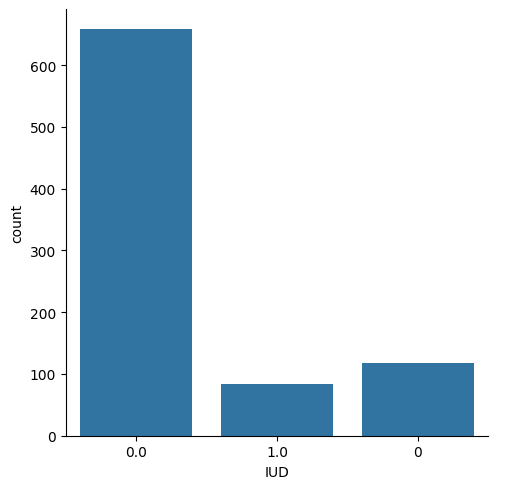

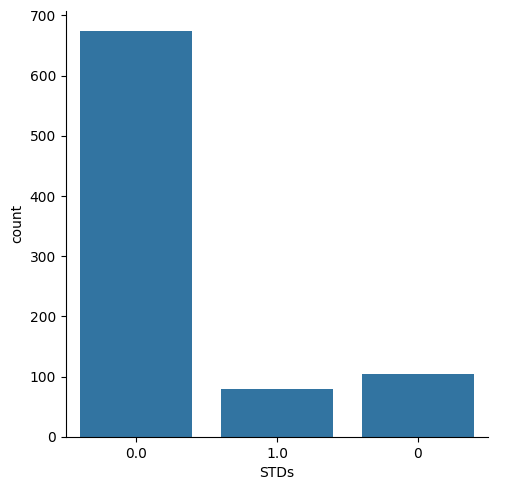

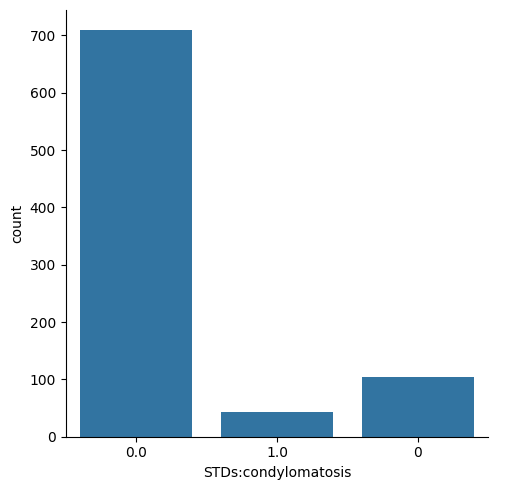

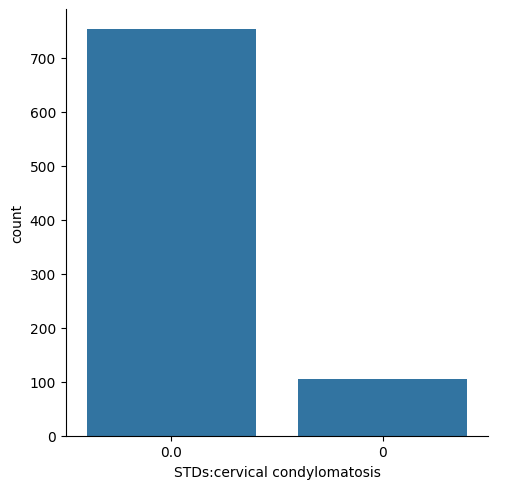

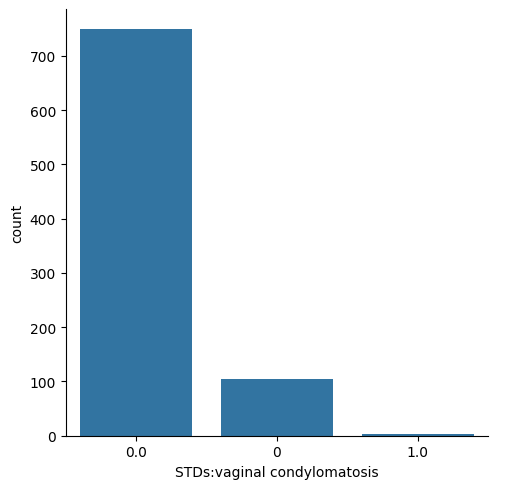

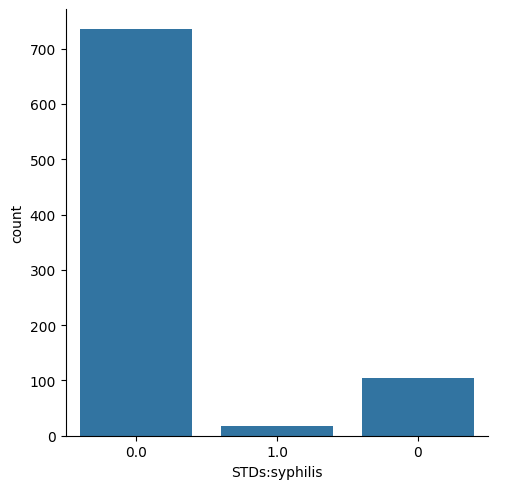

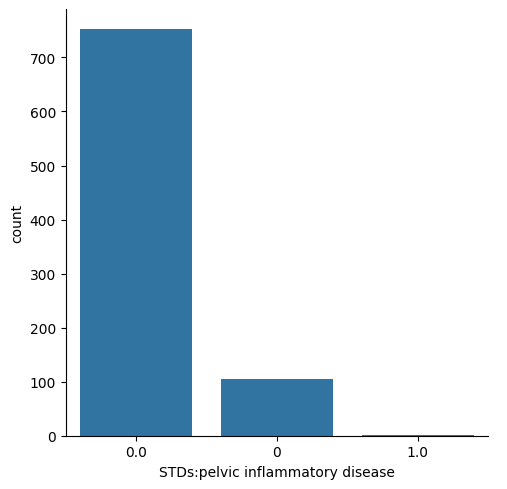

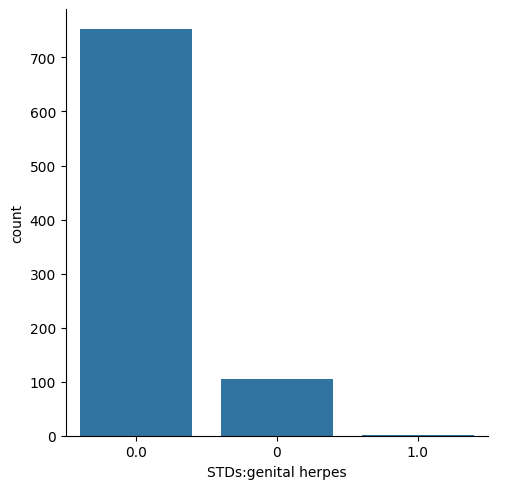

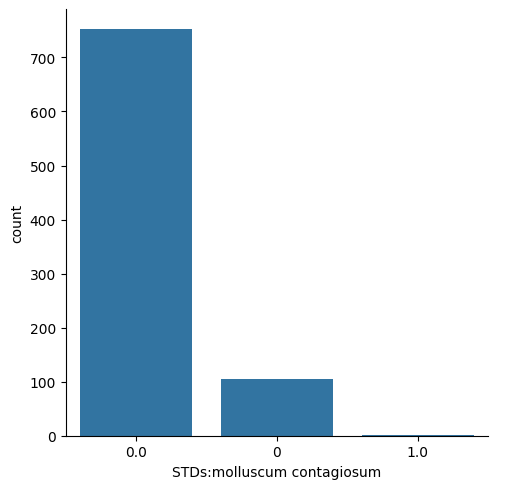

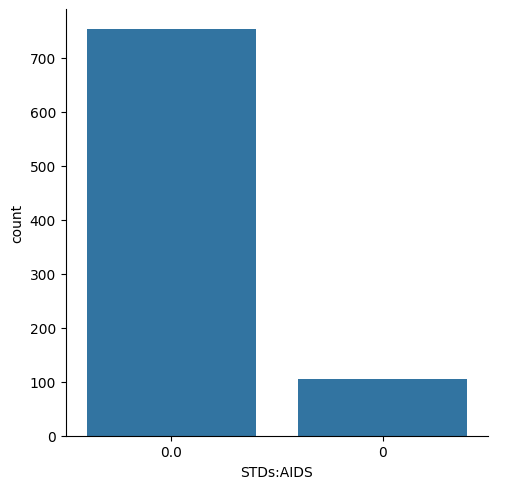

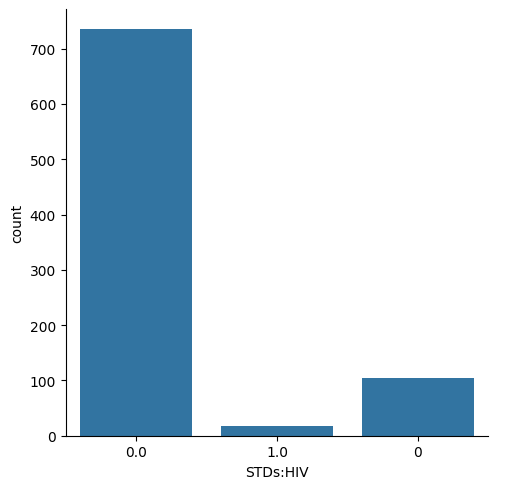

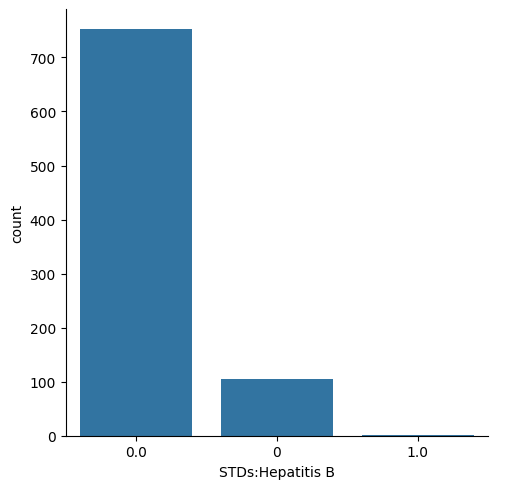

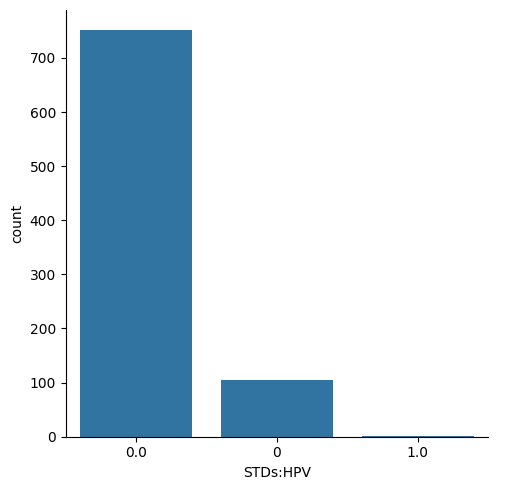

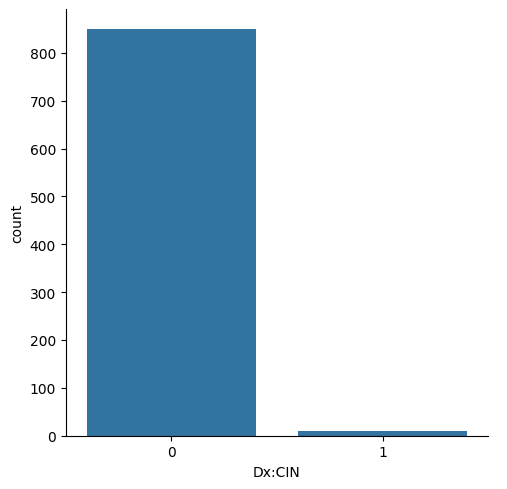

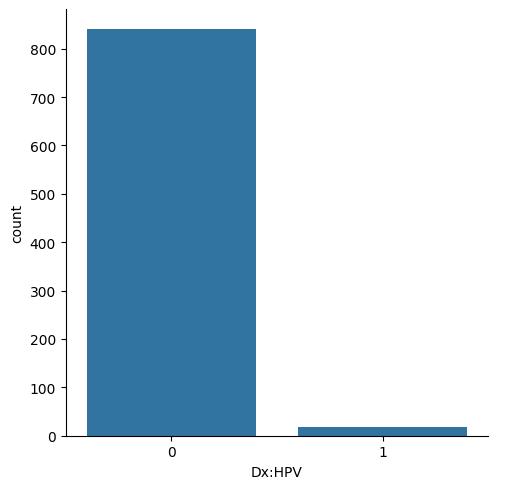

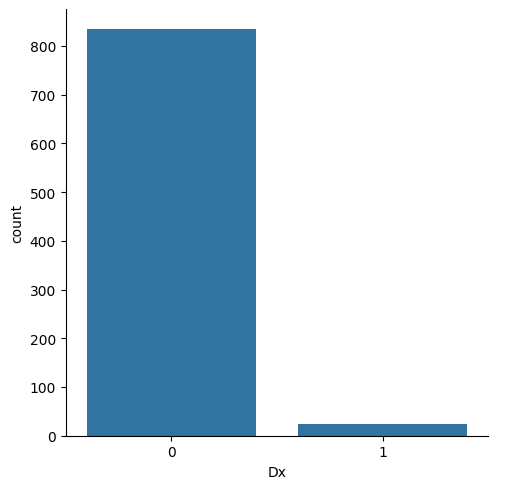

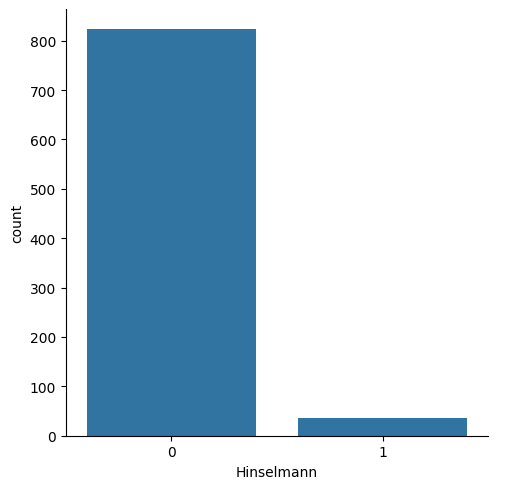

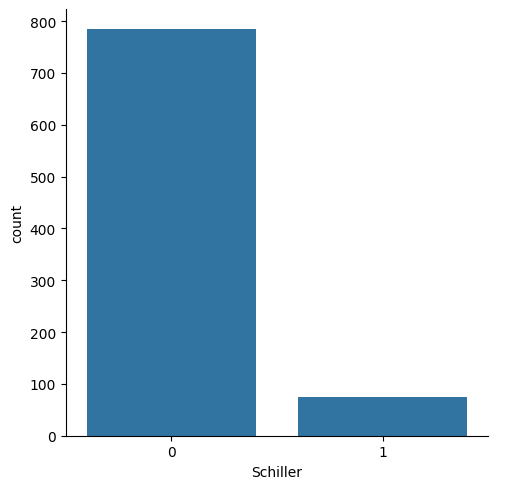

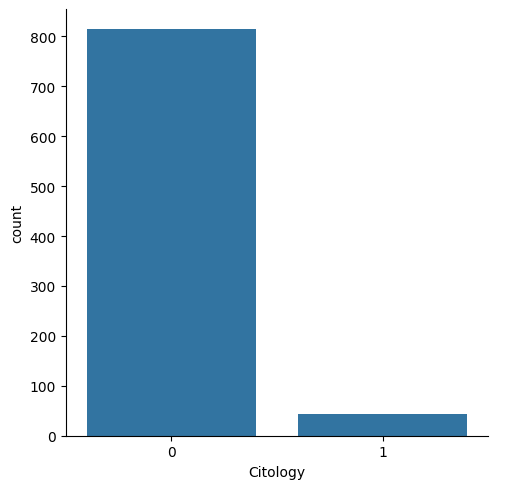

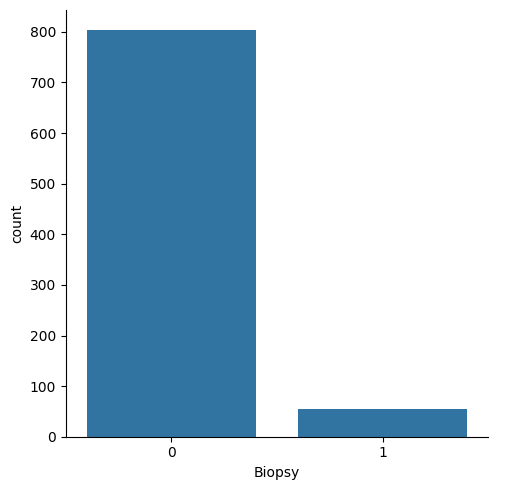

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


# ... (your other code)

for feature in df_columns:
   if feature in cancer.columns:

    sns.catplot(x=feature, kind="count", data=cancer) #Fixed: Specified 'x' as keyword argument
    plt.show() # Show each plot to avoid overlap


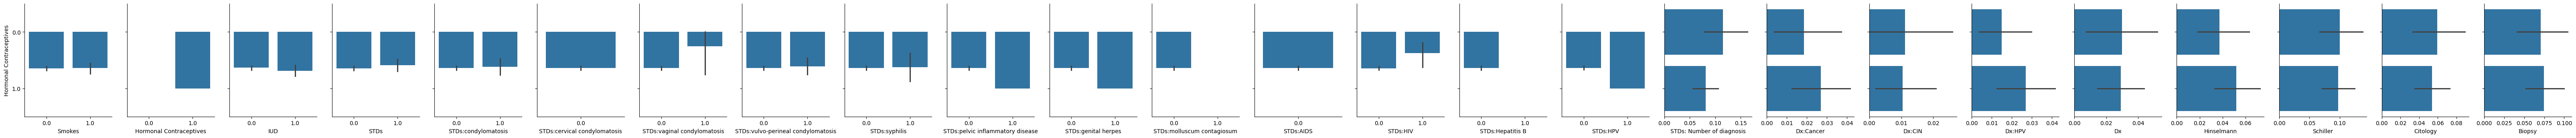

In [ ]:
g = sns.PairGrid(df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars=categorical_df,
                 aspect=.75, height=3.5)  # Changed 'size' to 'height'
g.map(sns.barplot, palette="pastel");

In [ ]:
numer=['Age','Number of sexual partners	','First sexual intercourse','Num of pregnancies','Smokes (years)',
       'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']


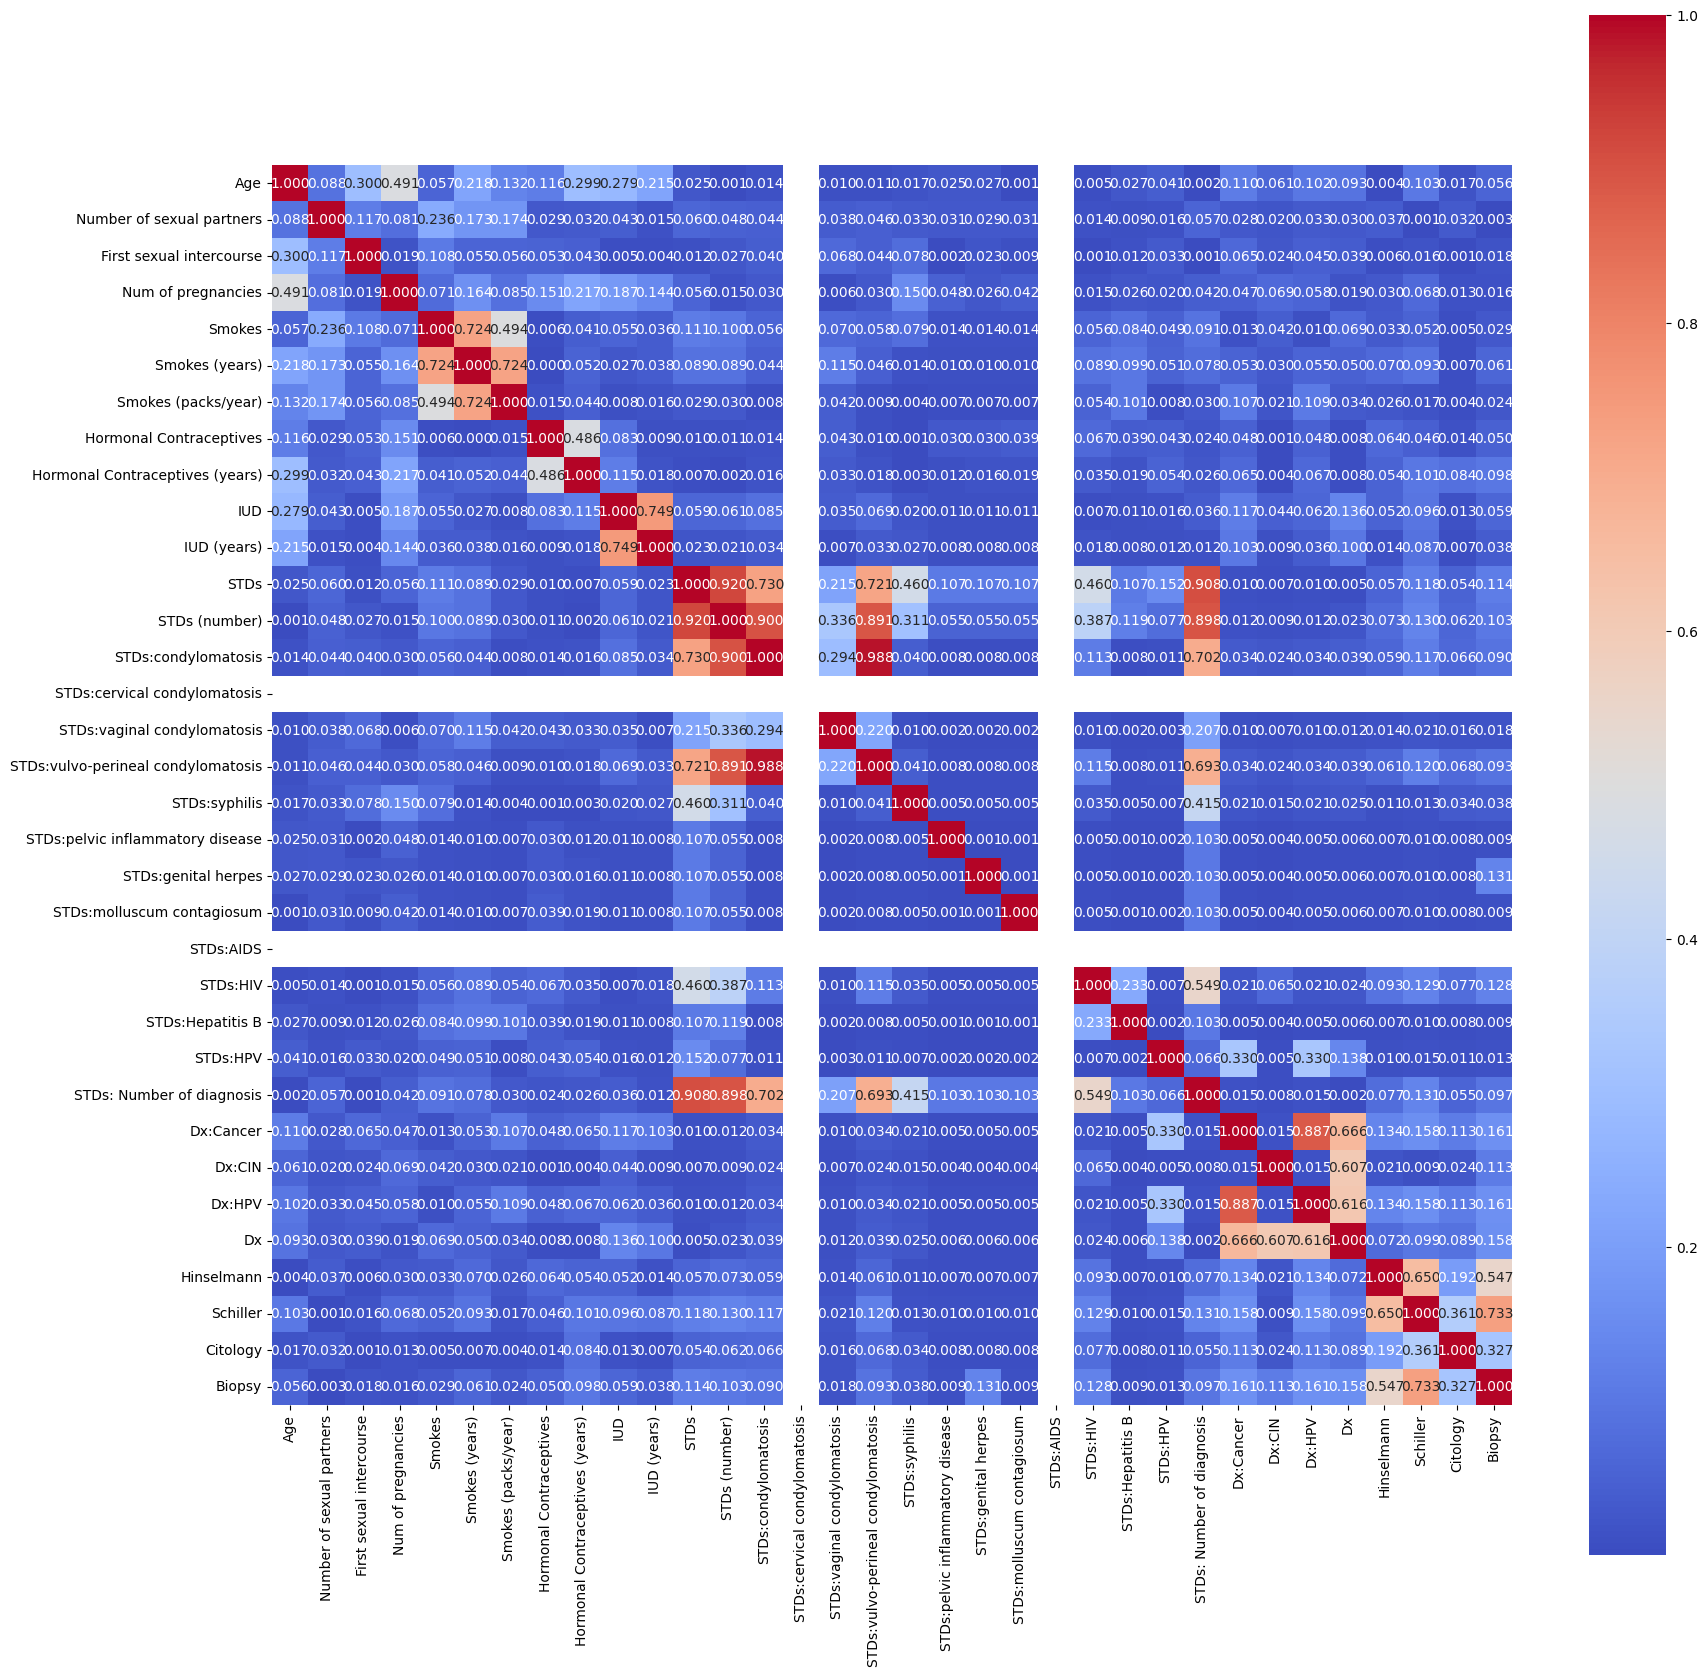

In [ ]:
for column in cancer.columns:
    try:
        cancer[column] = pd.to_numeric(cancer[column])
    except ValueError:
        cancer[column] = pd.to_numeric(cancer[column], errors='coerce')  # Replace '?' with NaN

# Now you can calculate the correlation and create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cancer.corr().abs(), annot=True, fmt='.3f', cmap='coolwarm', square=True)
plt.show()

**#Uni variate analysis**

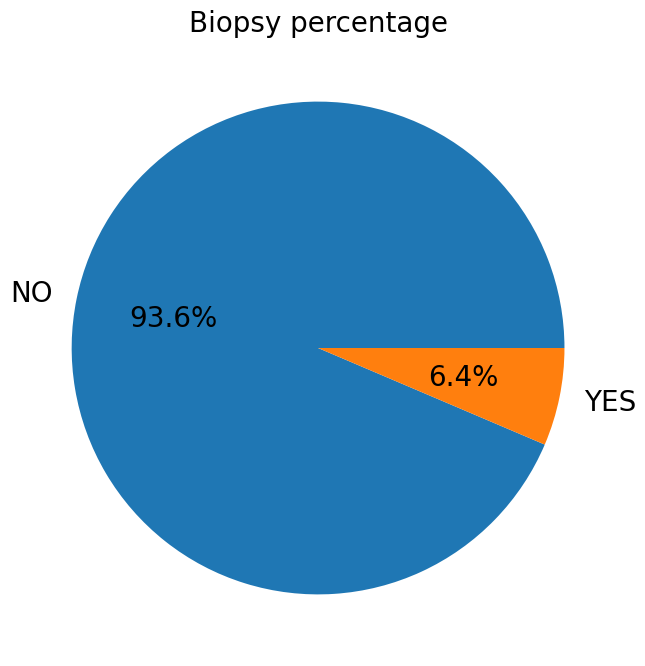

In [ ]:
impute=cancer.copy()
impute=cancer.astype(float)
impute=cancer.copy()
impute=cancer.astype(float)

plt.figure(figsize=(12,8))
plt.pie(impute['Biopsy'].value_counts(),labels=['NO','YES'],autopct='%1.1f%%',labeldistance=1.1,textprops={'fontsize':20})
plt.title('Biopsy percentage',fontsize=20)
plt.show()

Density Plots

****************************************************************************************************


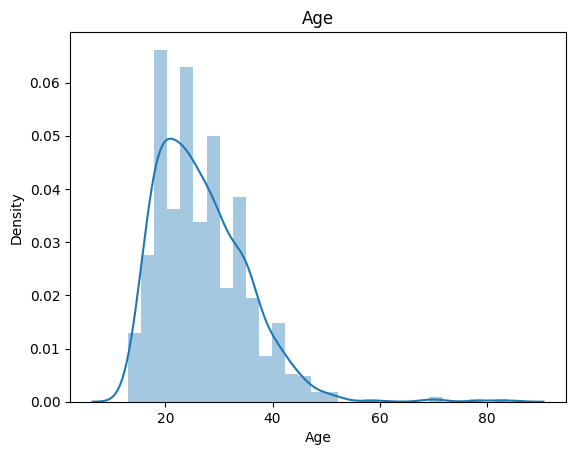

****************************************************************************************************


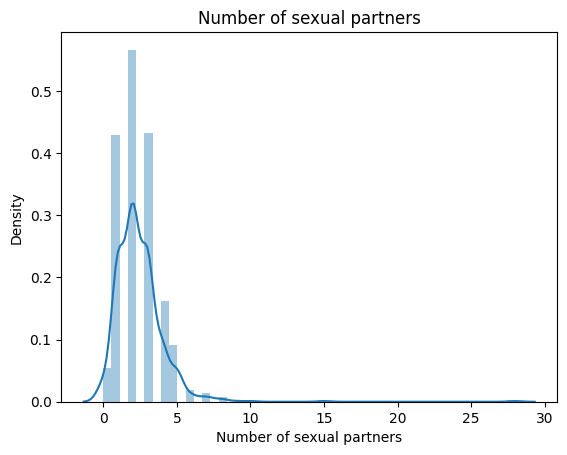

****************************************************************************************************


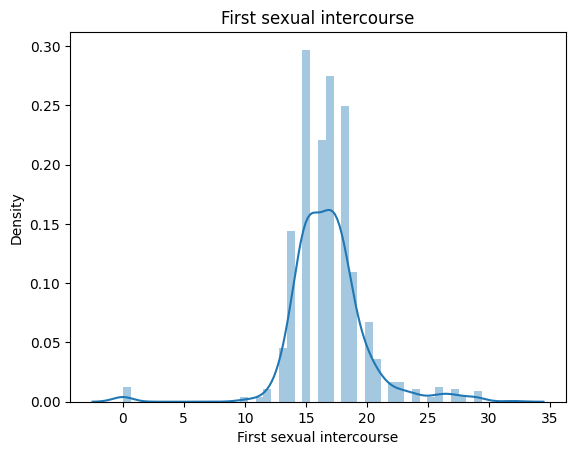

****************************************************************************************************


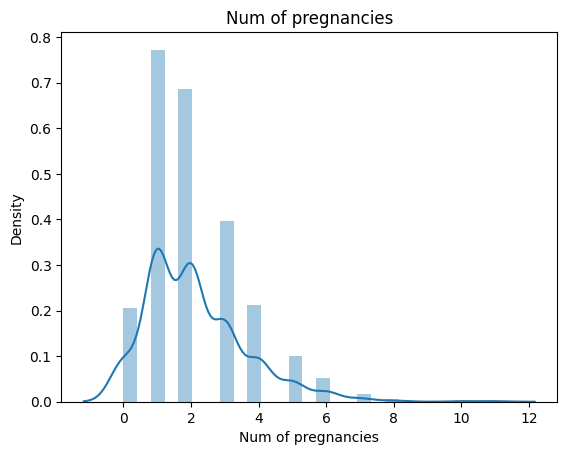

****************************************************************************************************


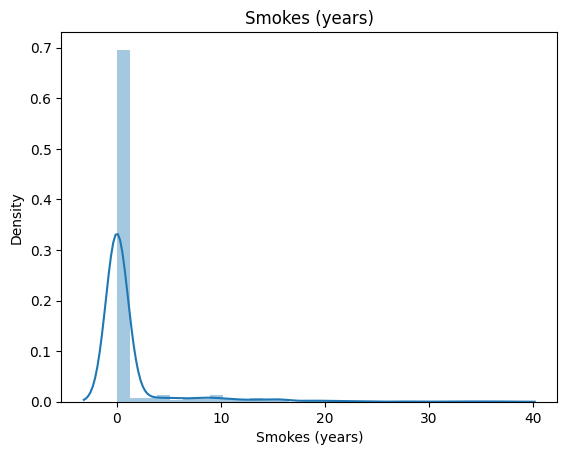

****************************************************************************************************


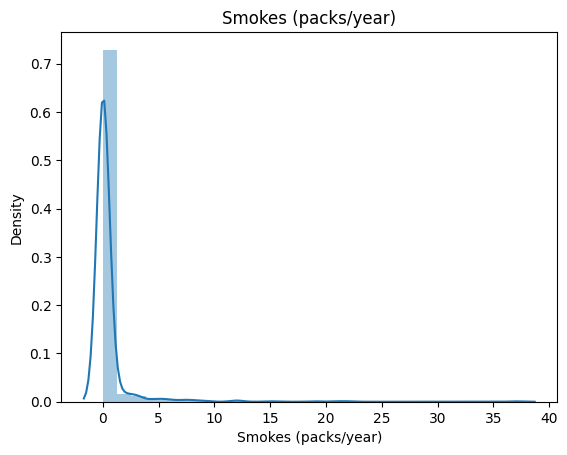

****************************************************************************************************


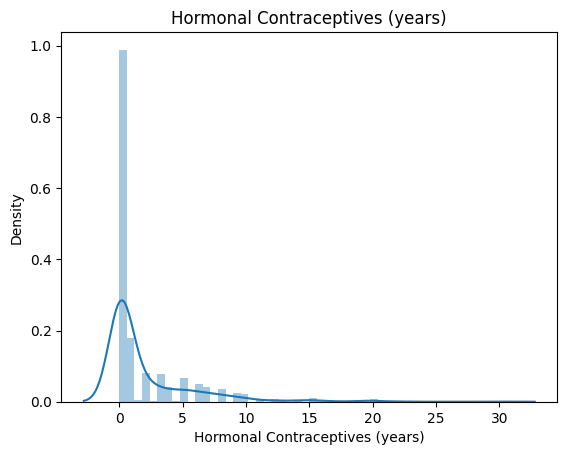

****************************************************************************************************


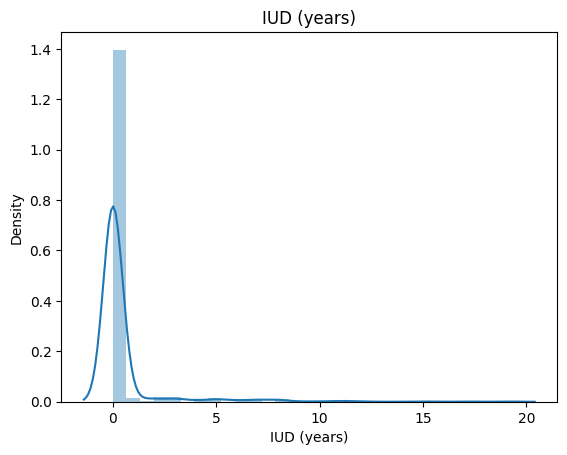

****************************************************************************************************


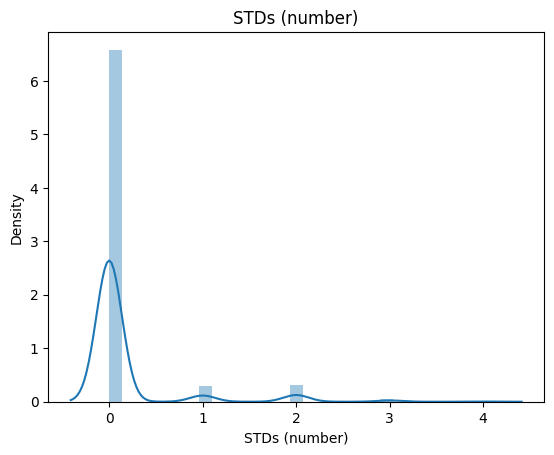

In [ ]:
numer=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
       'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
print("Density Plots");print()
for i in impute[numer]:
    print('*'*100)
    sns.distplot(impute[i])
    plt.title(i)
    plt.show()

In [ ]:
cancer["Hormonal Contraceptives (years)"]=pd.to_numeric(cancer["Hormonal Contraceptives (years)"])

In [ ]:
print('minmum:',min(cancer["Hormonal Contraceptives (years)"]))
print('maxmum:',max(cancer["Hormonal Contraceptives (years)"]))

minmum: 0.0
maxmum: 30.0


Women mean age facing the risk of cervical cancer 26.82051282051282


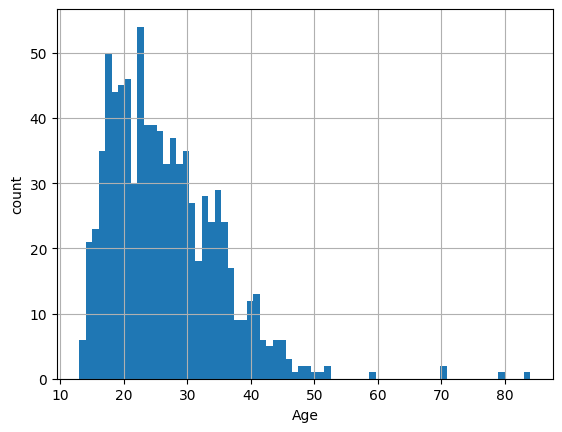

In [ ]:
cancer['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('count')
print('Women mean age facing the risk of cervical cancer',cancer['Age'].mean())

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

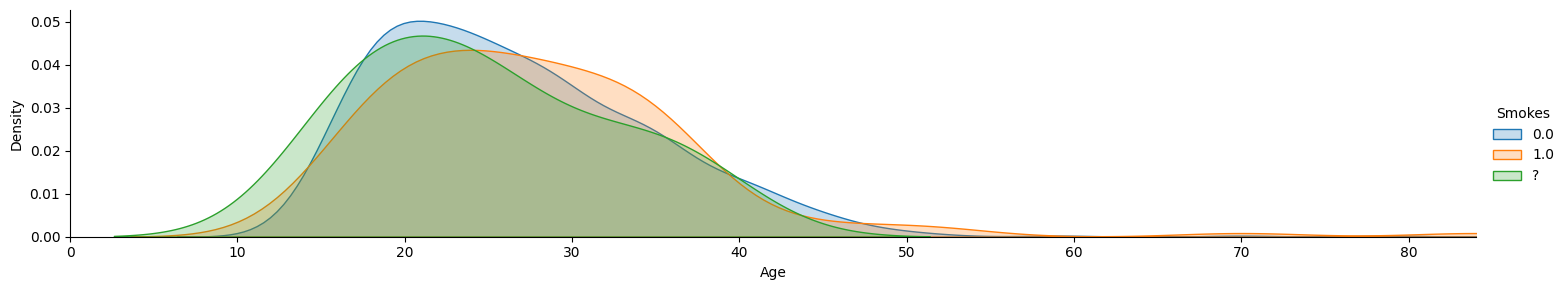

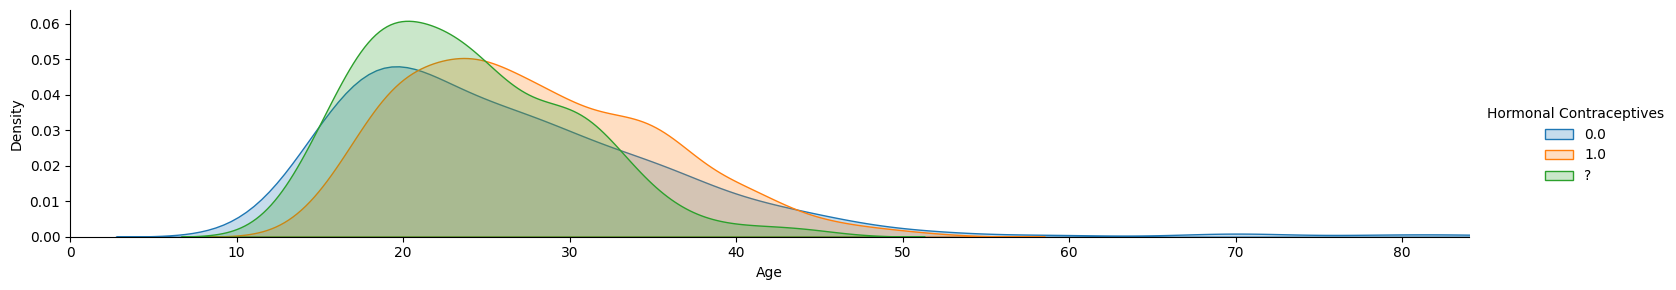

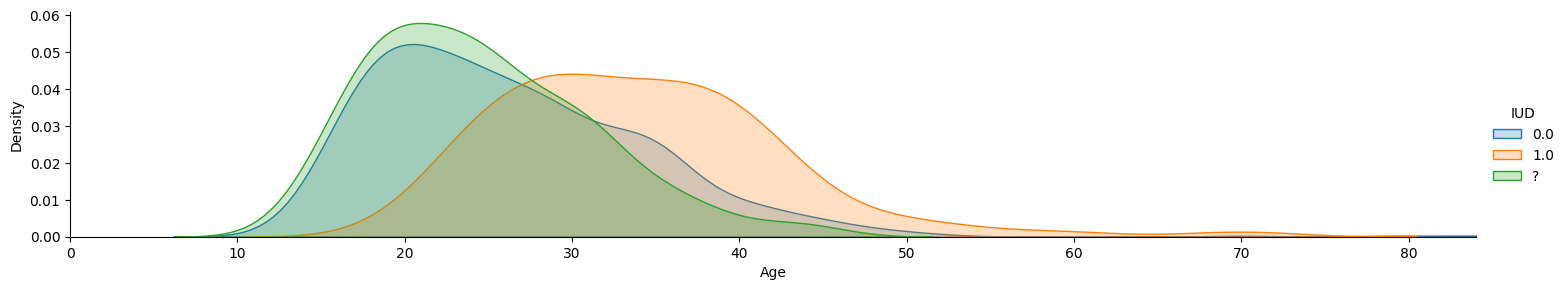

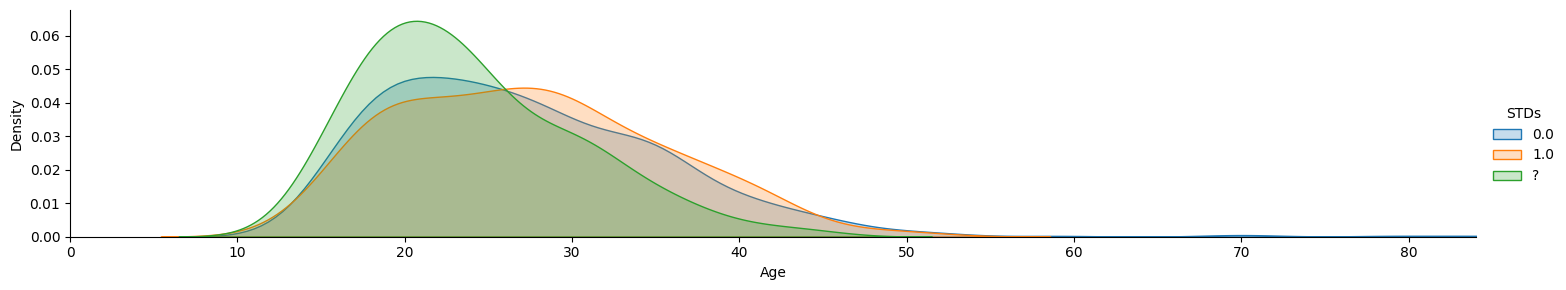

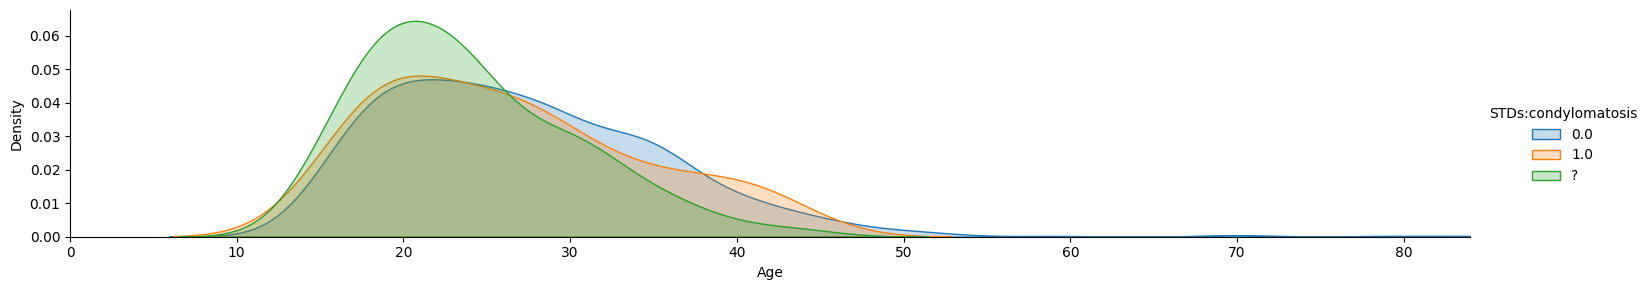

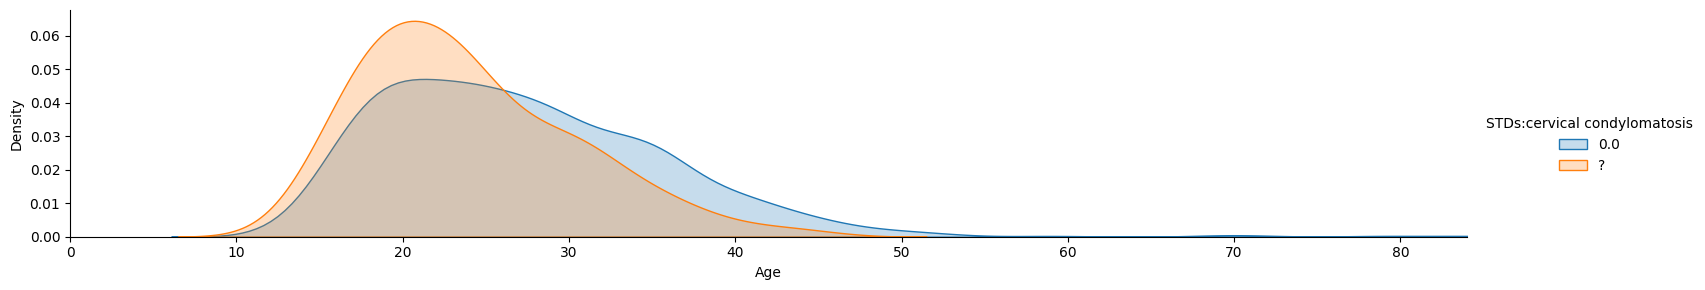

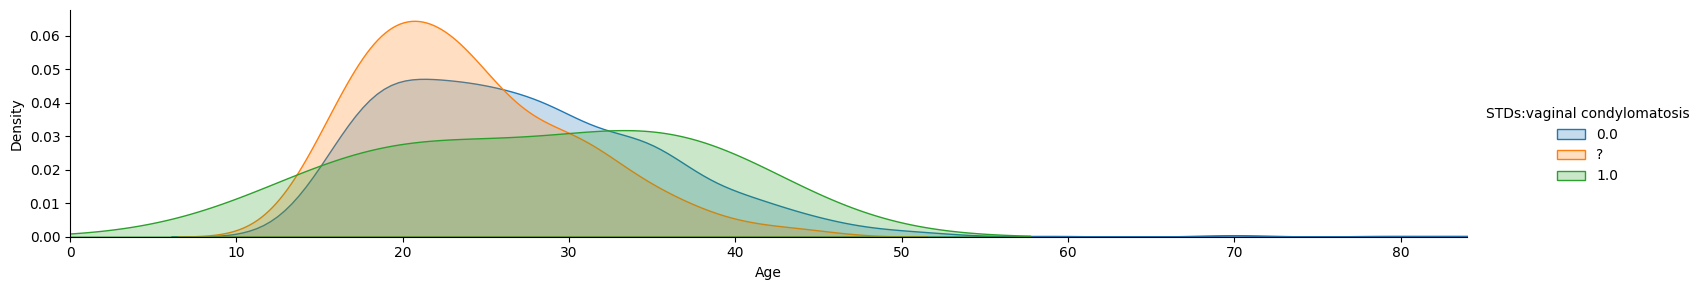

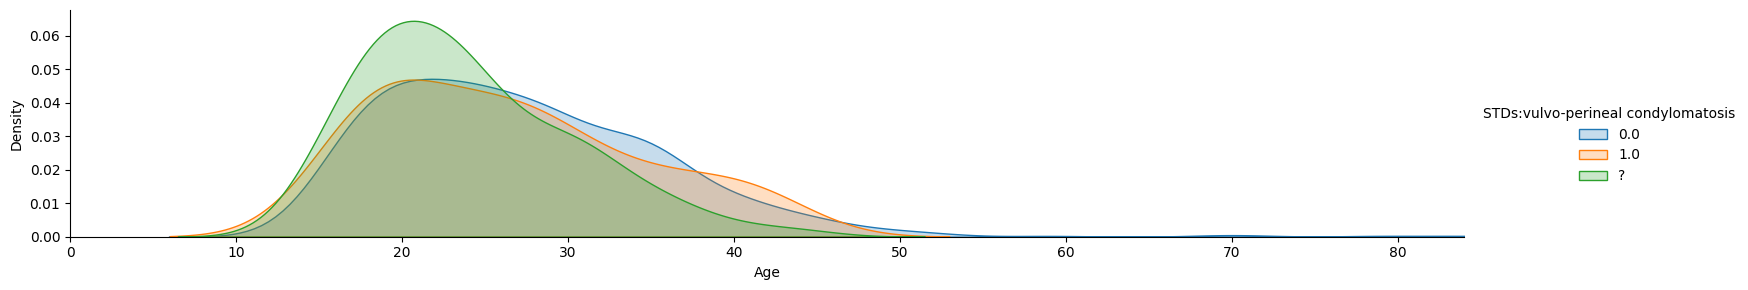

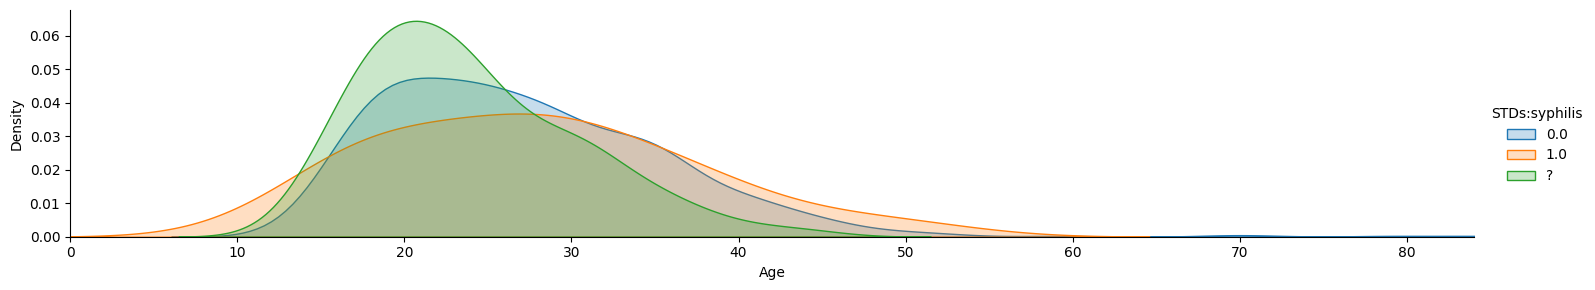

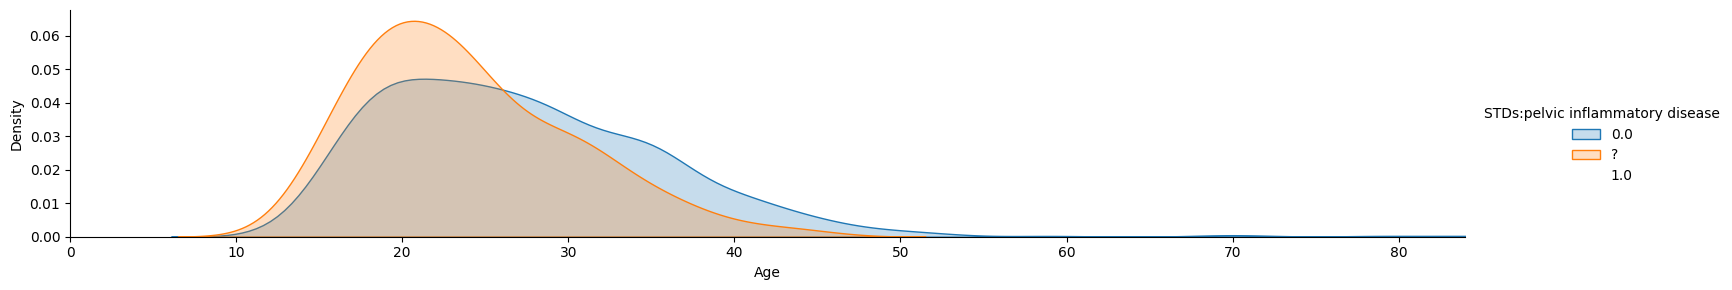

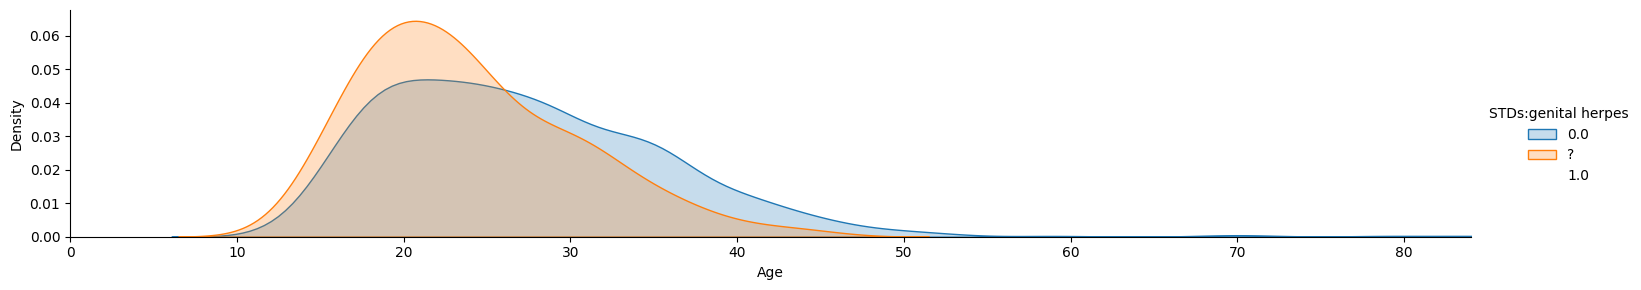

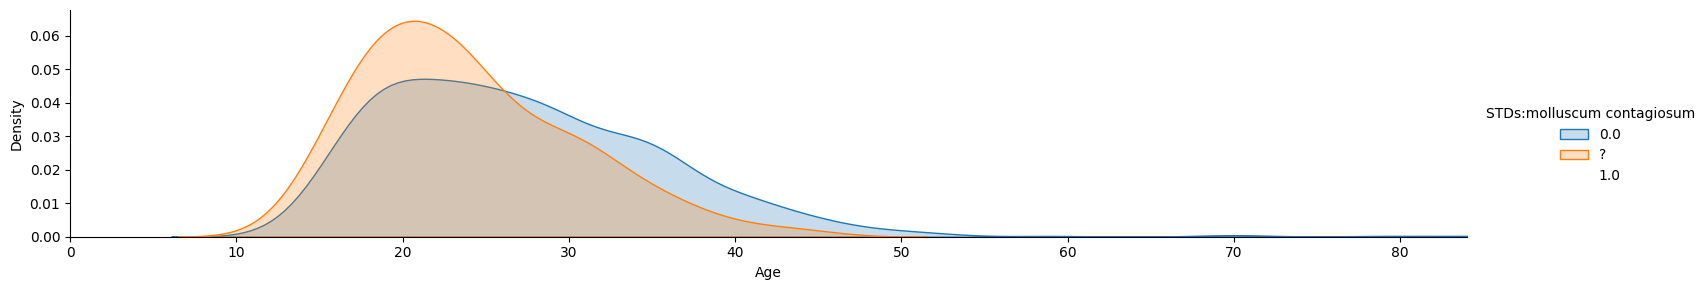

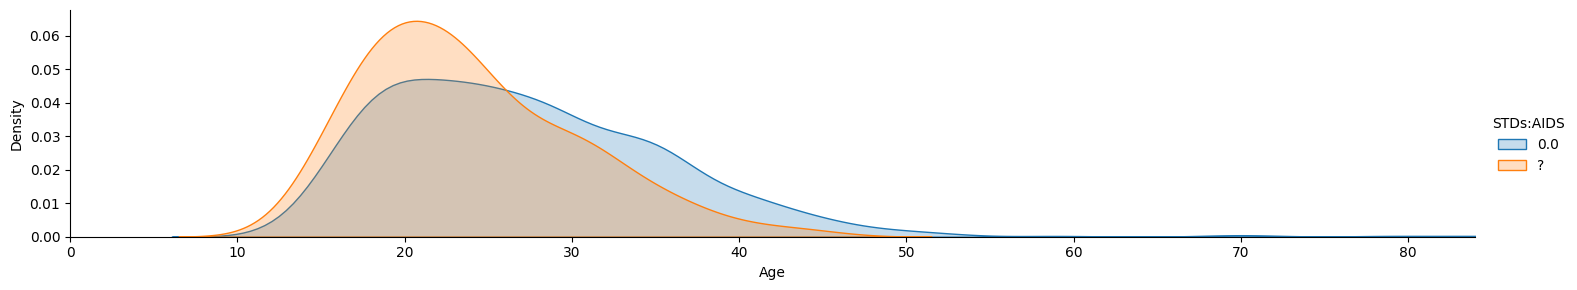

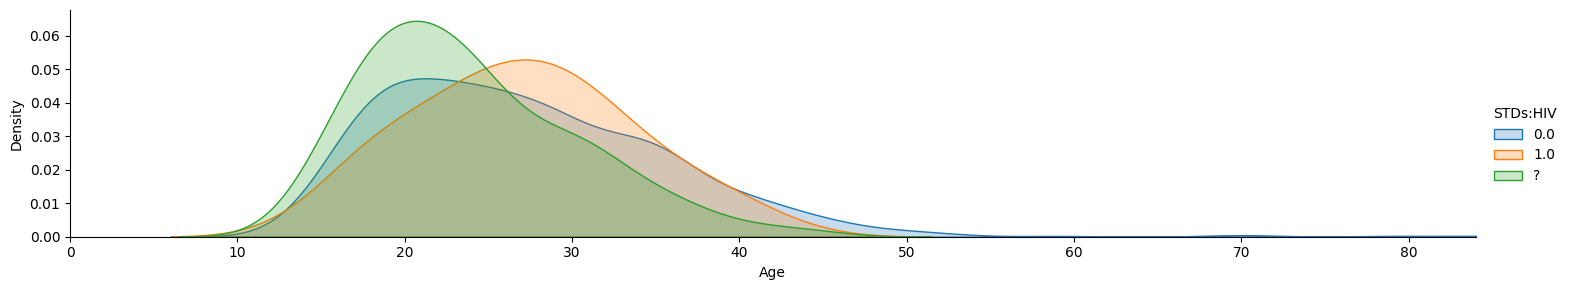

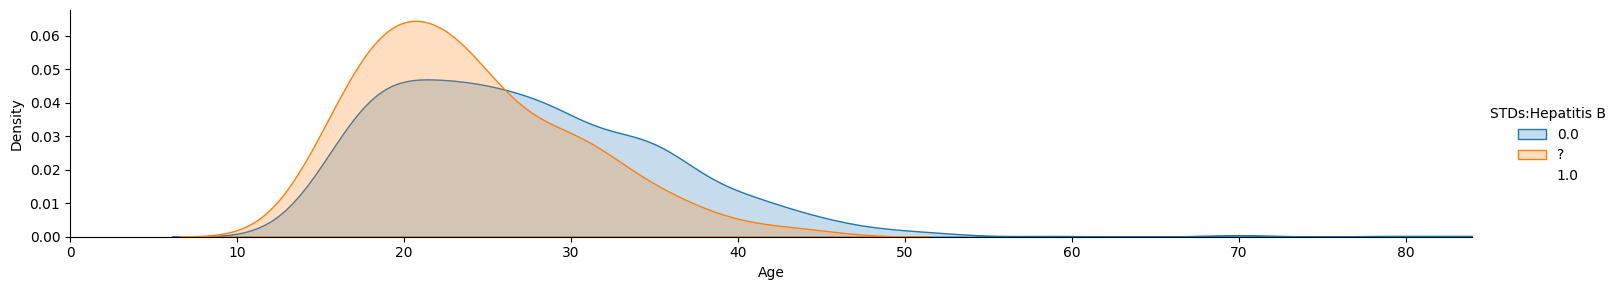

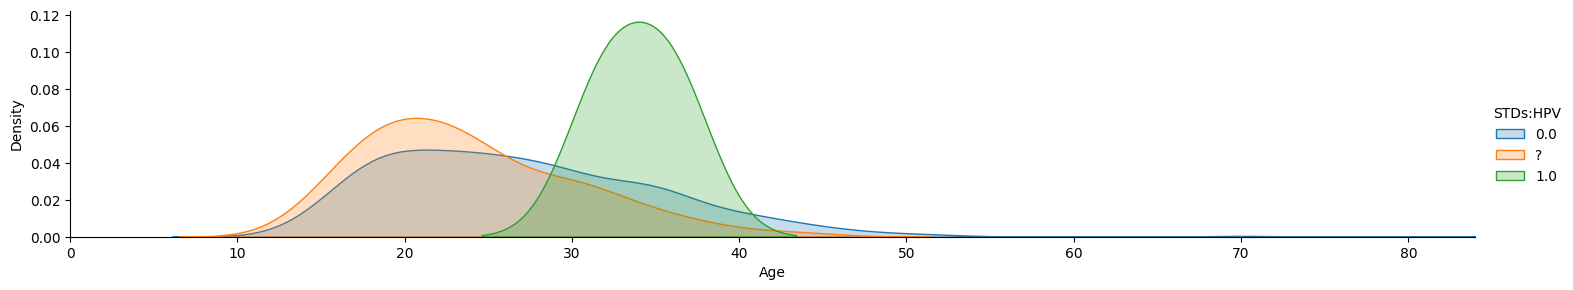

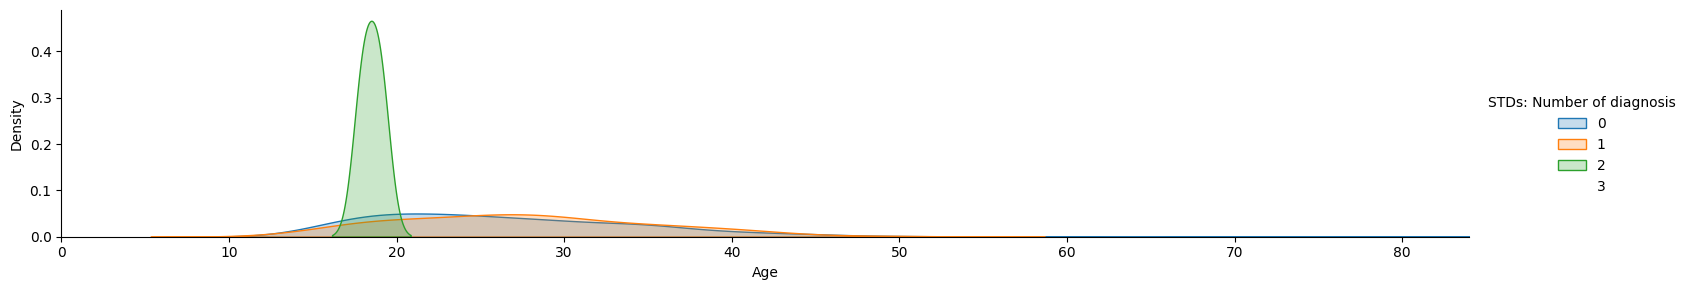

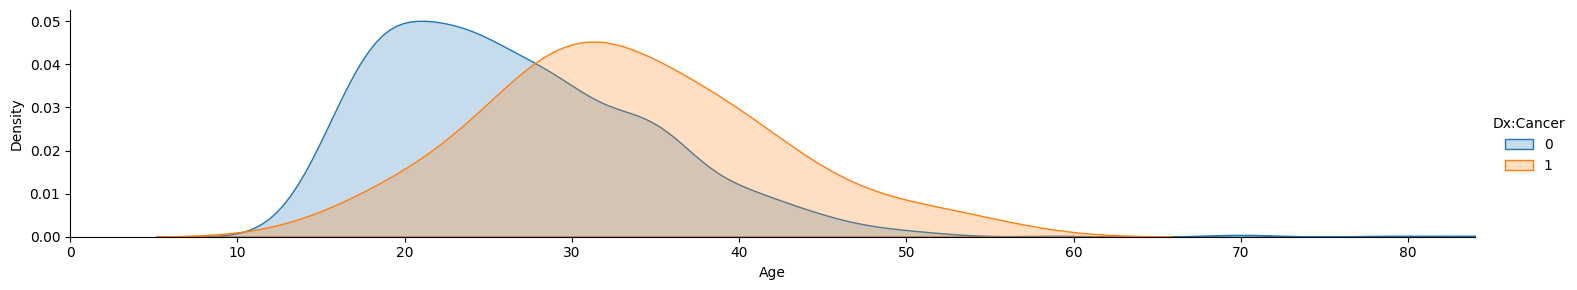

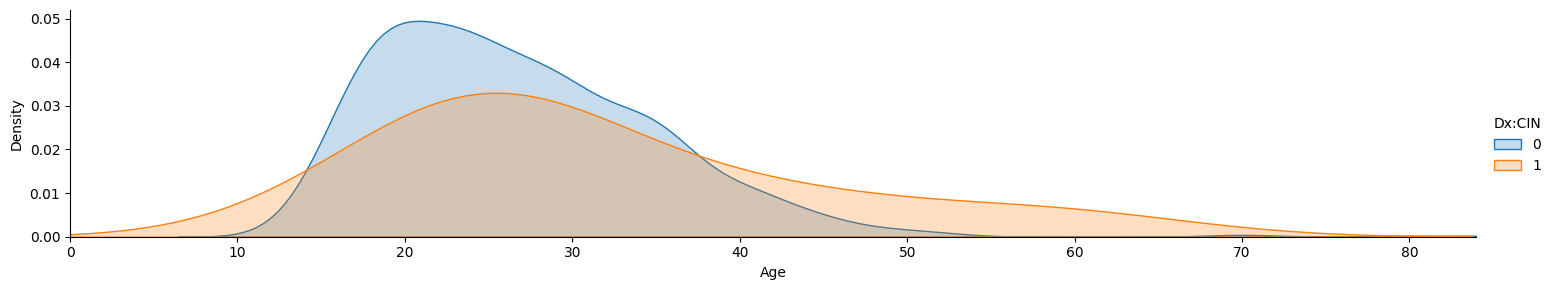

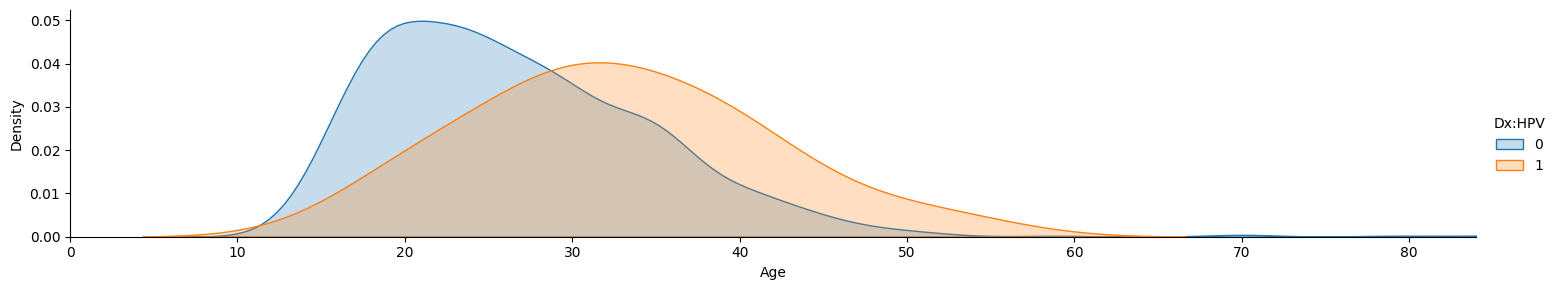

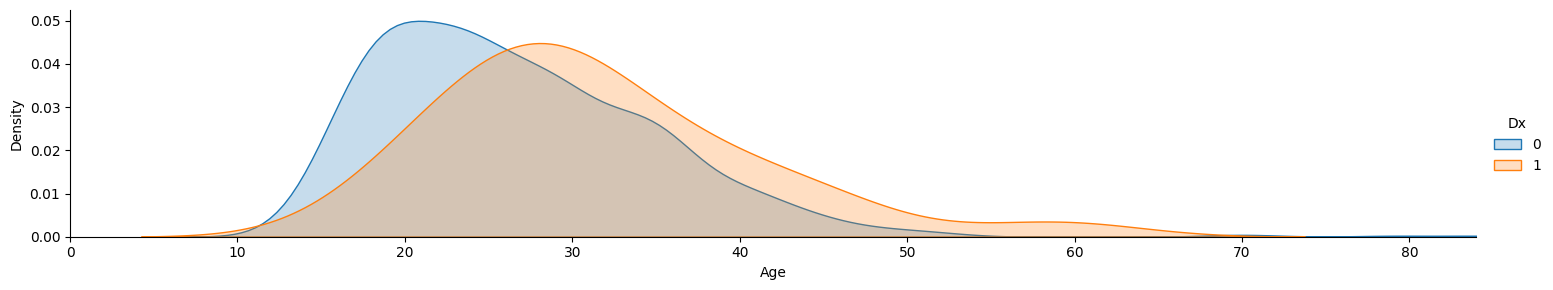

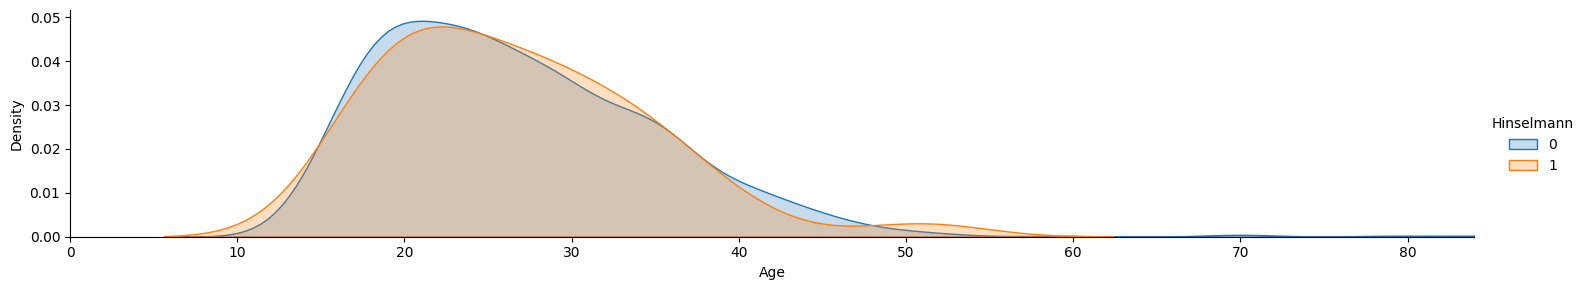

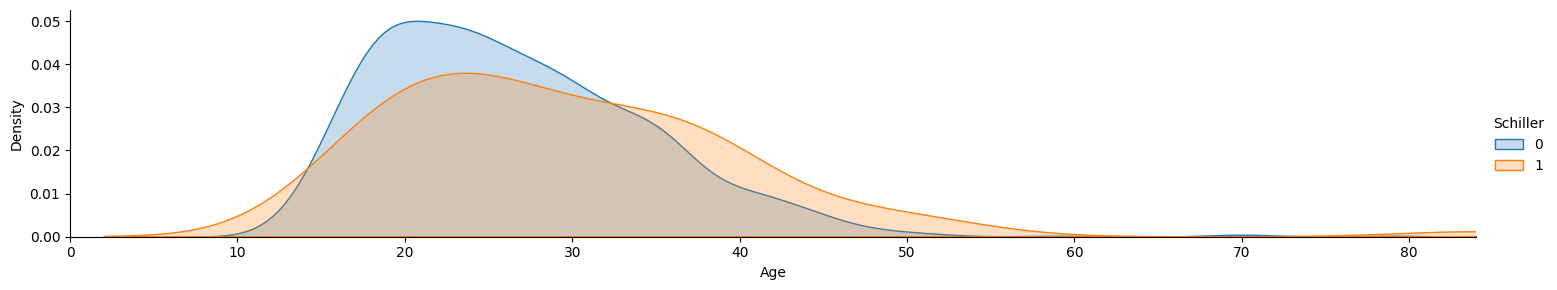

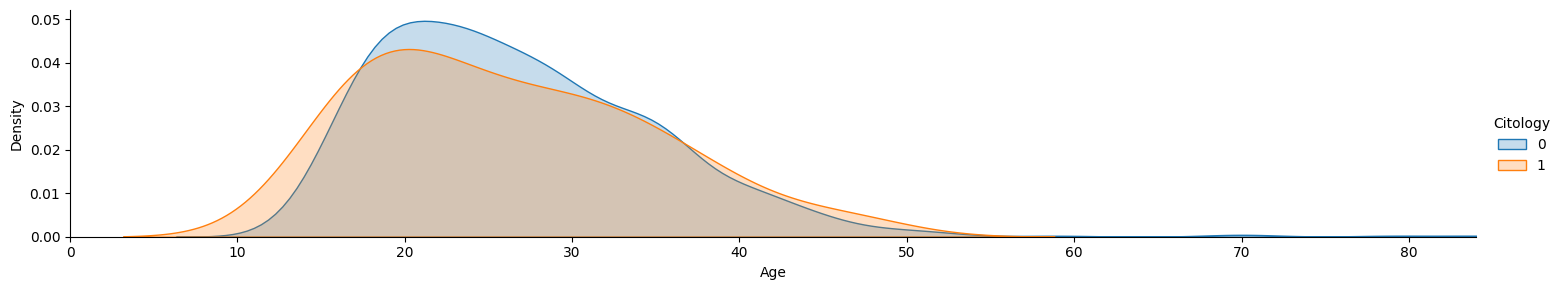

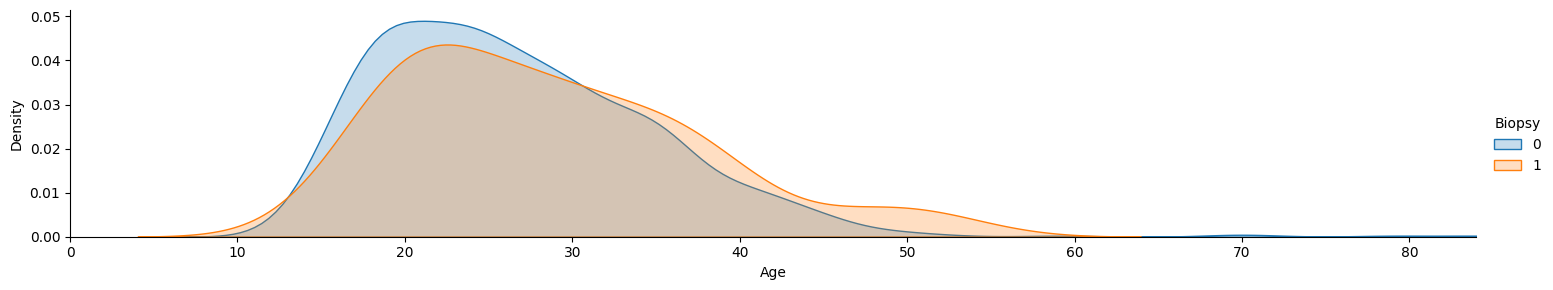

In [ ]:
for feature in categorical_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Age',shade=True)

 oldest = cancer_df['Age'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

In [ ]:
## removing the smokes column from the dataframe.

cancer_df.drop('Smokes',axis=1,inplace=True)

In [ ]:
smokes_table = pd.crosstab(index=cancer_df["Schiller"],
                          columns=(cancer_df["Smokes (years)"]))

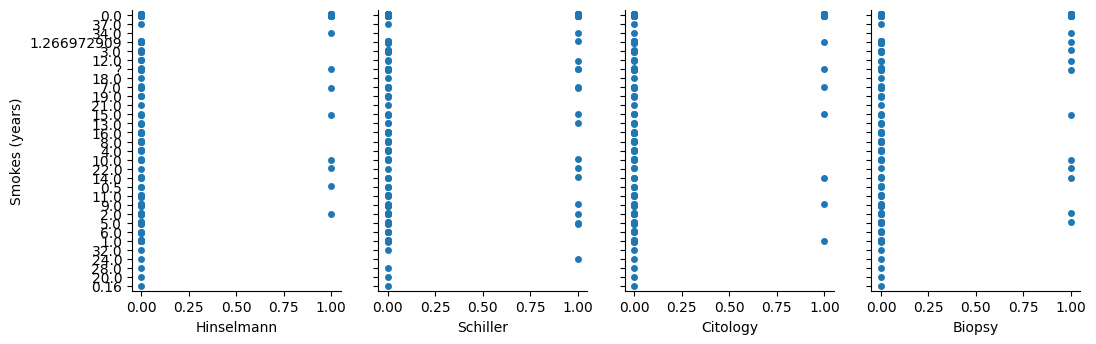

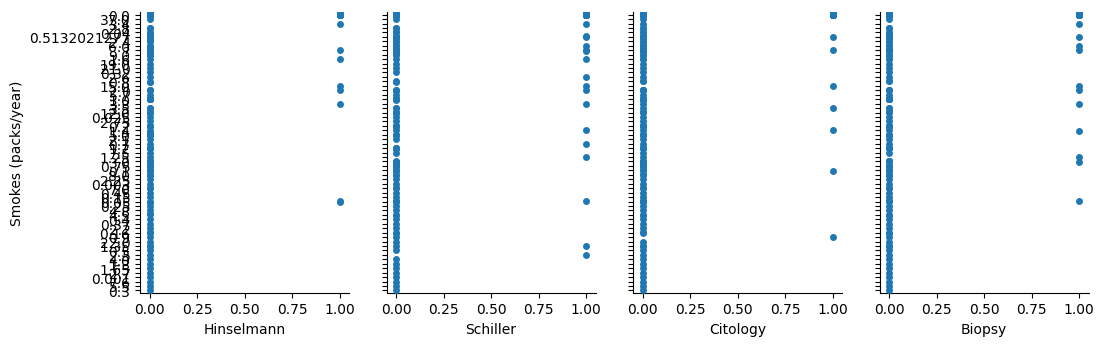

In [ ]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (years)'],
                 x_vars=category_df,
                 aspect=.75, height=3.5)  # Changed 'size' to 'height'
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars=category_df,
                 aspect=.75, height=3.5)  # Changed 'size' to 'height'
g.map(sns.stripplot, palette="spring");

Multivariate analysis

**Age and Sexual Habits vs Biopsy**

In [ ]:
impute.head()

In [ ]:
impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
impute=impute.rename(columns={'Smokes(years)':'Smokes_years','Smokes(packs/years)':'Smokes_packs_years',
                      'IUD(year)':'IUD_years','Hormonal Contraceptives (years) ':'Hormonal_Contraceptives_years'})

In [ ]:
impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
category_df=['Hinselmann','Schiller','Citology','Biopsy']

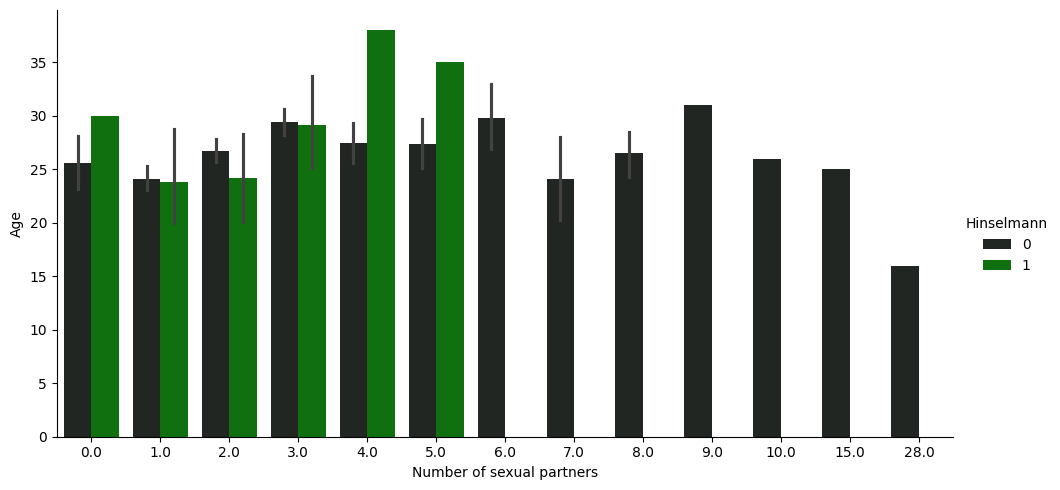

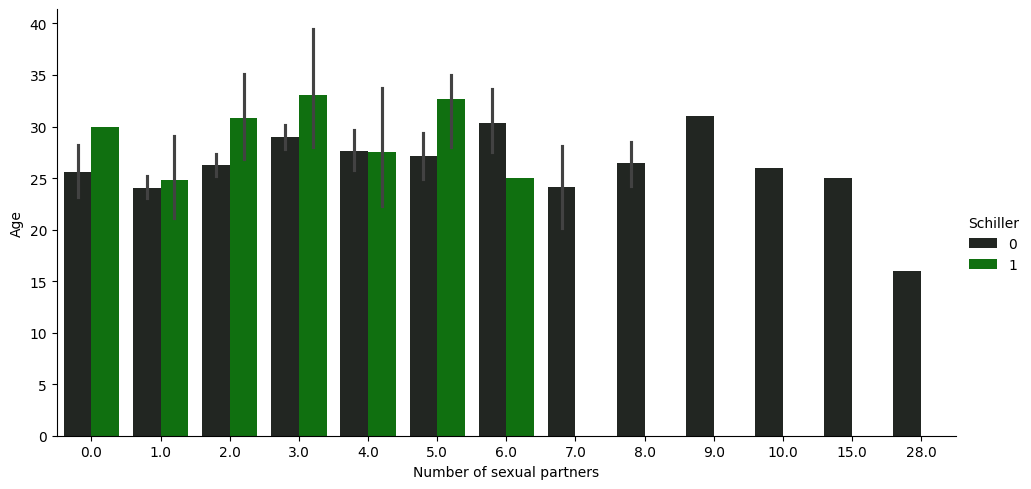

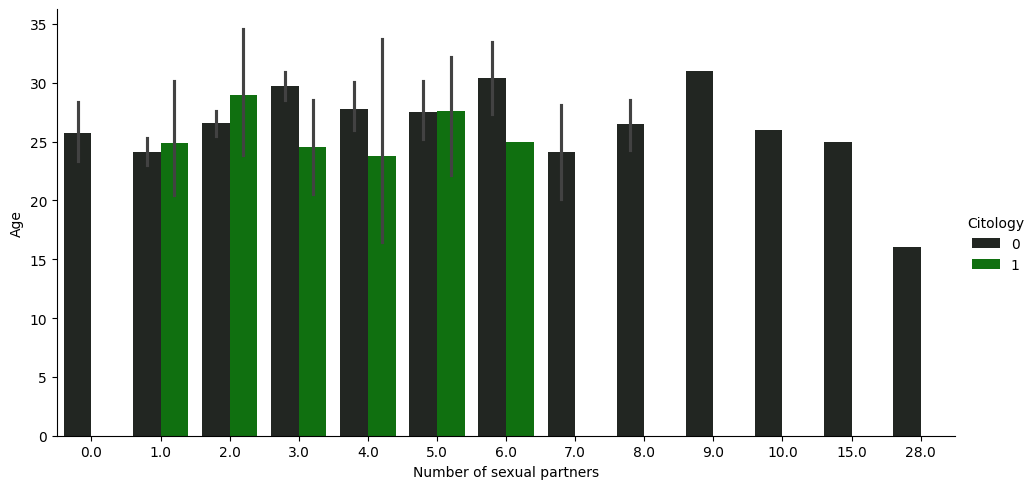

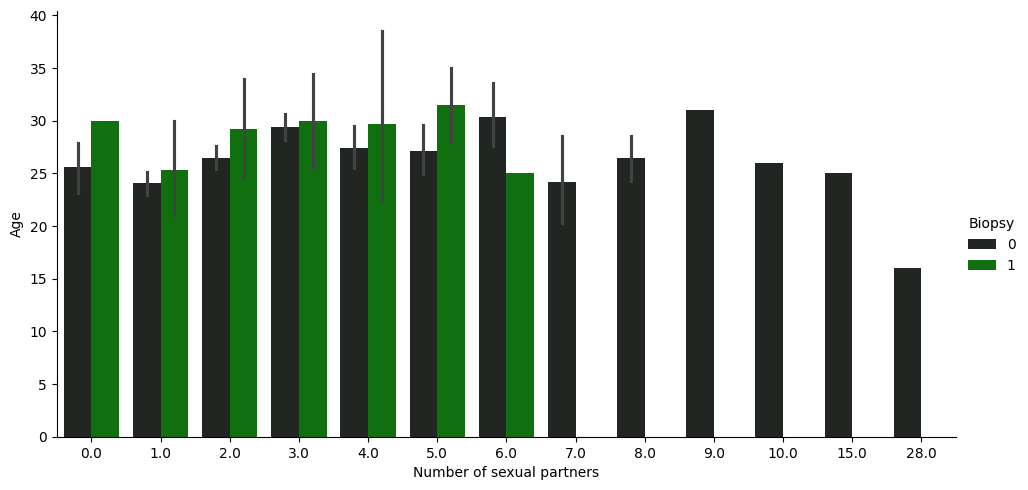

In [ ]:
for feature in category_df:
    sns.catplot(x='Number of sexual partners', y='Age', hue=feature,
                data=cancer, aspect=1.95, kind='bar', color='g') # Use catplot instead of factorplot
    plt.show() # This line is optional but helps to display each plot separately

**fecture selection**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/SEM-4/kag_risk_factors_cervical_cancer.csv')

# Data Preprocessing
data = data.replace('?', np.nan)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.median())

# Feature Selection using Mutual Information (MI)
X = data.drop(['Biopsy'], axis=1)
y = data['Biopsy']

# Calculate MI scores
mi_scores = mutual_info_classif(X, y)

# Select top 10 features based on MI scores
selector = SelectKBest(mutual_info_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Print selected features
print("Selected Features (using MI):", selected_features)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Selected Features (using MI): Index(['Age', 'Smokes (packs/year)', 'IUD (years)', 'STDs',
       'STDs:cervical condylomatosis', 'STDs:HIV', 'Dx:HPV', 'Hinselmann',
       'Schiller', 'Citology'],
      dtype='object')
Accuracy Score: 0.9186046511627907
Confusion Matrix:
 [[154   7]
 [  7   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.36      0.36      0.36        11

    accuracy                           0.92       172
   macro avg       0.66      0.66      0.66       172
weighted avg       0.92      0.92      0.92       172



**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
X = impute.drop('Biopsy', axis=1) # Features
Y = impute['Biopsy'] #Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [ ]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train ,Y_train)

LogisticRegression(random_state=33, solver='sag')

In [ ]:
logist_regress_train_score= LogisticRegressionModel.score(X_train, Y_train)
logist_regress_test_score=   LogisticRegressionModel.score(X_test, Y_test)

print(f'Using Logistic Regression, the score of training data is {round(logist_regress_train_score*100,2)} % and the score of test data is {round(logist_regress_test_score*100,2)} %')

Using Logistic Regression, the score of training data is 93.33 % and the score of test data is 94.96 %


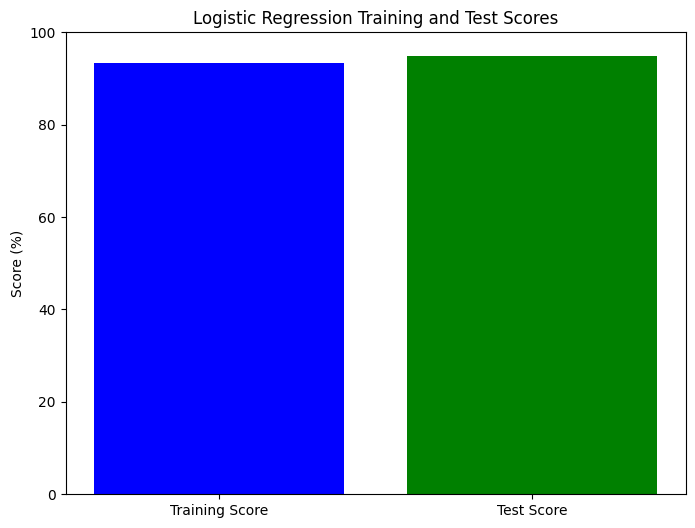

In [ ]:
import matplotlib.pyplot as plt


scores = [logist_regress_train_score * 100, logist_regress_test_score * 100]
labels = ['Training Score', 'Test Score']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Score (%)')
plt.title('Logistic Regression Training and Test Scores')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
plt.show()


<Axes: >

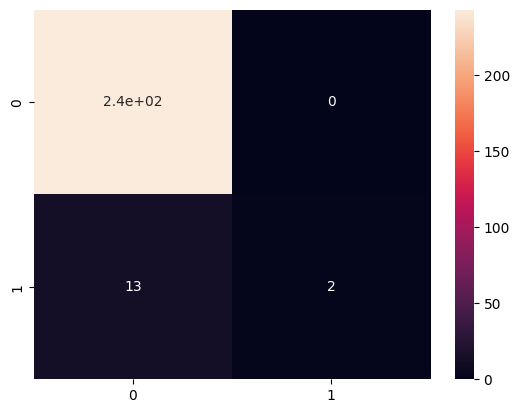

In [ ]:
y_pred_logisReg = LogisticRegressionModel.predict(X_test)

conf = confusion_matrix(Y_test,y_pred_logisReg )

sns.heatmap(conf, annot= True)


**SVC Model**

In [ ]:
SVCModel = SVC(kernel= 'poly',max_iter=100,C=0.95,gamma='auto')
SVCModel.fit(X_train, Y_train)

SVC(C=0.95, gamma='auto', kernel='poly', max_iter=100)

In [ ]:
from sklearn.model_selection import train_test_split # Make sure train_test_split is imported

X = impute.drop('Biopsy', axis=1)
Y = impute['Biopsy']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # Split the data

SVCModel = SVC(kernel='poly', max_iter=100, C=0.95, gamma='auto')
SVCModel.fit(X_train, Y_train) # Now Y_train is defined and the fit should work

SVC(C=0.95, gamma='auto', kernel='poly', max_iter=100)

In [ ]:
SVM_train_score = SVCModel.score(X_train, Y_train)  # Use SVCModel instead of SVMModel
SVM_test_score = SVCModel.score(X_test, Y_test)  # Use SVCModel instead of SVMModel

print(f'Using SVM, the score of training data is {round(SVM_train_score*100,2)} % and the score of test data is {round(SVM_test_score*100,2)} %')

Using SVM, the score of training data is 33.0 % and the score of test data is 30.23 %


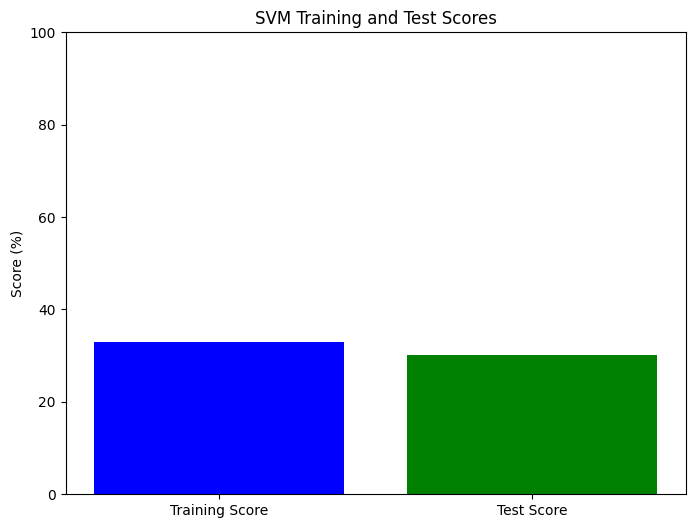

In [ ]:
scores = [SVM_train_score* 100, SVM_test_score * 100]
labels = ['Training Score', 'Test Score']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Score (%)')
plt.title('SVM Training and Test Scores')
plt.ylim(0, 100)
plt.show()

<Axes: >

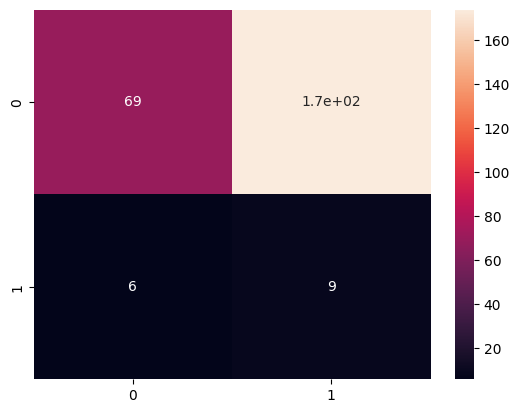

In [ ]:
y_pred_SVC = SVCModel.predict(X_test)

conf = confusion_matrix(Y_test,y_pred_SVC )

sns.heatmap(conf, annot= True)


**k-Nearest Neighbors (kNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_Nearest_Neighbors = KNeighborsClassifier(n_neighbors=5)
k_Nearest_Neighbors.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
k_Nearest_Neighbors_train_score = k_Nearest_Neighbors.score(X_train, Y_train)  # Use the instance
k_Nearest_Neighbors_test_score = k_Nearest_Neighbors.score(X_test, Y_test)    # Use the instance
print(f'Using KNeighborsClassifier, the score of training data is {round(k_Nearest_Neighbors_train_score*100,2)} % and the score of test data is {round(k_Nearest_Neighbors_test_score*100,2)} %') #Fixed: Changed variable names to k_Nearest_Neighbors_train_score and k_Nearest_Neighbors_test_score

Using KNeighborsClassifier, the score of training data is 93.83 % and the score of test data is 93.8 %


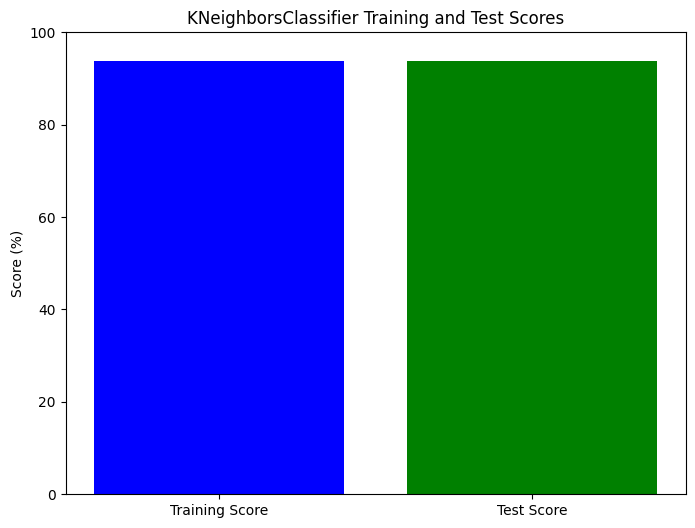

In [ ]:

scores = [k_Nearest_Neighbors_train_score* 100, k_Nearest_Neighbors_test_score * 100]
labels = ['Training Score', 'Test Score']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Score (%)')
plt.title('KNeighborsClassifier Training and Test Scores')
plt.ylim(0, 100)
plt.show()


<Axes: >

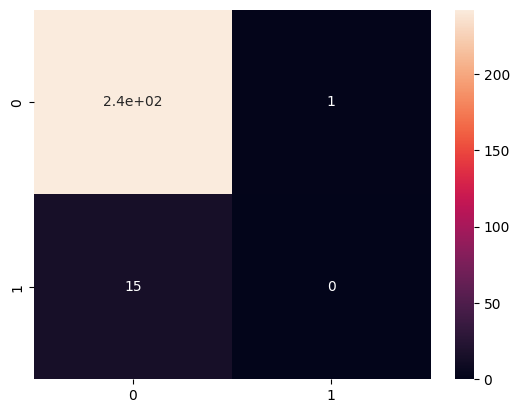

In [ ]:

y_pred_k_Nearest_Neighbors = k_Nearest_Neighbors.predict(X_test) # Use the fitted instance 'k_Nearest_Neighbors'

conf = confusion_matrix(Y_test, y_pred_k_Nearest_Neighbors) # Use the correct predictions

sns.heatmap(conf, annot=True)

**RandomForest(RF)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
#Fit the RandomForestClassifier instead of the k_Nearest_Neighbors in this cell
RandomForestClassifier.fit(X_train, Y_train) #This line fits/trains the RandomForestClassifier model

RandomForestClassifier(random_state=42)

In [ ]:
RandomForestClassifier_train_score = RandomForestClassifier.score(X_train, Y_train)  # Use the instance
RandomForestClassifier_test_score = RandomForestClassifier.score(X_test, Y_test)    # Use the instance
#Corrected the print statement to use the correct train score
print(f'Using RandomForestClassifier, the score of training data is {round(RandomForestClassifier_train_score*100,2)} % and the score of test data is {round(RandomForestClassifier_test_score*100,2)} %')

Using RandomForestClassifier, the score of training data is 100.0 % and the score of test data is 95.35 %


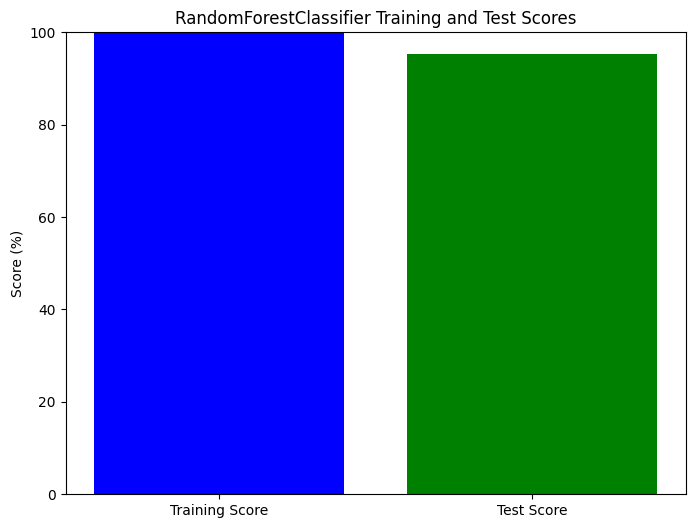

In [ ]:

scores = [RandomForestClassifier_train_score* 100, RandomForestClassifier_test_score * 100]
labels = ['Training Score', 'Test Score']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Score (%)')
plt.title('RandomForestClassifier Training and Test Scores')
plt.ylim(0, 100)
plt.show()

<Axes: >

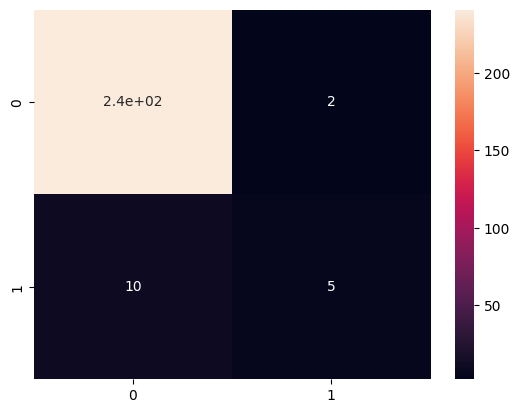

In [ ]:
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test) # Use the fitted instance 'k_Nearest_Neighbors'

conf = confusion_matrix(Y_test, y_pred_RandomForestClassifier) # Use the correct predictions

sns.heatmap(conf, annot=True)

Model Accuracy: 100.00%


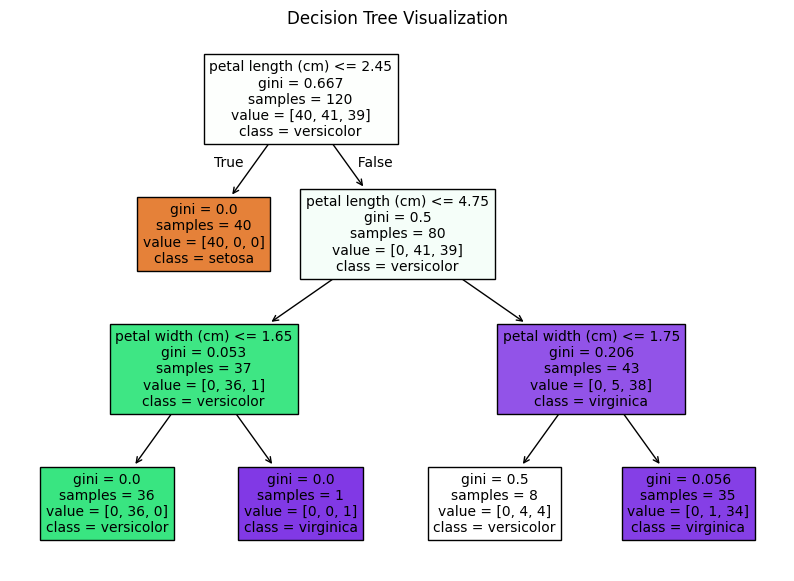

Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



In [ ]:
# Importing required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Training the model
clf.fit(X_train, y_train)

# Predicting on the test data
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualizing the Decision Tree
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Displaying the tree rules
tree_rules = export_text(clf, feature_names=data.feature_names)
print("Decision Tree Rules:")
print(tree_rules)


In [ ]:
# Importing required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the KNN model
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Training the model
knn.fit(X_train, y_train)

# Predicting on the test data
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 1099:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Model Accuracy: 1099.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**5(models-Deep Leraning)**

In [ ]:


import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import joblib
import cv2
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SEM-4/kag_risk_factors_cervical_cancer.csv")
df.head(10)

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   
5   42                       3.0                     23.0                2.0   
6   51                       3.0                     17.0                6.0   
7   26                       1.0                     26.0                3.0   
8   45                       1.0                     20.0                5.0   
9   44                       3.0                     15.0                  ?   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   
5    0.0            0.0                 0.0                     0.0   
6    1.0           34.0                 3.4                     0.0   
7    0.0            0.0                 0.0                     1.0   
8    0.0            0.0                 0.0                     0.0   
9    1.0    1.266972909                 2.8                     0.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   
5                             0.0  0.0  ...                                ?   
6                             0.0  1.0  ...                                ?   
7                             2.0  1.0  ...                                ?   
8                             0.0  0.0  ...                                ?   
9                             0.0    ?  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   
5                               ?         0      0      0  0          0   
6                               ?         0      0      0  0          1   
7                               ?         0      0      0  0          0   
8                               ?         1      0      1  1          0   
9                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  
5        0        0      0  
6        1        0      1  
7        0        0      0  
8        0        0      0  
9        0        0      0  

[10 rows x 36 columns]

In [ ]:
#Checks null values
df = df.replace('?', np.NaN)
print(df.isnull().sum())
print('Total number of null values: ',df.isnull().sum().sum())
#Drops two columns of STDs
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)
numerical_df = ['Age', 'Number of sexual partners', \
'First sexual intercourse','Num of pregnancies', \
'Smokes (years)', 'Smokes (packs/year)',\
'Hormonal Contraceptives (years)','IUD (years)',\
'STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD',\
'STDs', 'STDs:condylomatosis','STDs:cervical condylomatosis',\
'STDs:vaginal condylomatosis',\
'STDs:vulvo-perineal condylomatosis','STDs:syphilis',\
'STDs:pelvic inflammatory disease', 'STDs:genital herpes',\
'STDs:molluscum contagiosum', 'STDs:AIDS', \
'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', \
'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN',\
'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology',
'Biopsy']
#Fills the missing values of numeric data columns with mean of the column data.
for feature in numerical_df:
    print(feature,'',df[feature].apply(pd.to_numeric,errors='coerce').mean())
    feature_mean = round(df[feature].apply(pd.to_numeric, errors='coerce').mean(),1)
    df[feature] = df[feature].fillna(feature_mean)
for feature in categorical_df:
    df[feature] = df[feature].apply(pd.to_numeric, \
    errors='coerce').fillna(1.0)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
X = df.drop('Biopsy', axis =1).apply(pd.to_numeric, errors='coerce').astype('float64')
y = df["Biopsy"]
sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X, y.ravel())
#Splits the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2021, stratify=y)
#Standar scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**1.Building, Compiling, and Training ANN Model**

In [ ]:
#Imports Tensorflow and create a Sequential Model to add layer for the ANN
ann = tf.keras.models.Sequential()
#Input layer
ann.add(tf.keras.layers.Dense(units=500,input_dim=33,kernel_initializer='uniform',activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))
#Hidden layer 1
ann.add(tf.keras.layers.Dense(units=200, kernel_initializer='uniform',activation='relu'))
ann.add(tf.keras.layers.Dropout(0.5))
#Output layer
ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
print(ann.summary()) #for showing the structure and parameters
#Compiles the ANN using ADAM optimizer.
ann.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
#Trains the ANN with 100 epochs.
history = ann.fit(X_train, y_train, batch_size = 64,validation_split=0.20, epochs = 50, shuffle=True)
#Saves model
ann.save('cervical_model.h5')
#Saves history into npy file
np.save('cervical_history.npy', history.history)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │          17,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,401 (458.60 KB)

 Trainable params: 117,401 (458.60 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7667 - loss: 0.6428 - val_accuracy: 0.8677 - val_loss: 0.4638
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9226 - loss: 0.3346 - val_accuracy: 0.9066 - val_loss: 0.2984
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9514 - loss: 0.1368 - val_accuracy: 0.9144 - val_loss: 0.3307
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9613 - loss: 0.0976 - val_accuracy: 0.9261 - val_loss: 0.3277
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9642 - loss: 0.1087 - val_accuracy: 0.9416 - val_loss: 0.2917
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9744 - loss: 0.0841 - val_accuracy: 0.9455 - val_loss: 0.2711
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9780 - loss: 0.0807 - val_accuracy: 0.9455 - val_loss: 0.2709
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9761 - loss: 0.0809 - val_accuracy: 0.9494 - v

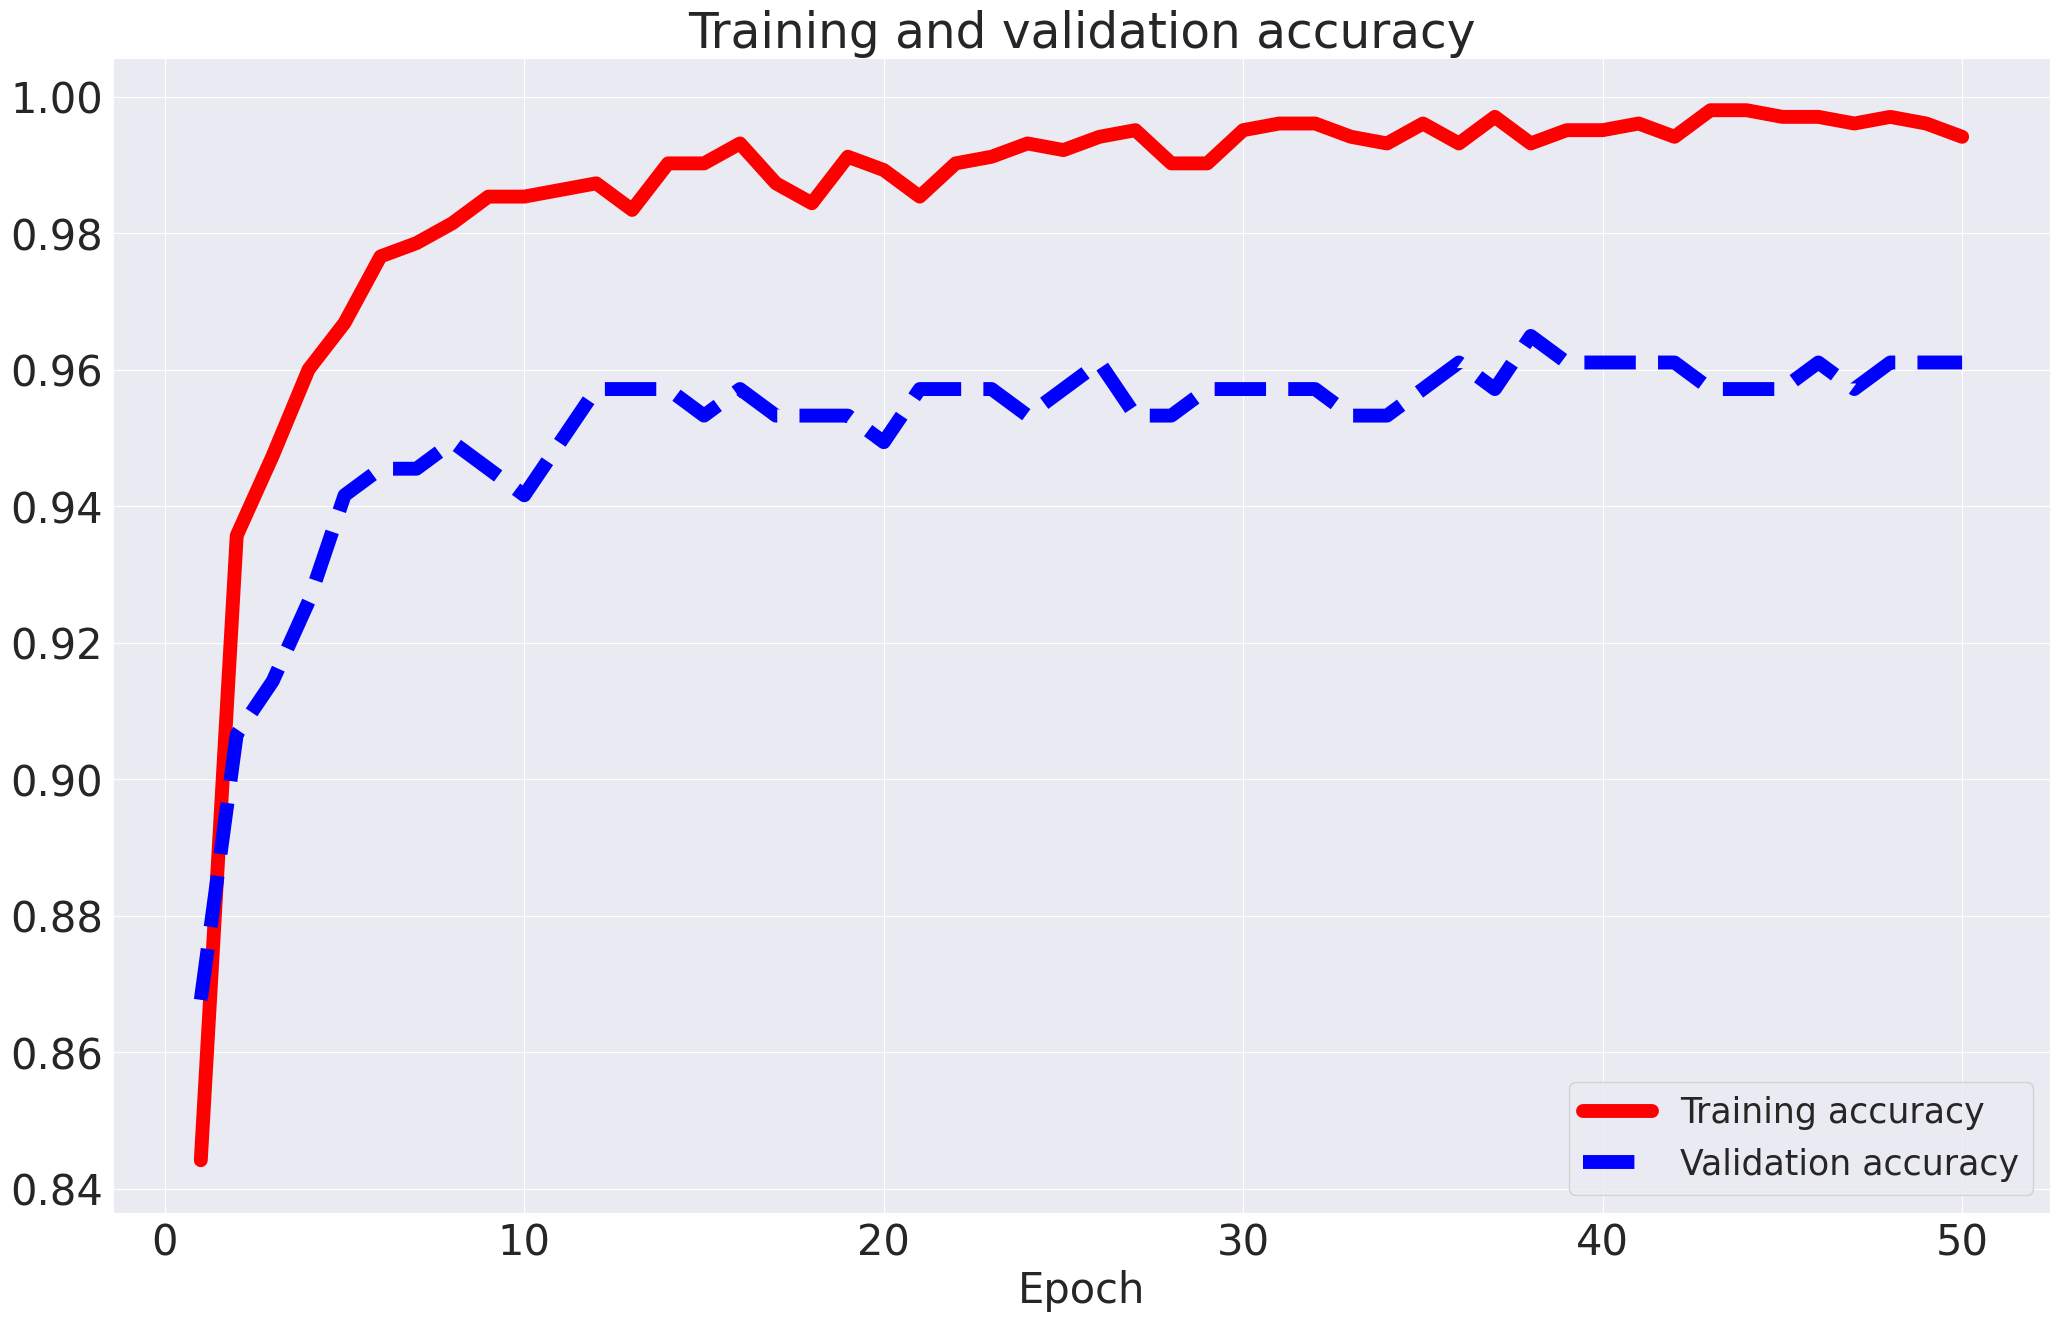

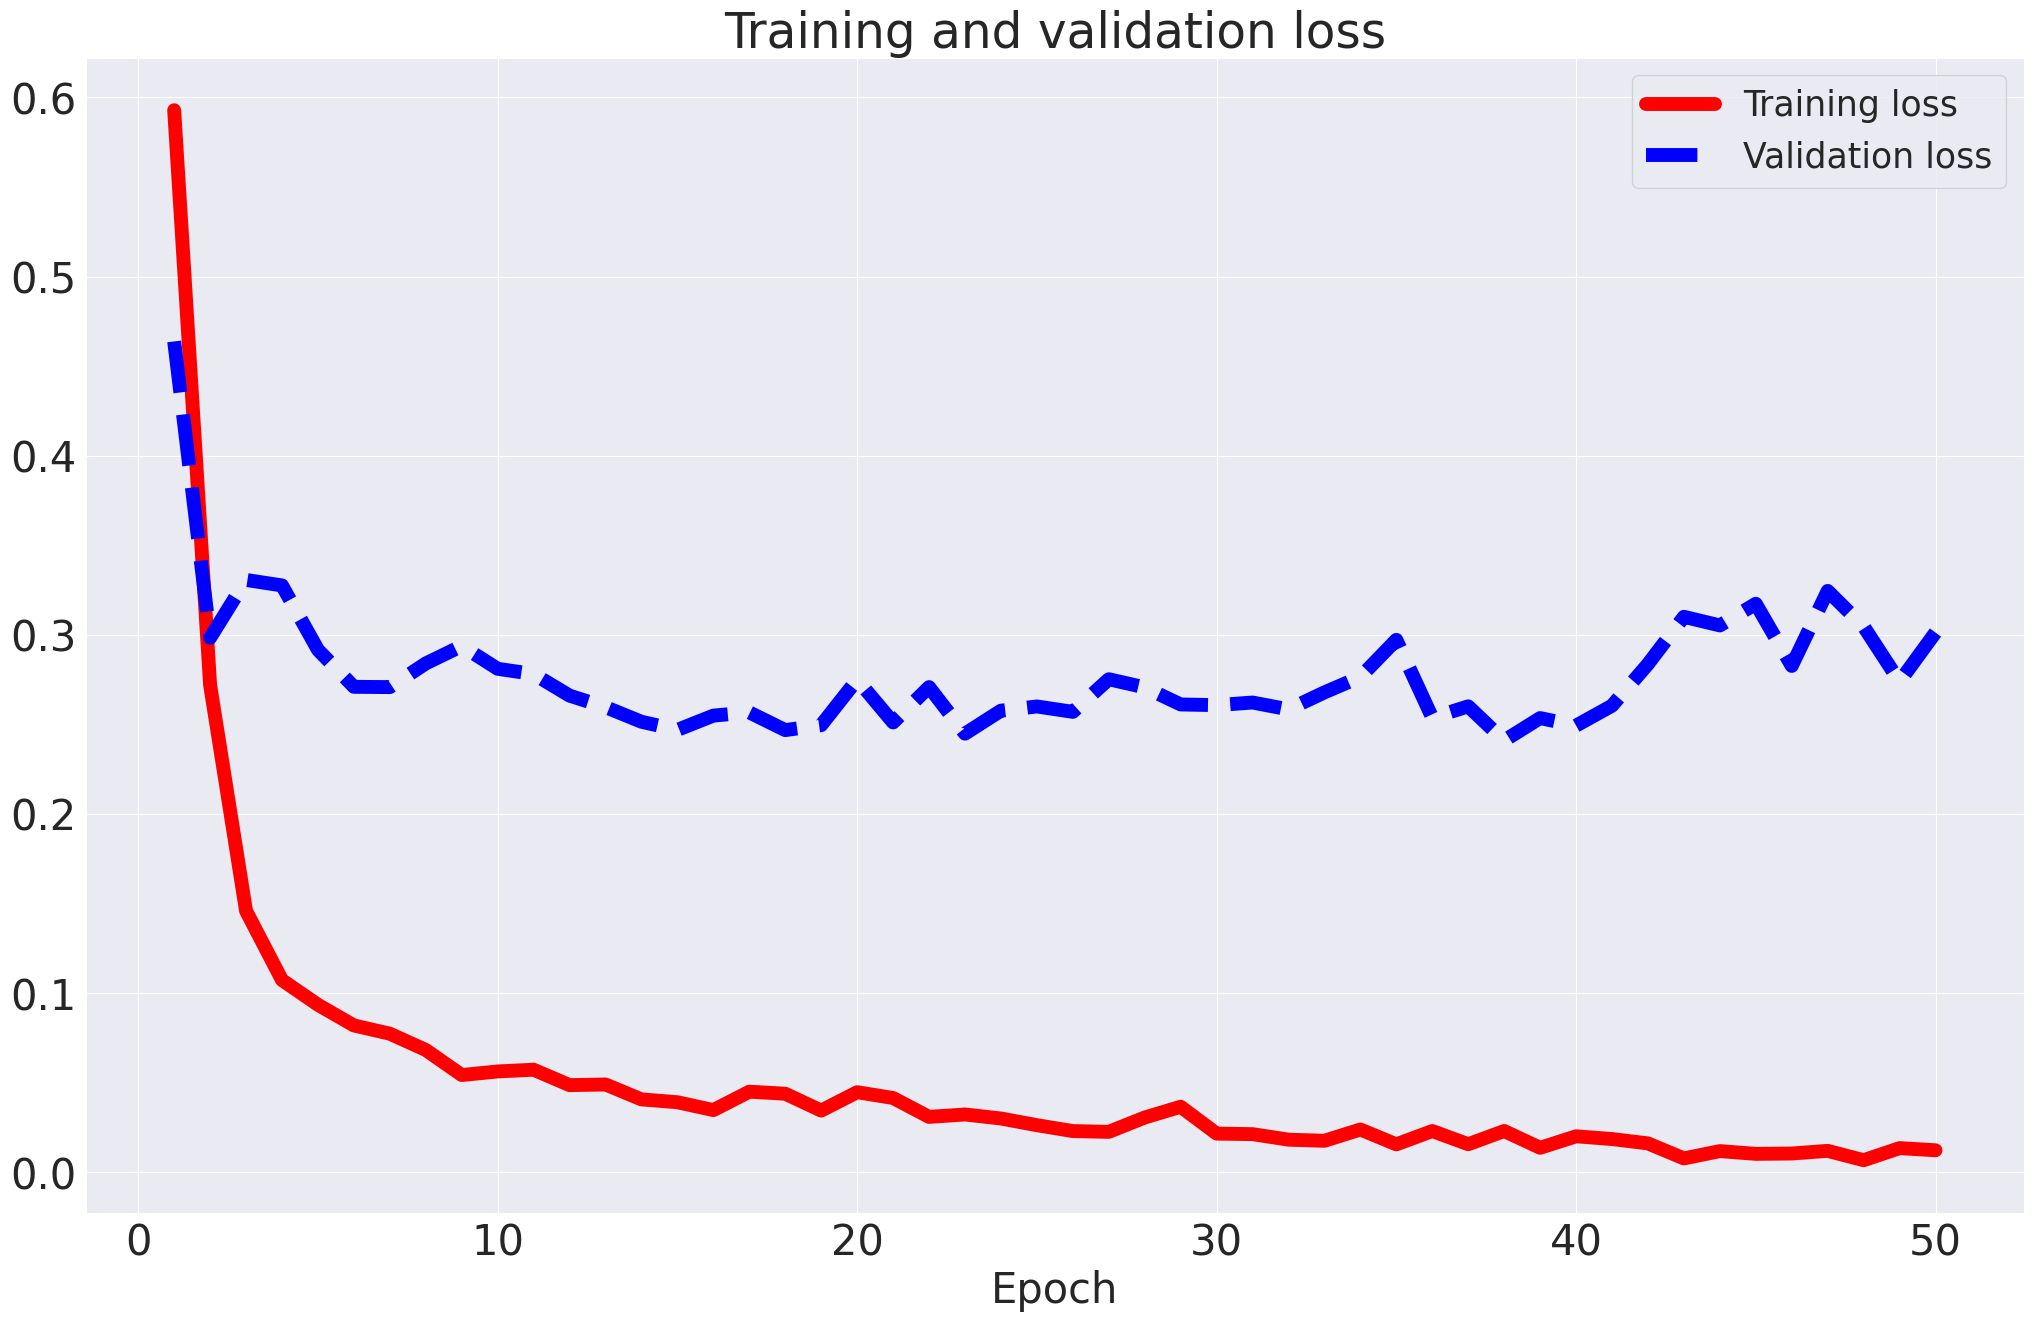

In [ ]:
#Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy',lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy',fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
#loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss',lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()

In [ ]:
#Sets the threshold for the predictions.
#In this case, the threshold is 0.5 (this value can be modified).
#prediction on test set
y_pred = ann.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test, normalize=True), '\n')
#precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test, normalize=True), '\n')
#precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))

Accuracy Score :  0.9782608695652174 

Classification Report :

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       154
           1       1.00      0.96      0.98       168

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



[Text(0, 0.5, 'Biopsy = 0'), Text(0, 1.5, 'Biopsy = 1')]

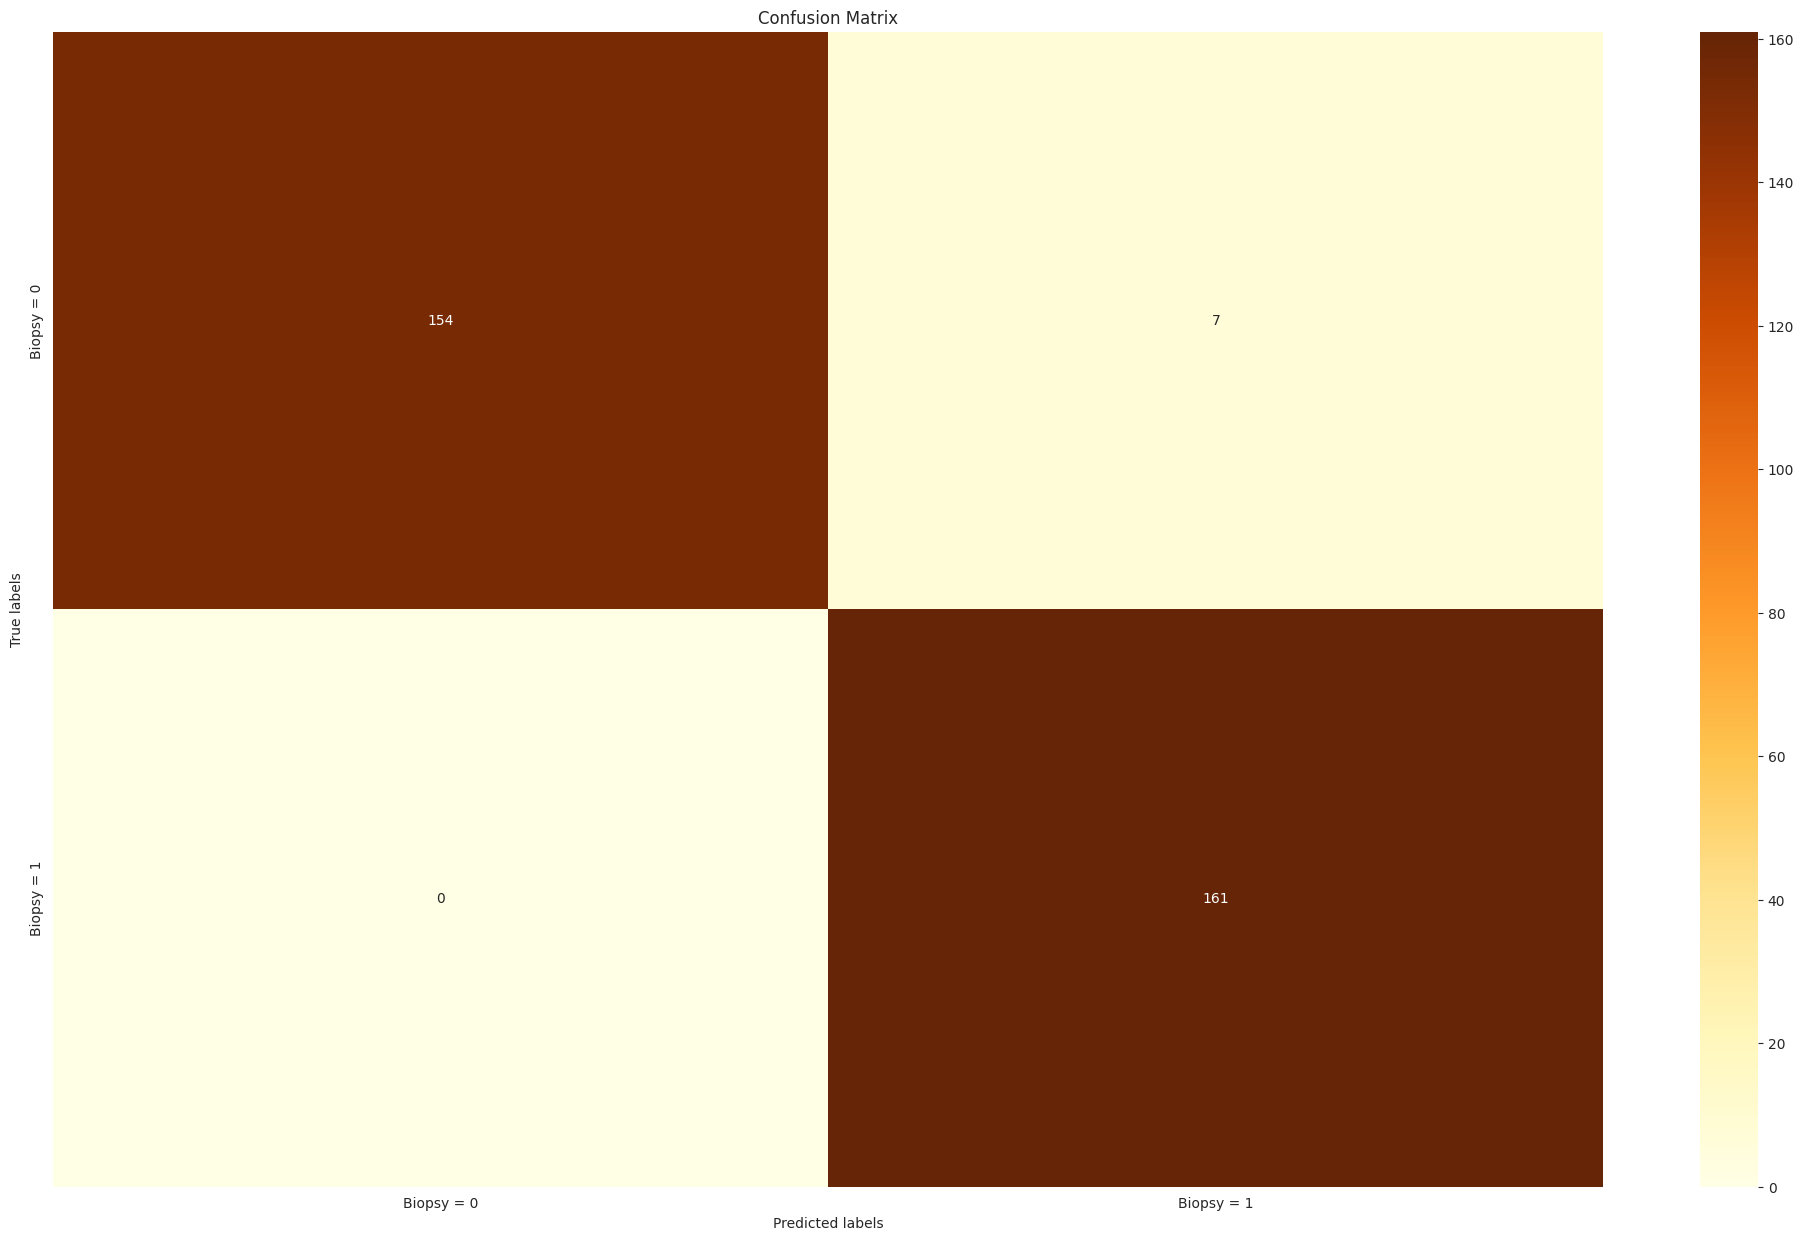

In [ ]:
#Confusion matrix:
conf_mat = confusion_matrix(y_true=y_test, y_pred = y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax,cmap='YlOrBr', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_list),
ax.yaxis.set_ticklabels(class_list)

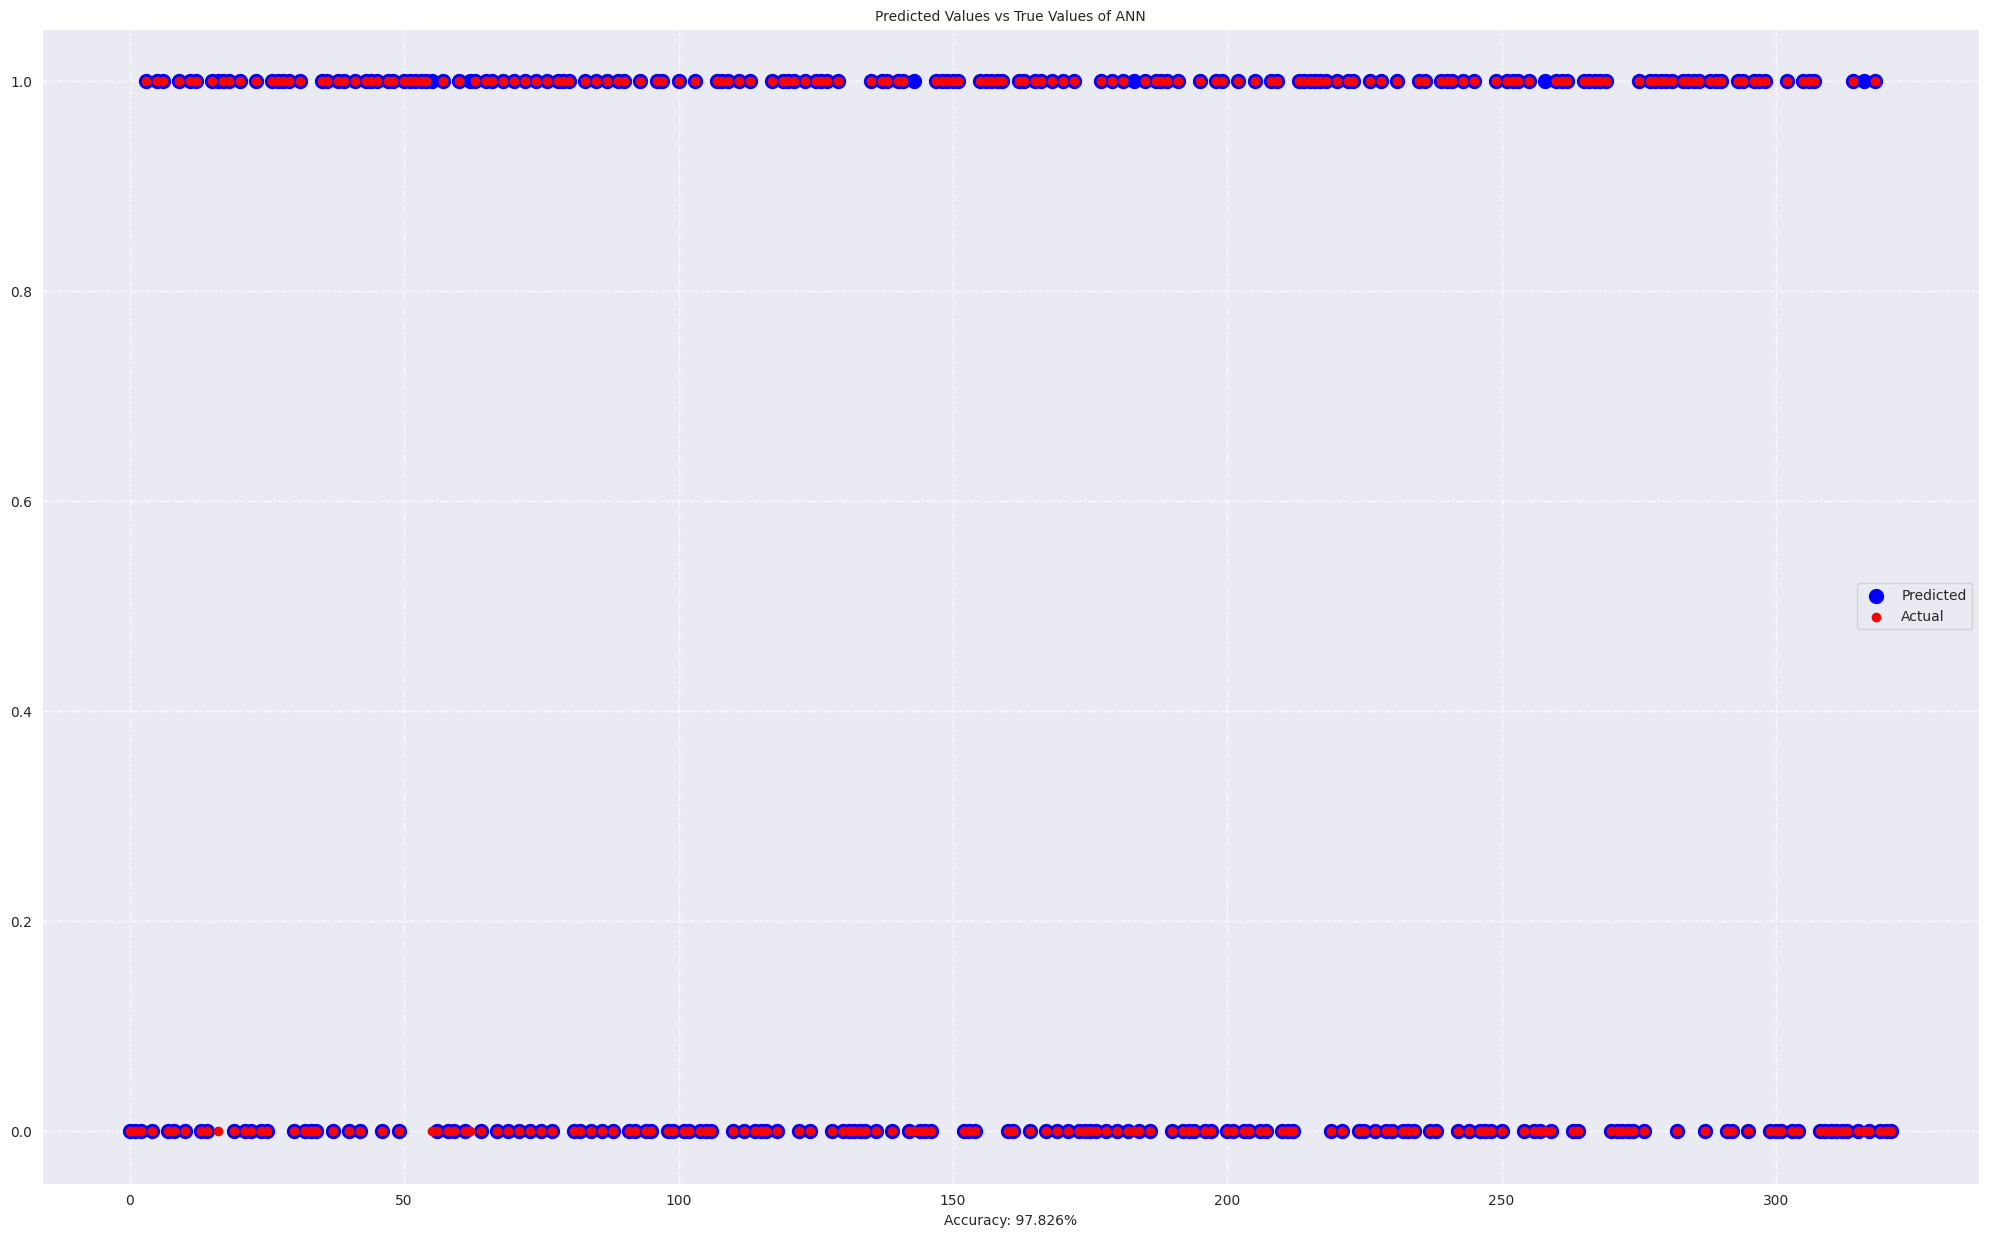

In [ ]:
 def plot_real_pred_val(Y_test, ypred, name):
    plt.figure(figsize=(25,15))
    acc=accuracy_score(Y_test,ypred)
    plt.scatter(range(len(ypred)),ypred,color="blue",lw=5,label="Predicted")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Predicted Values vs True Values of " + name, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc*100),3)) +"%")
    plt.legend()
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()
plot_real_pred_val(y_test, y_pred, 'ANN')

 **2. Cervical Cancer using RNN Model**

In [ ]:
import tensorflow as tf
import numpy as np

# Create the RNN model
rnn = tf.keras.models.Sequential()

# Input layer (LSTM layer for RNN)
rnn.add(tf.keras.layers.LSTM(units=500, input_shape=(33, 1), return_sequences=True, activation='relu'))
rnn.add(tf.keras.layers.Dropout(0.5))  # Dropout for regularization

# Hidden layer 1 (LSTM layer)
rnn.add(tf.keras.layers.LSTM(units=200, activation='relu'))
rnn.add(tf.keras.layers.Dropout(0.5))

# Output layer
rnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Summary of the model
print(rnn.summary())

# Compile the RNN using the Adam optimizer
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for the RNN (assuming X_train is 2D)
# RNNs expect 3D input: (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Train the RNN with 100 epochs
history = rnn.fit(X_train_reshaped, y_train, batch_size=64, validation_split=0.20, epochs=50, shuffle=True)

# Save the model and training history
rnn.save('cervical_rnn_model.h5')
np.save('cervical_rnn_history.npy', history.history)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 33, 500)             │       1,004,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 33, 500)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         560,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,565,001 (5.97 MB)

 Trainable params: 1,565,001 (5.97 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 880ms/step - accuracy: 0.6954 - loss: 0.6539 - val_accuracy: 0.8327 - val_loss: 0.5573
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 570ms/step - accuracy: 0.8268 - loss: 0.5448 - val_accuracy: 0.9105 - val_loss: 0.4806
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 900ms/step - accuracy: 0.9092 - loss: 0.4440 - val_accuracy: 0.8444 - val_loss: 0.4249
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 776ms/step - accuracy: 0.8748 - loss: 0.4026 - val_accuracy: 0.9027 - val_loss: 0.4389
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 818ms/step - accuracy: 0.9194 - loss: 0.4295 - val_accuracy: 0.8911 - val_loss: 0.3700
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 743ms/step - accuracy: 0.9302 - loss: 0.3359 - val_accuracy: 0.8988 - val_loss: 0.3049
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 583ms/step - accuracy: 0.9046 - loss: 1.0956 - val_accuracy: 0.8405 - val_loss: 0.8217
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 547ms/step - accuracy: 0.8159 - loss: 0.8637 - val

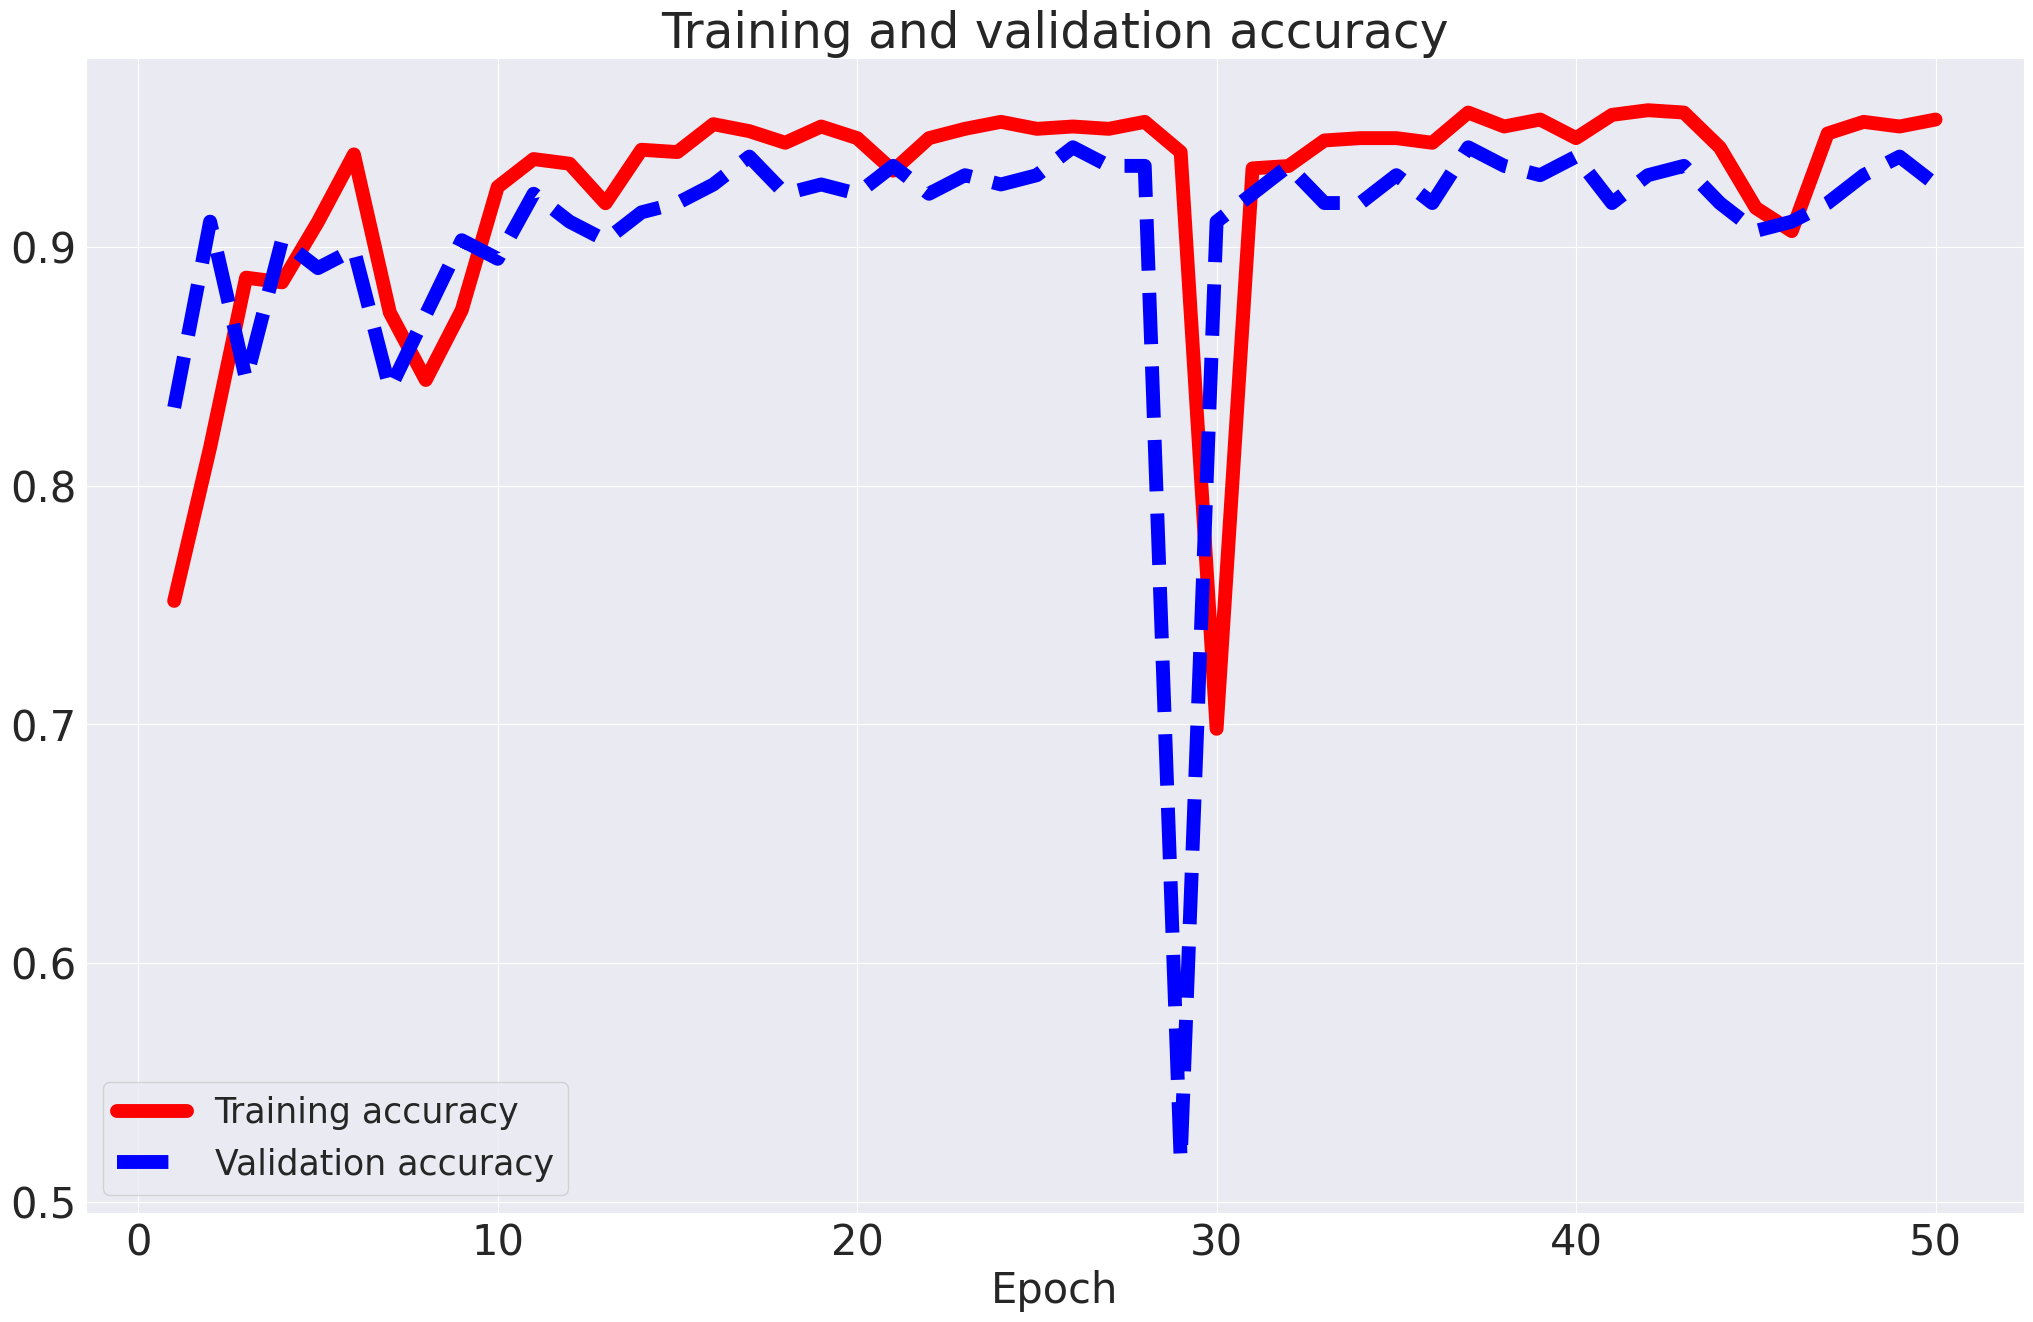

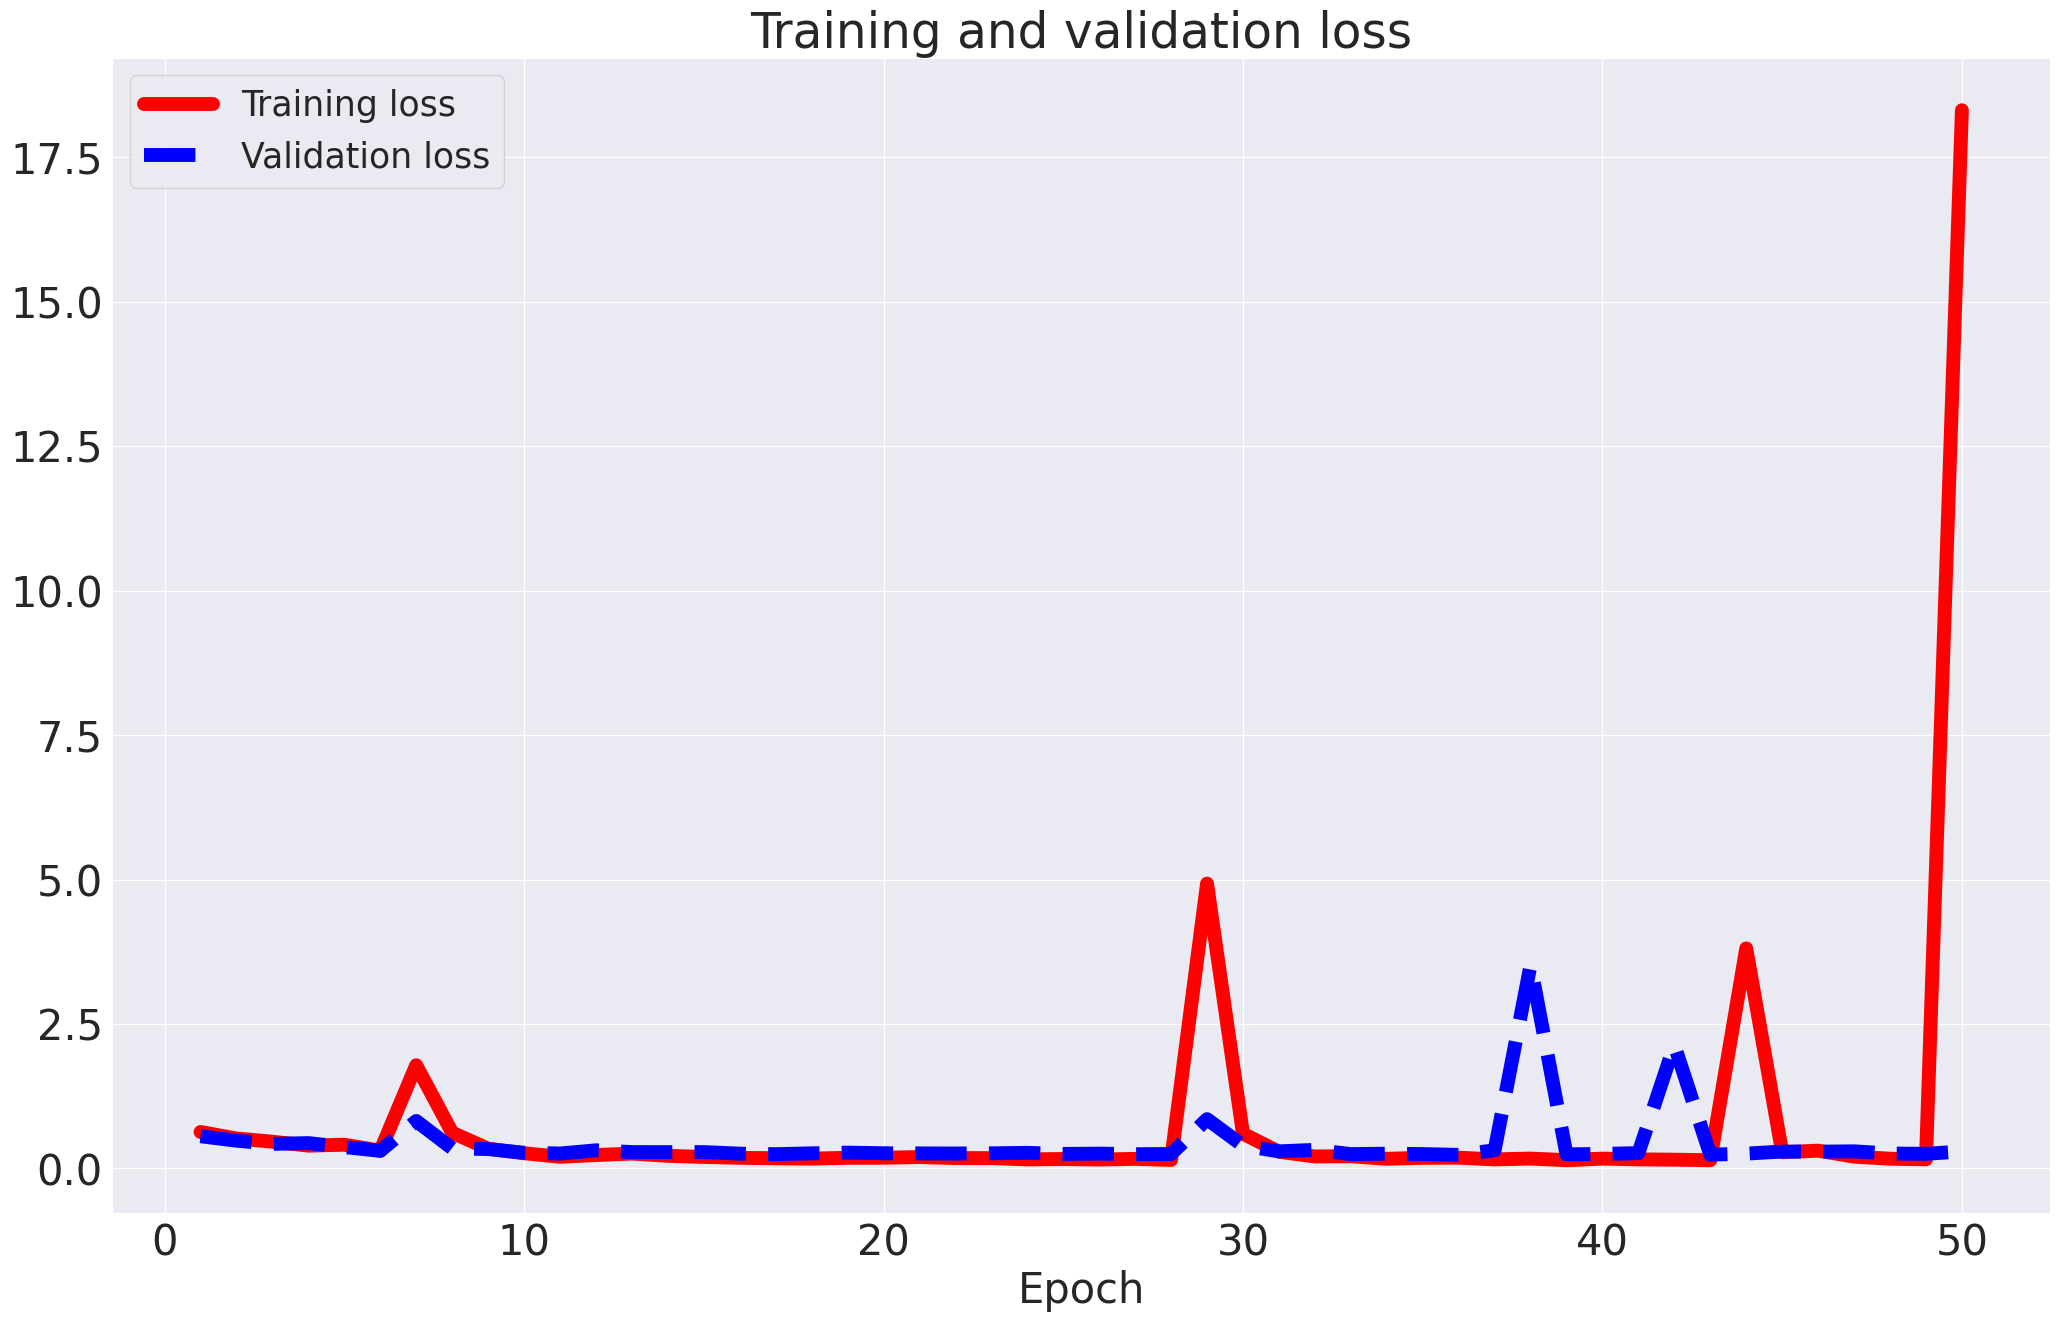

In [ ]:
#Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy',lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy',fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
#loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss',lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()

In [ ]:
#Sets the threshold for the predictions.
#In this case, the threshold is 0.5 (this value can be modified).
#prediction on test set
y_pred = rnn.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0

In [ ]:
#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test, normalize=True), '\n')
#precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))

Accuracy Score :  0.9099378881987578 

Classification Report :

               precision    recall  f1-score   support

           0       0.89      0.92      0.91       156
           1       0.93      0.90      0.91       166

    accuracy                           0.91       322
   macro avg       0.91      0.91      0.91       322
weighted avg       0.91      0.91      0.91       322



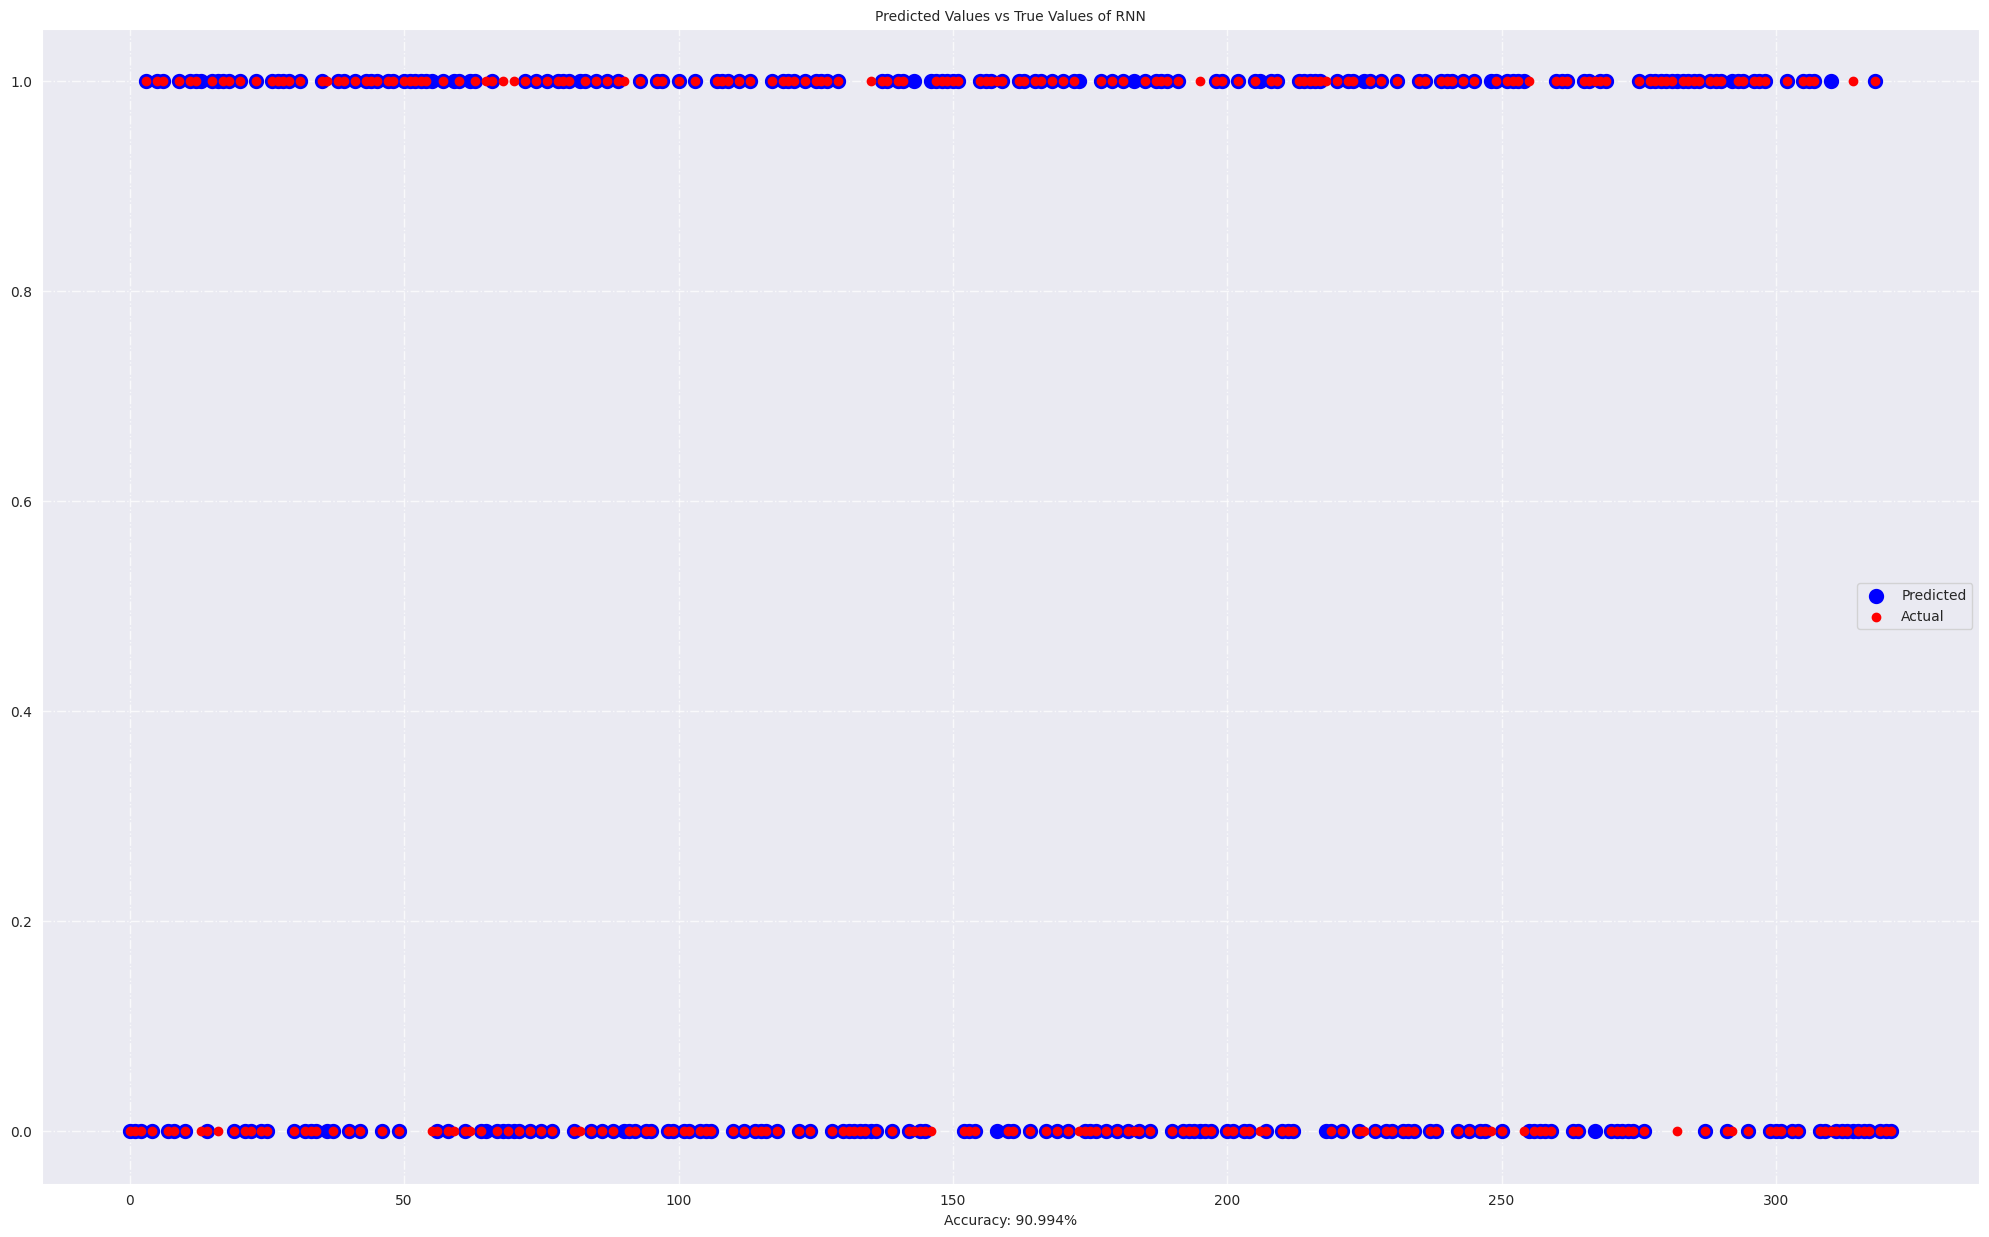

In [ ]:
def plot_real_pred_val(Y_test, ypred, name):
    plt.figure(figsize=(25,15))
    acc=accuracy_score(Y_test,ypred)
    plt.scatter(range(len(ypred)),ypred,color="blue",lw=5,label="Predicted")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Predicted Values vs True Values of " + name, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc*100),3)) +"%")
    plt.legend()
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()
plot_real_pred_val(y_test, y_pred, 'RNN')

**3. Cervical Cancer using CNN Model**

In [ ]:
# Importing Keras for Image Classification
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
# CNN Model

model = Sequential()
# Convolutional Layer with input shape (64,64,3)
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(64,64,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=5, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 392,741 (1.50 MB)

 Trainable params: 392,741 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

**4. Cervical Cancer Using LSTM Model**

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE # Import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/drive/MyDrive/SEM-4/kag_risk_factors_cervical_cancer.csv")



In [ ]:
df.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [ ]:
X = df.drop('Biopsy', axis=1).apply(pd.to_numeric, errors='coerce').astype('float64')
y = df["Biopsy"]

# Impute missing values using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
X = imputer.fit_transform(X)

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y.ravel())

<ipython-input-10-acbb9612e359>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X, y = sm.fit_resample(X, y.ravel())


In [ ]:
#Splits the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 2021, stratify=y)
#Standar scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1,X_test.shape[1])
# Create an LSTM model
lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(units=1,activation='sigmoid')
])
print(lstm_model.summary()) # Display the model summary
# Compile the LSTM model
lstm_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# Train the LSTM model
history = lstm_model.fit(X_train, y_train,
batch_size=64, validation_split=0.20, epochs=50,
shuffle=True)
# Save the LSTM model
lstm_model.save('cervical_lstm_model.h5')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 64)                  │          25,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5835 - loss: 0.6806 - val_accuracy: 0.7977 - val_loss: 0.6161
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8554 - loss: 0.5790 - val_accuracy: 0.8132 - val_loss: 0.5642
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8595 - loss: 0.5228 - val_accuracy: 0.8288 - val_loss: 0.5182
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8888 - loss: 0.4655 - val_accuracy: 0.8521 - val_loss: 0.4756
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8952 - loss: 0.4184 - val_accuracy: 0.8560 - val_loss: 0.4288
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9112 - loss: 0.3802 - val_accuracy: 0.8716 - val_loss: 0.3886
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9266 - loss: 0.3260 - val_accuracy: 0.8833 - val_loss: 0.3580
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9222 - loss: 0.2911 - val_accuracy: 0.8833 - val

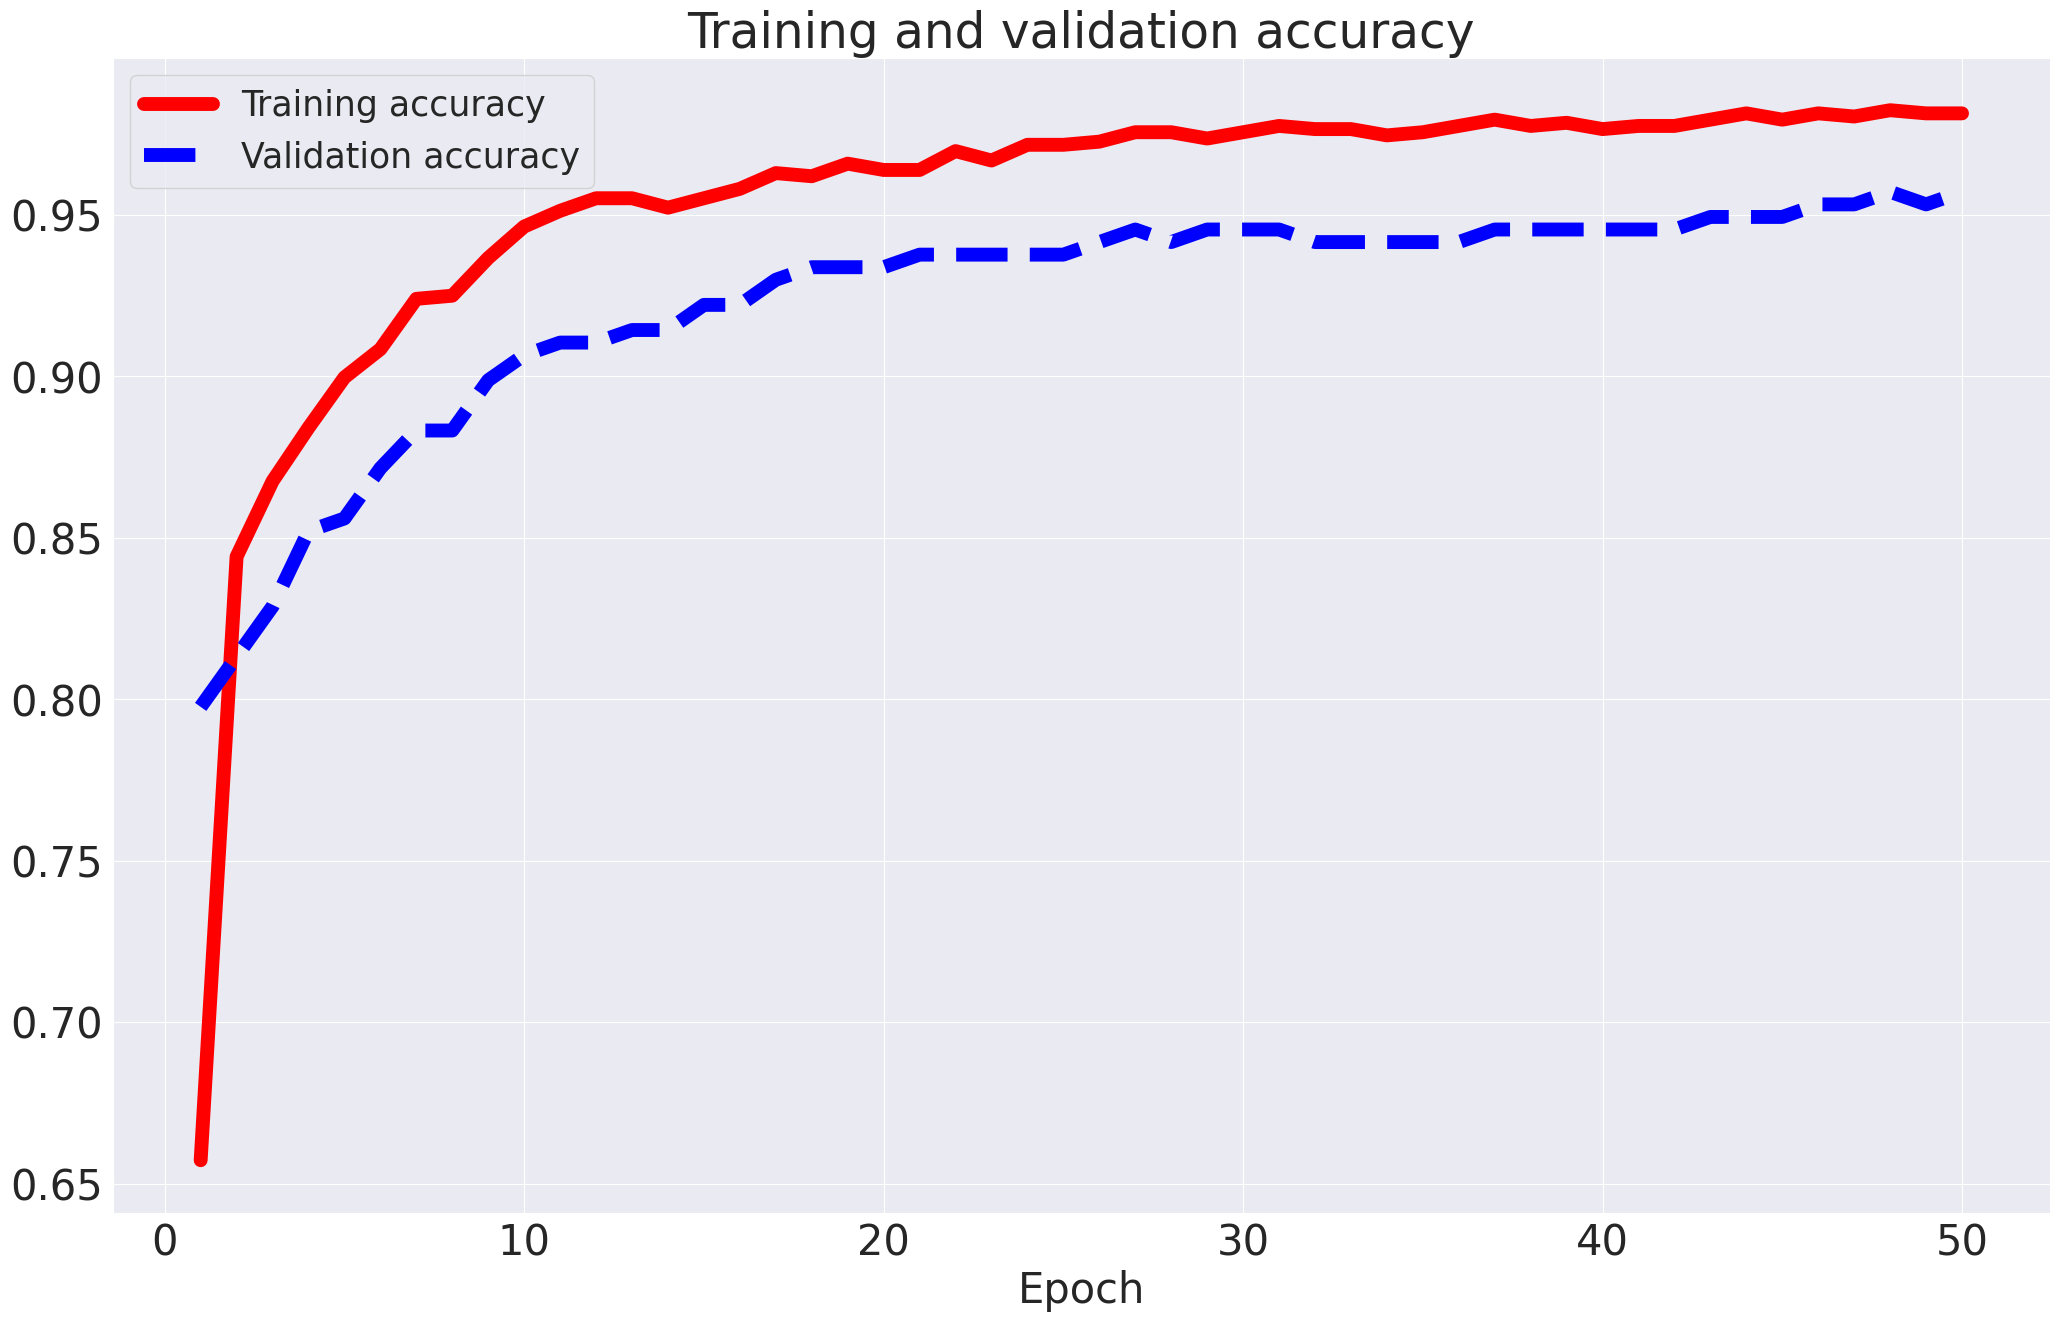

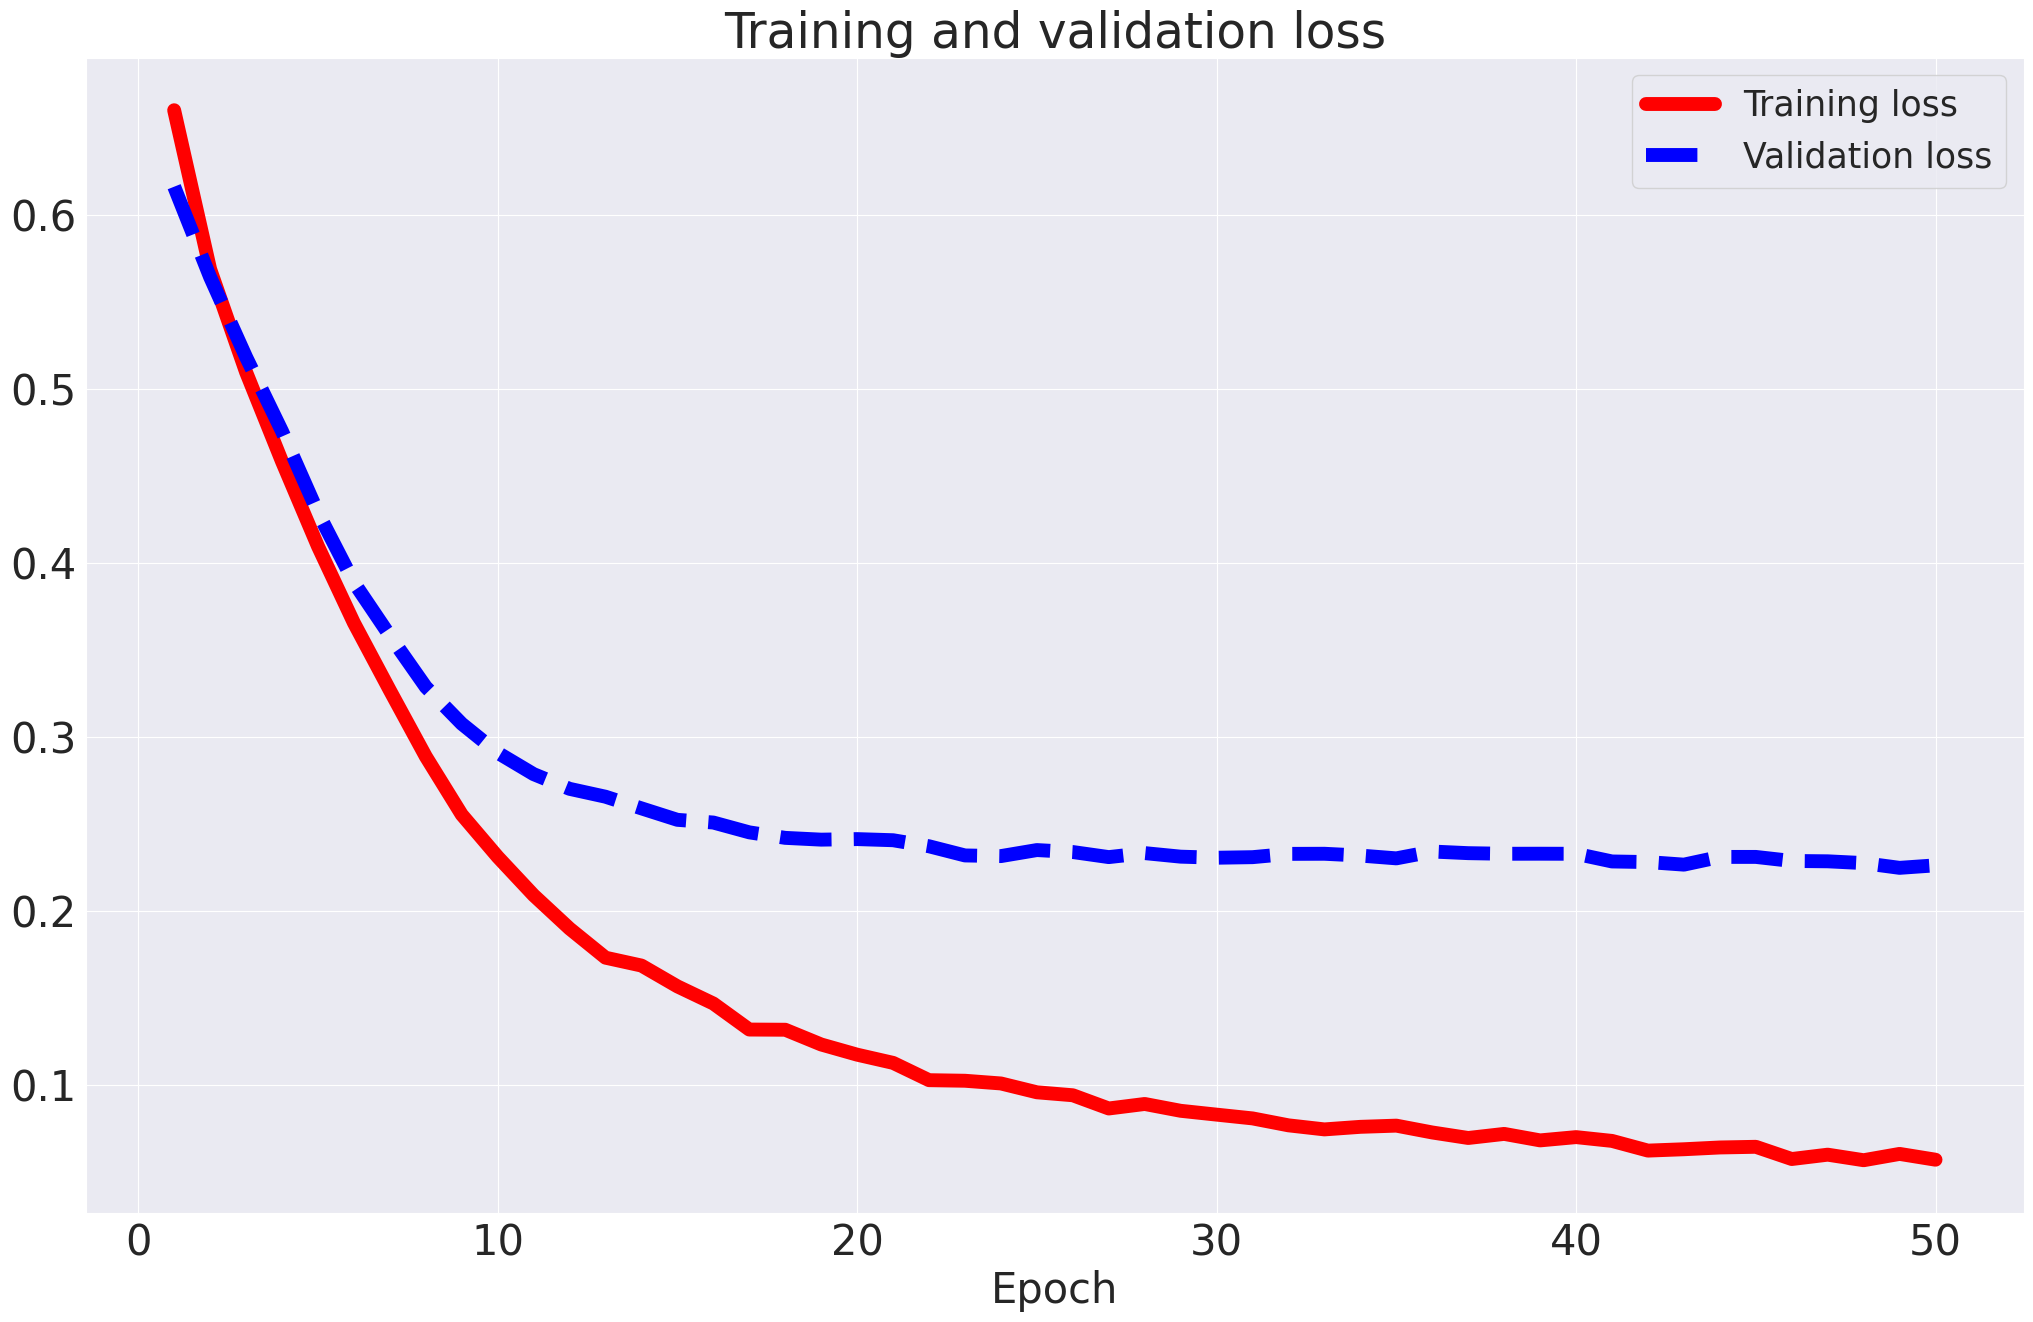

In [ ]:
#Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy', lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
#loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss', lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()

In [ ]:
#Sets the threshold for the predictions. In this case, the threshold is 0.5(this value can be modified).
#prediction on test set
y_pred = lstm_model.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test,normalize=True), '\n')
#precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))

Accuracy Score :  0.9565217391304348 

Classification Report :

               precision    recall  f1-score   support

           0       0.93      0.98      0.96       153
           1       0.98      0.93      0.96       169

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



([Text(0.5, 0, 'Biopsy = 0'), Text(1.5, 0, 'Biopsy = 1')],
 [Text(0, 0.5, 'Biopsy = 0'), Text(0, 1.5, 'Biopsy = 1')])

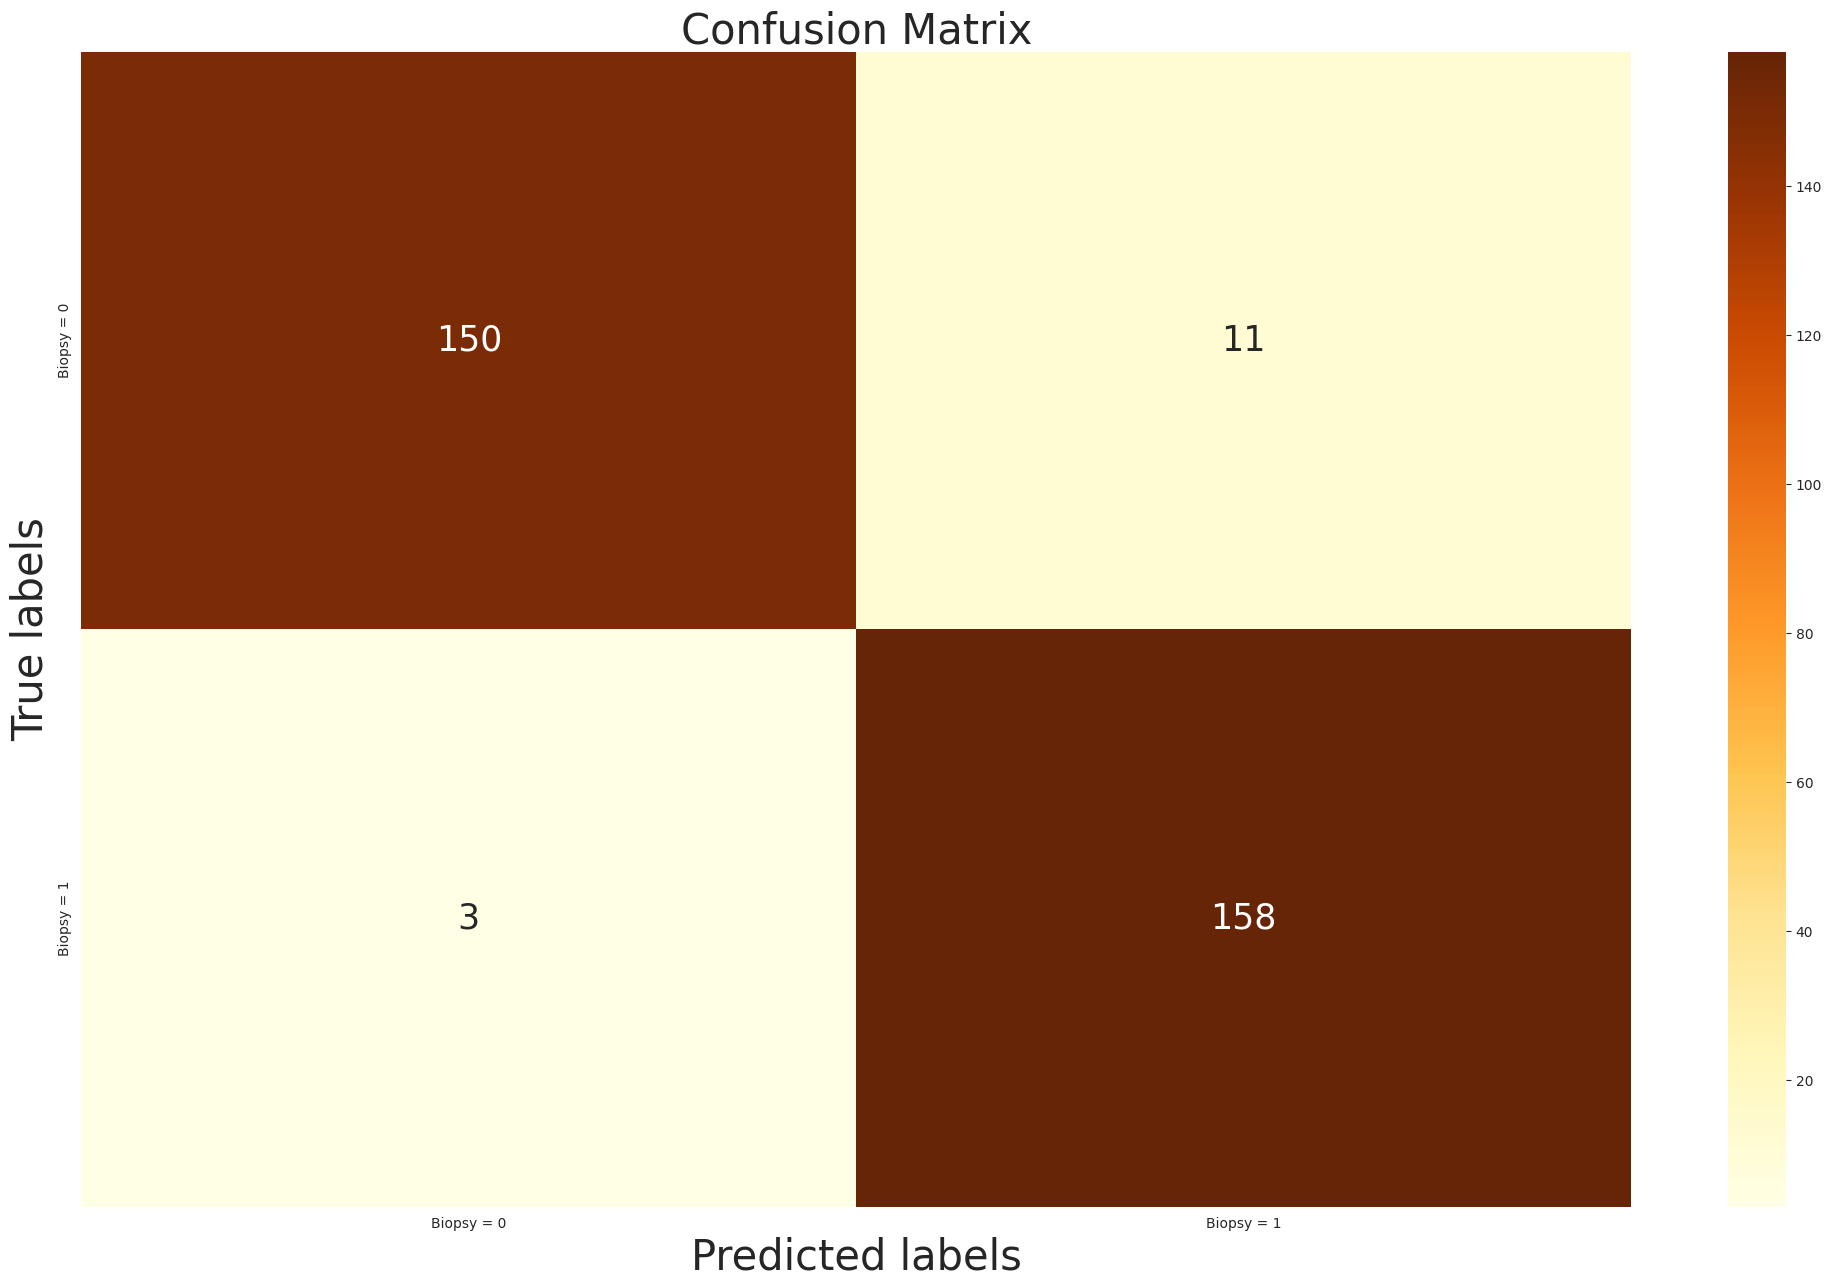

In [ ]:
#Confusion matrix:
conf_mat = confusion_matrix(y_true=y_test, y_pred = y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(conf_mat, annot=True, ax = ax, cmap='YlOrBr', fmt='g',annot_kws={"size": 25})
ax.set_xlabel('Predicted labels', fontsize=30)
ax.set_ylabel('True labels', fontsize=30)
ax.set_title('Confusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(class_list), ax.yaxis.set_ticklabels(class_list)


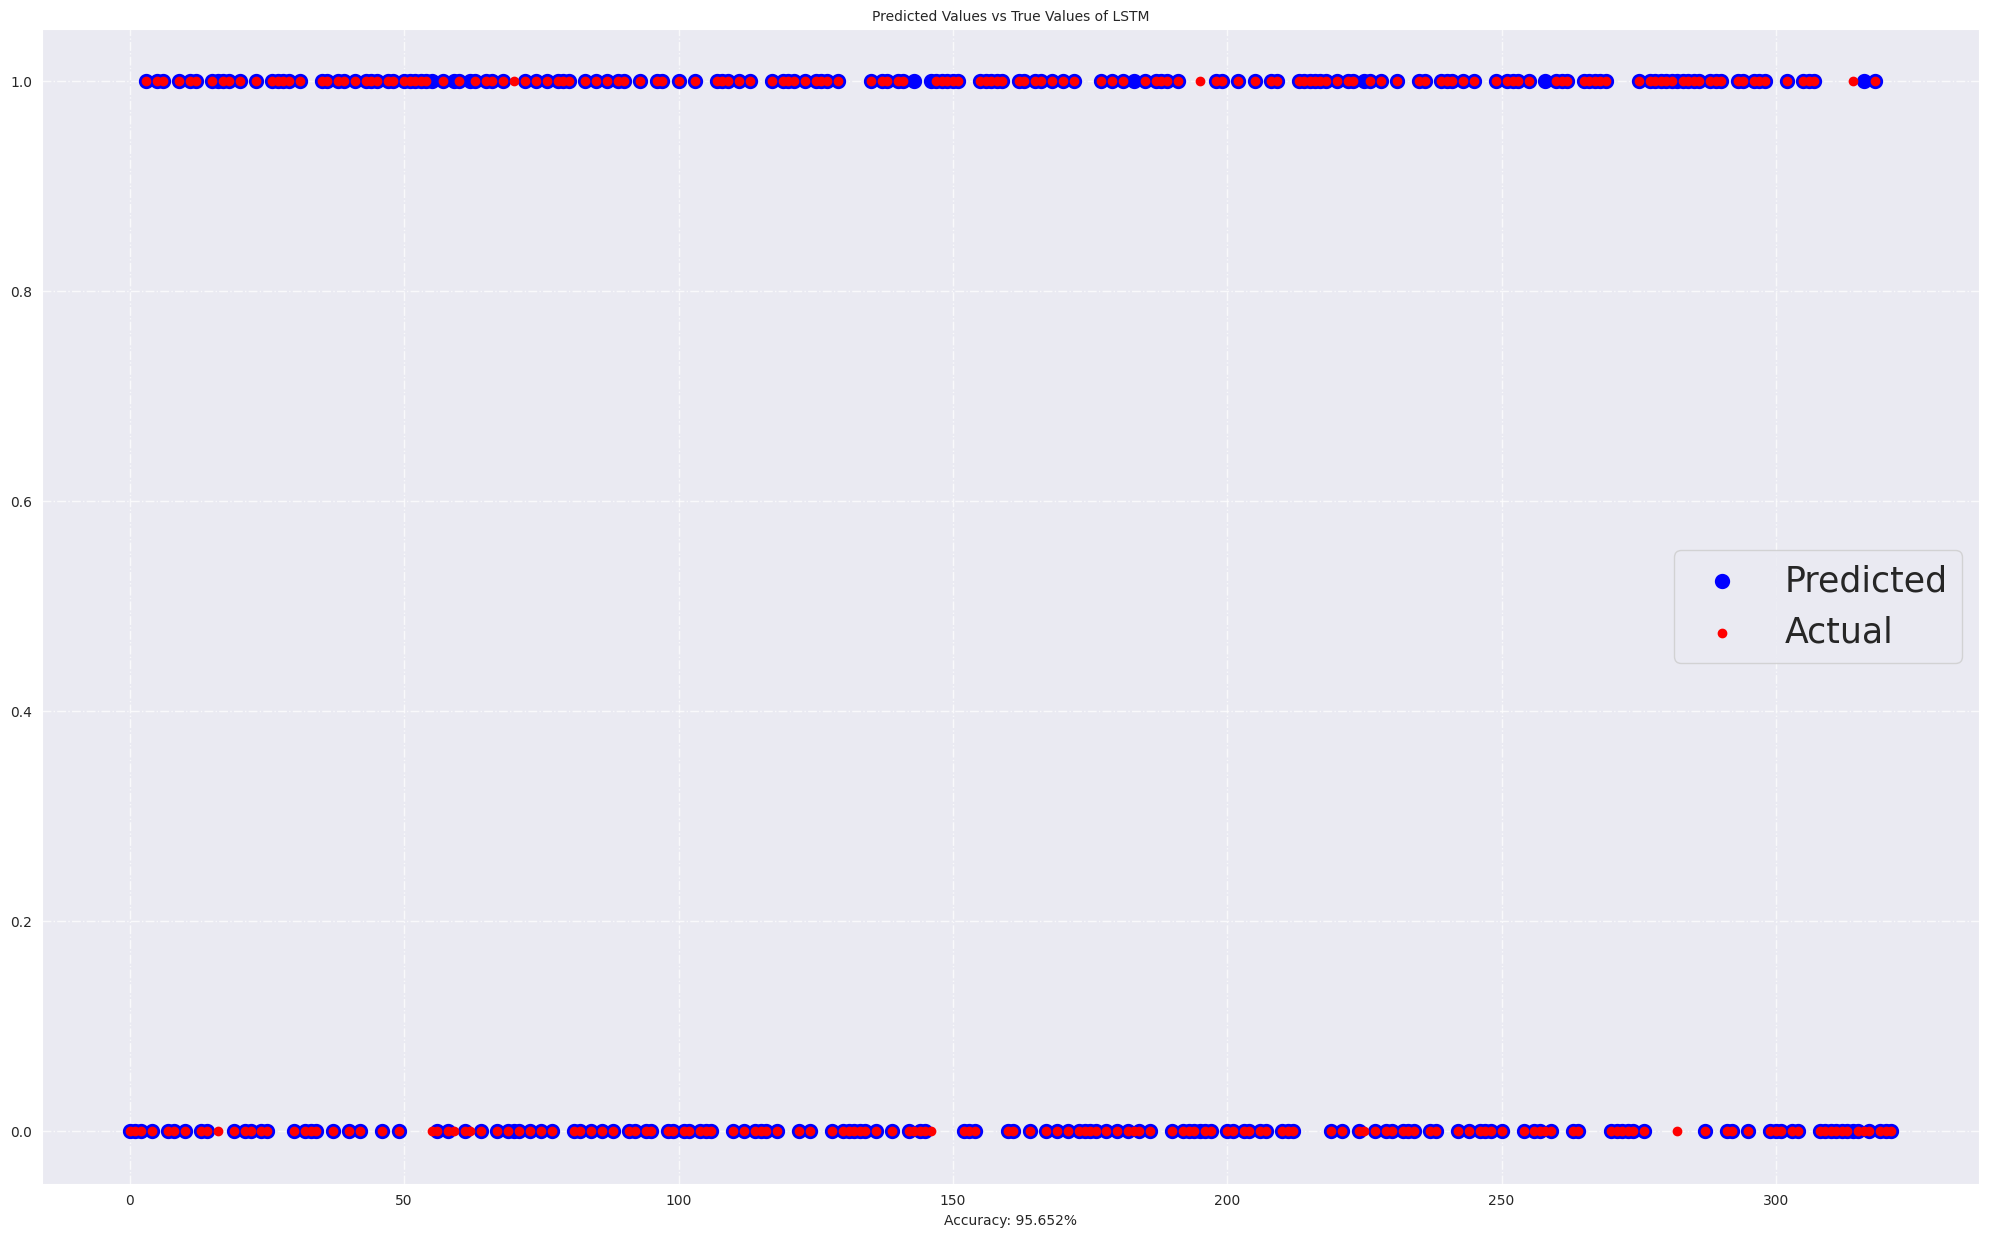

In [ ]:
def plot_real_pred_val(Y_test, ypred, name):
    plt.figure(figsize=(25,15))
    acc=accuracy_score(Y_test,ypred)
    plt.scatter(range(len(ypred)),ypred,color="blue",lw=5,label="Predicted")
    plt.scatter(range(len(Y_test)), Y_test,color="red",label="Actual")
    plt.title("Predicted Values vs True Values of " + name, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc*100),3)) + "%")
    plt.legend(fontsize=25)
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()
plot_real_pred_val(y_test, y_pred, 'LSTM')

**5. Cervical Cancer Using Self Organizing Maps (SOMs) Model**

In [ ]:
!pip install MiniSom

In [ ]:
import tensorflow as tf
from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn.metrics.pairwise import euclidean_distances
X = df.drop('Biopsy', axis=1).apply(pd.to_numeric, errors='coerce').astype('float64')
y = df["Biopsy"]
sc = StandardScaler()
X = sc.fit_transform(X)
# Apply KMeans for SOM initialization
n_centers = 100
kmeans = KMeans(n_clusters=n_centers)
kmeans.fit(X)
centers = kmeans.cluster_centers_
# Train a Self Organizing Map (SOM)
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)
# Transform input data into the SOM feature space
X_som = np.array([som.winner(x) for x in X])
X_som = X_som.reshape(X_som.shape[0], -1)
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_som, y,test_size=0.2, random_state=2021, stratify=y)
# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# Create an LSTM model
lstm_model = tf.keras.models.Sequential([
 tf.keras.layers.LSTM(units=64, input_shape=(X_train.shape[1],X_train.shape[2])),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(units=1, activation='sigmoid')
])
print(lstm_model.summary()) # Display the model summary
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# Train the LSTM model
history = lstm_model.fit(X_train, y_train, batch_size=64,validation_split=0.20, epochs=50, shuffle=True)
# Save the LSTM model
lstm_model.save('cervical_lstm_model_with_som.h5')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 332ms/step - accuracy: 0.6879 - loss: 0.6465 - val_accuracy: 0.9275 - val_loss: 0.5560
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9362 - loss: 0.5366 - val_accuracy: 0.9275 - val_loss: 0.4741
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9514 - loss: 0.4589 - val_accuracy: 0.9275 - val_loss: 0.4109
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9348 - loss: 0.4055 - val_accuracy: 0.9275 - val_loss: 0.3629
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9424 - loss: 0.3442 - val_accuracy: 0.9275 - val_loss: 0.3266
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9426 - loss: 0.3162 - val_accuracy: 0.9275 - val_loss: 0.3014
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9429 - loss: 0.2939 - val_accuracy: 0.9275 - val_loss: 0.2842
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9313 - loss: 0.2955 - val_accuracy: 0.9275 - val_loss:

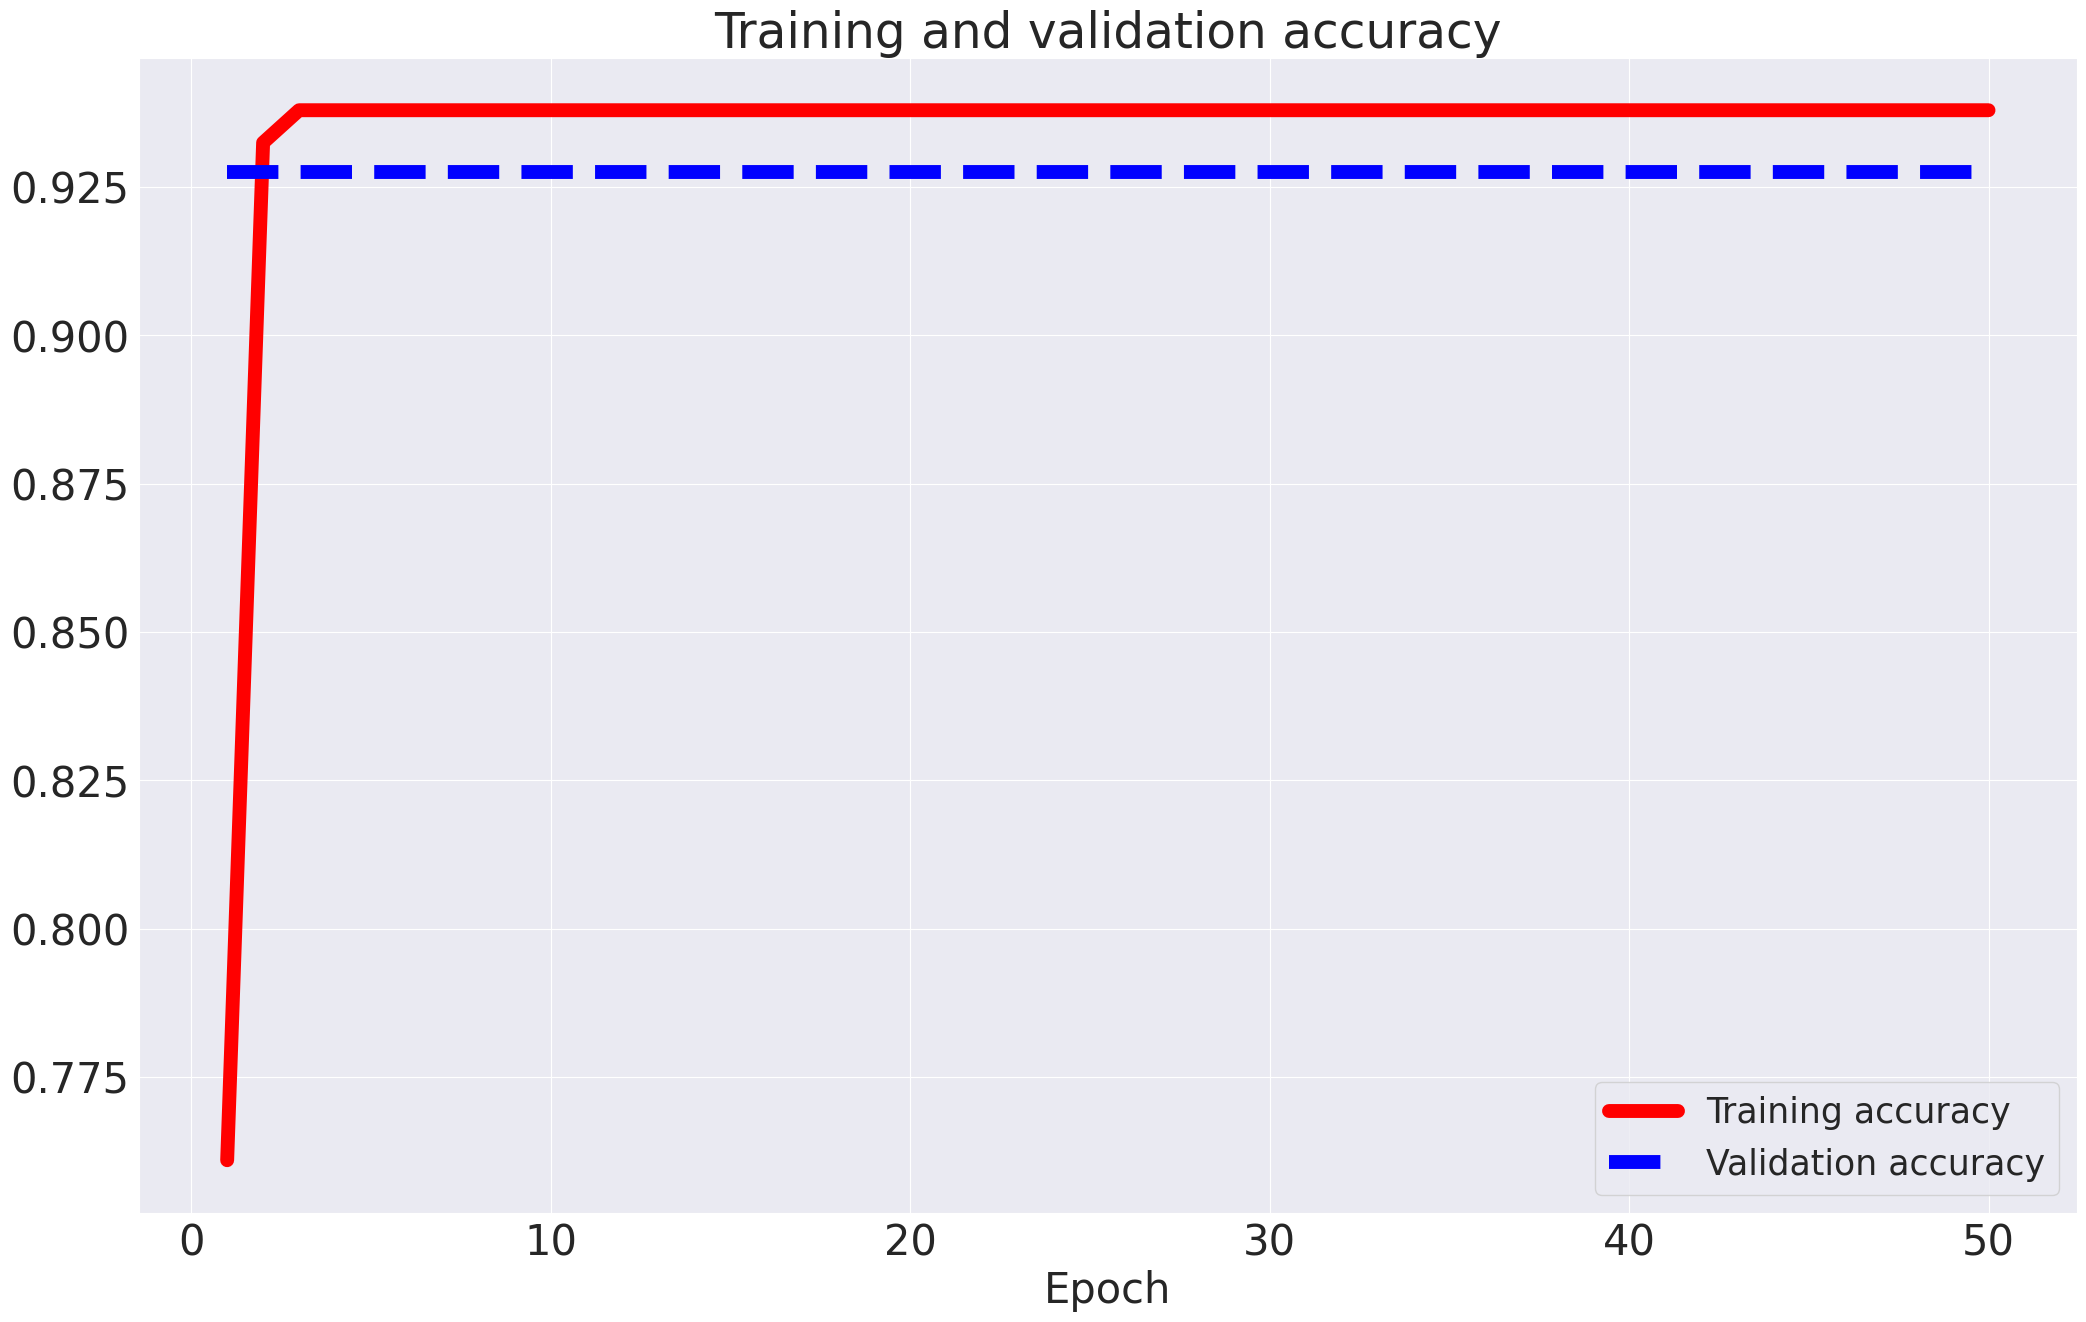

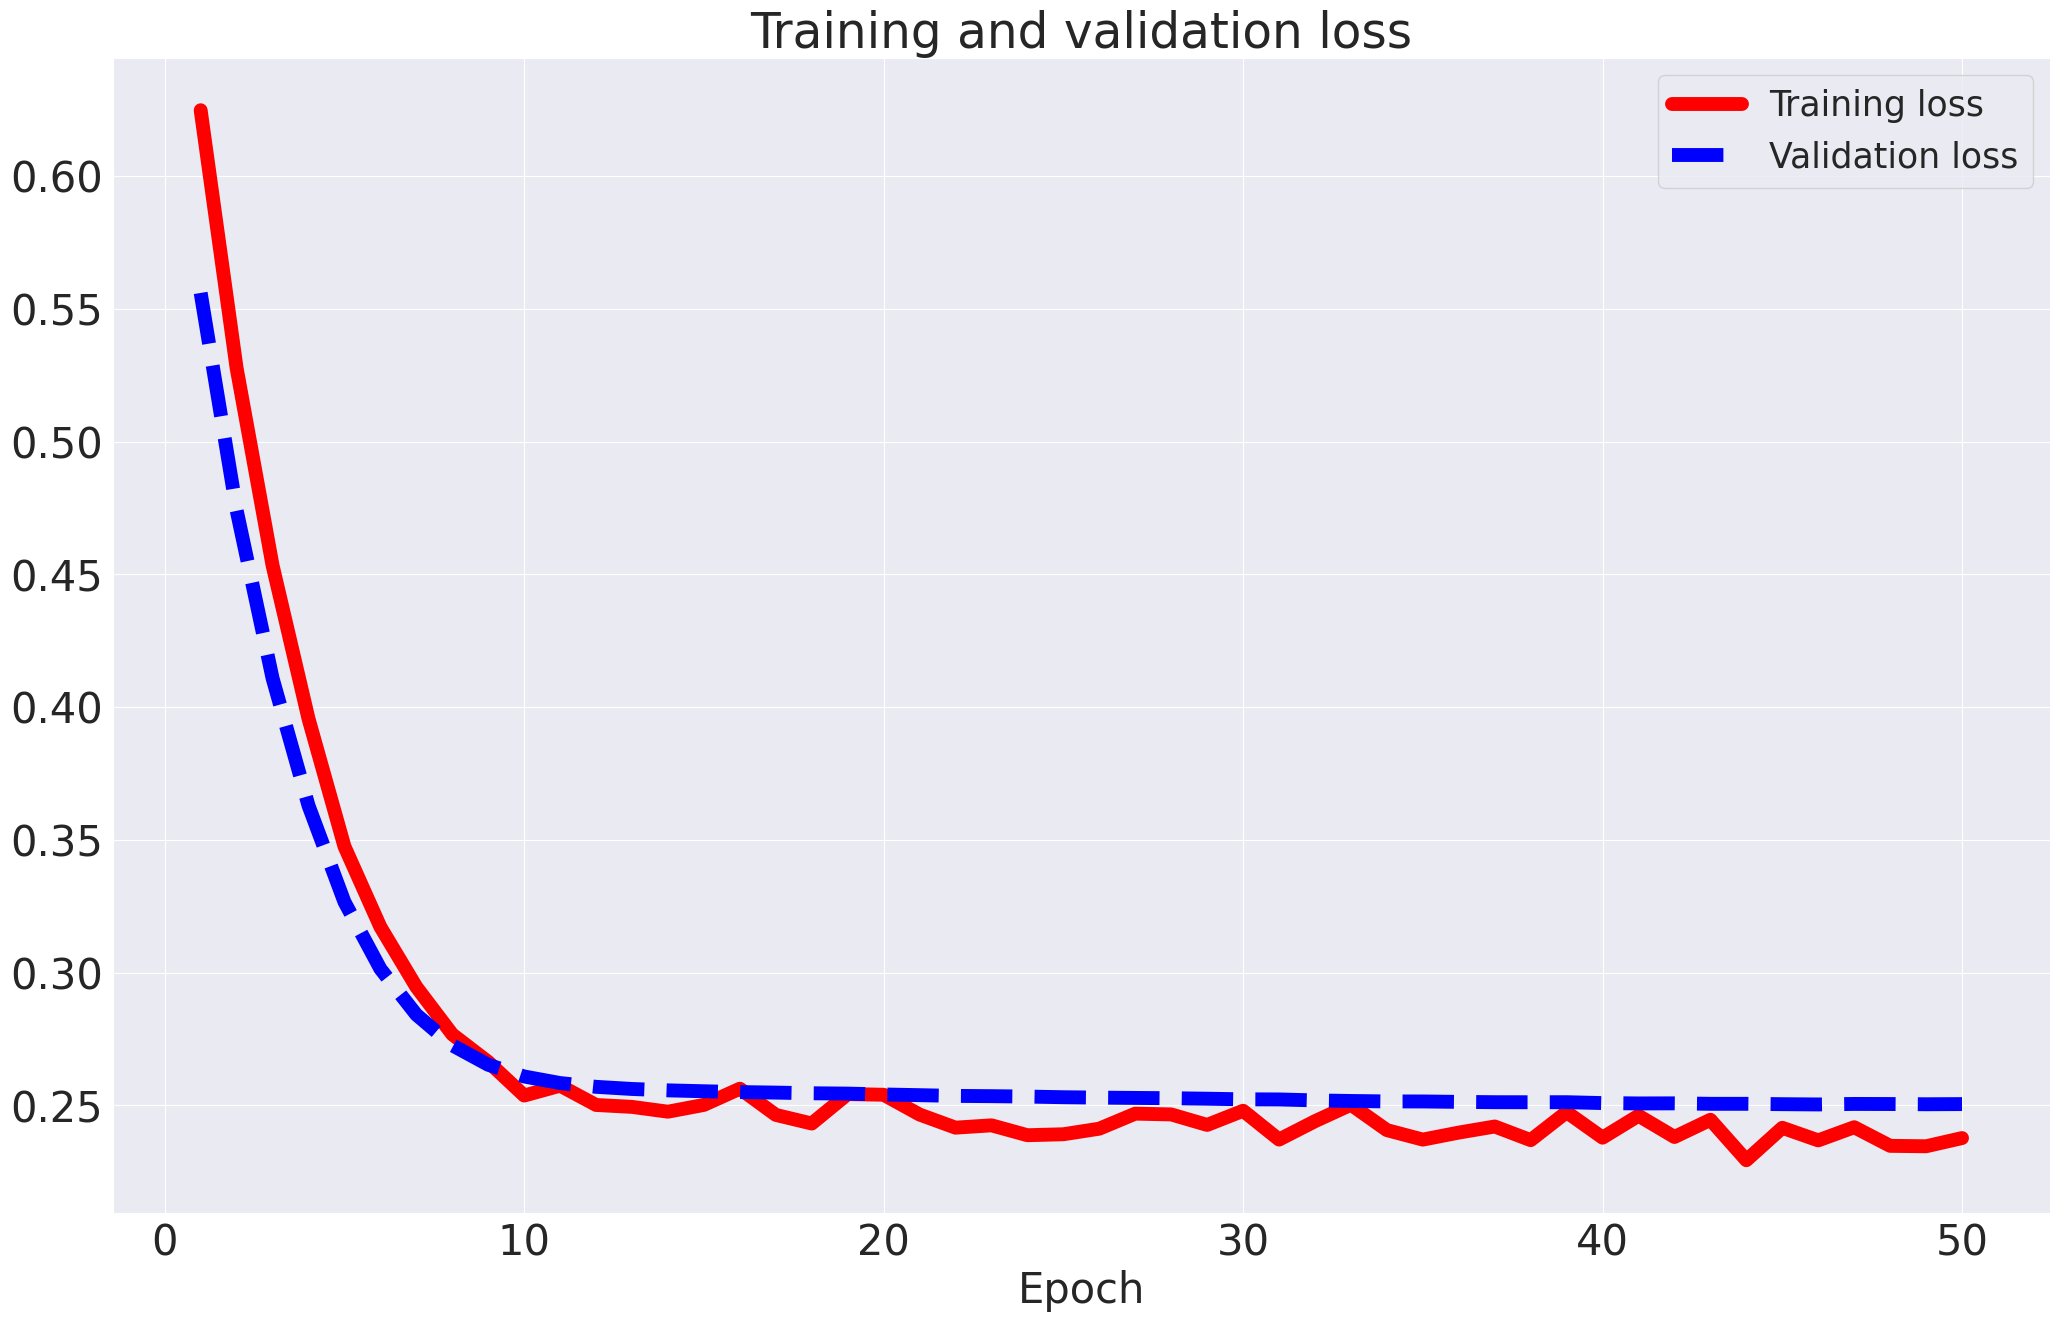

In [ ]:
#Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy', lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
#loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss', lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()

In [ ]:
#Sets the threshold for the predictions. In this case, the threshold is 0.5(this value can be modified).
#prediction on test set
y_pred = lstm_model.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test,normalize=True), '\n')
#precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))

Accuracy Score :  0.936046511627907 

Classification Report :

               precision    recall  f1-score   support

           0       1.00      0.94      0.97       172
           1       0.00      0.00      0.00         0

    accuracy                           0.94       172
   macro avg       0.50      0.47      0.48       172
weighted avg       1.00      0.94      0.97       172



([Text(0.5, 0, 'Biopsy = 0'), Text(1.5, 0, 'Biopsy = 1')],
 [Text(0, 0.5, 'Biopsy = 0'), Text(0, 1.5, 'Biopsy = 1')])

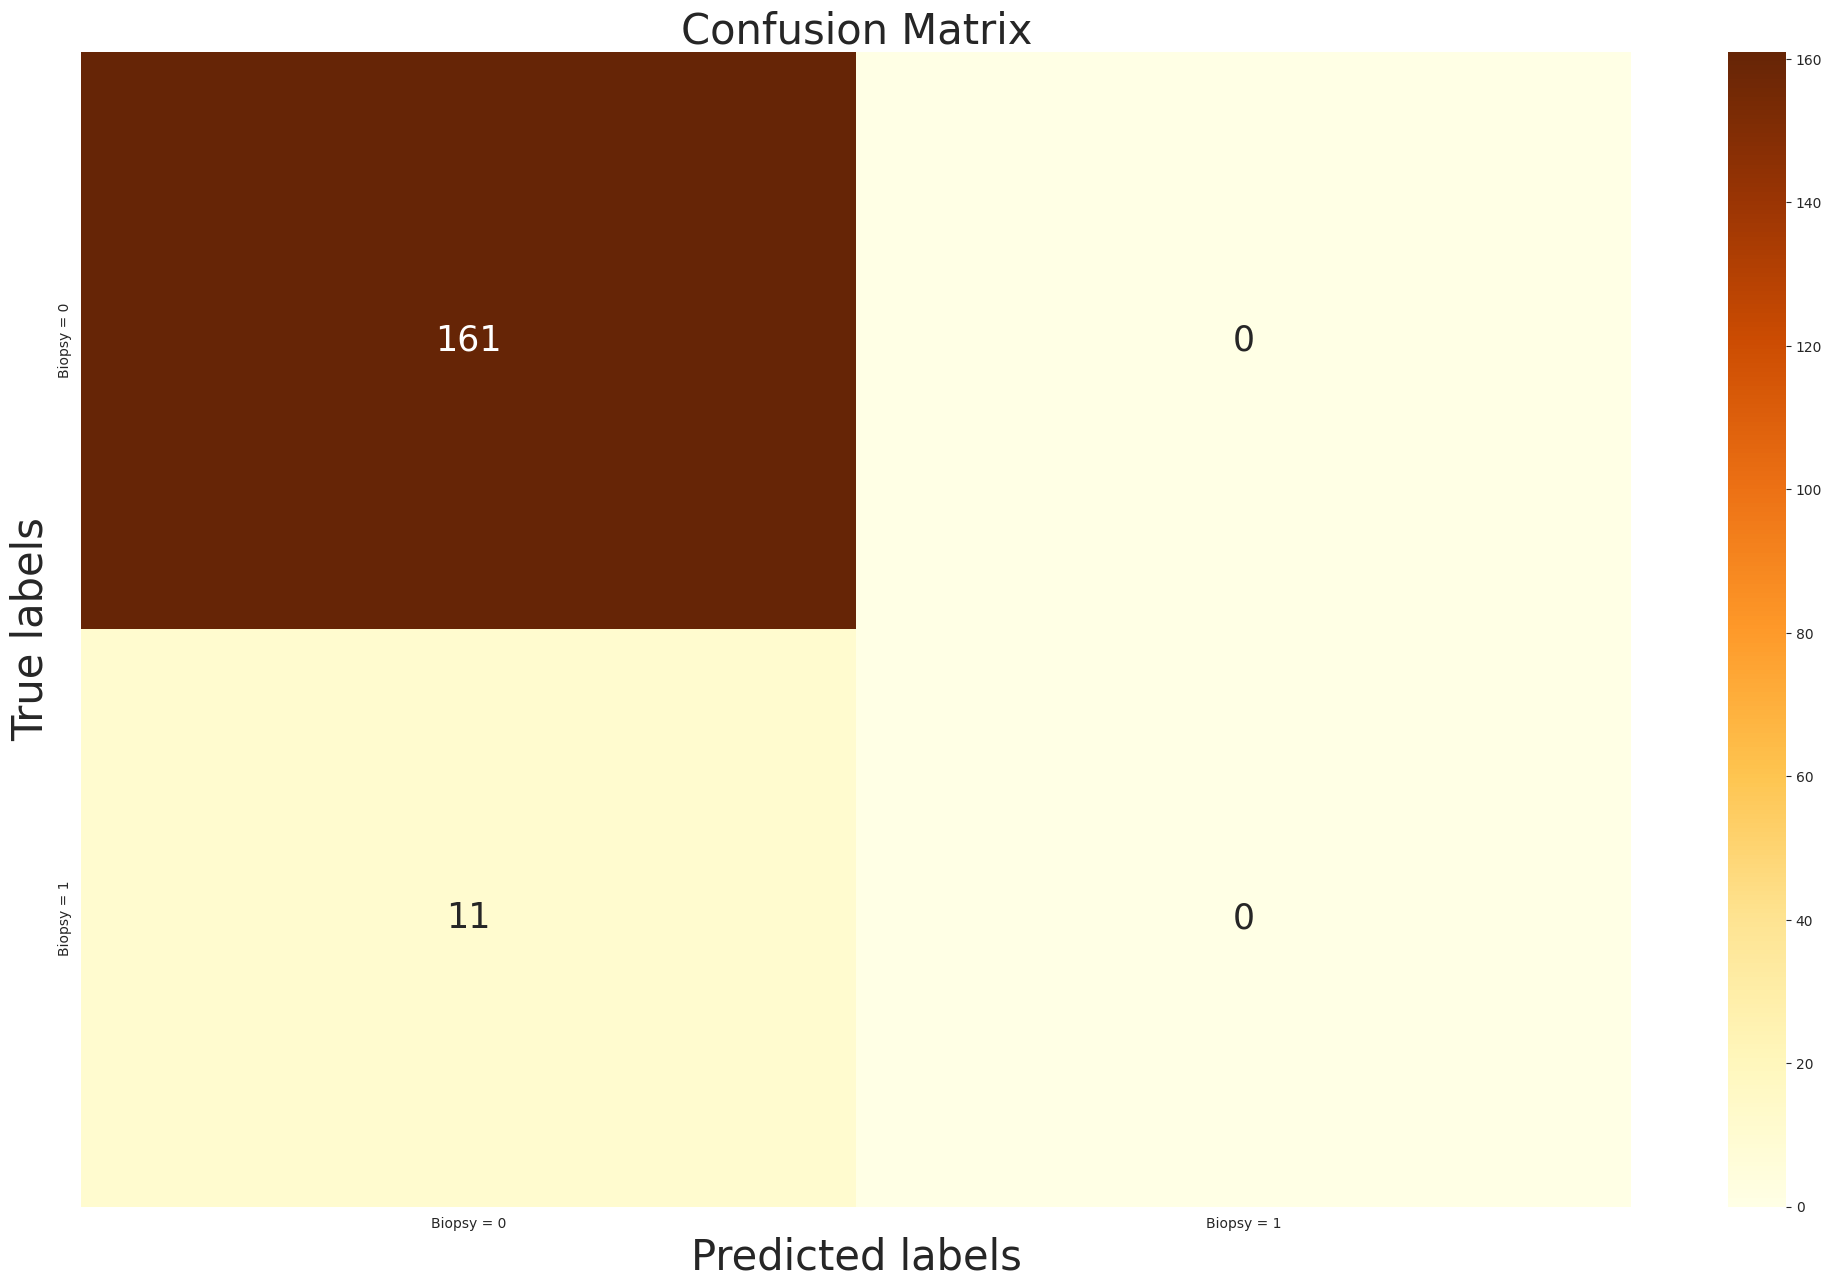

In [ ]:
#Confusion matrix:
conf_mat = confusion_matrix(y_true=y_test, y_pred = y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(conf_mat, annot=True, ax = ax, cmap='YlOrBr', fmt='g',
annot_kws={"size": 25})
ax.set_xlabel('Predicted labels', fontsize=30)
ax.set_ylabel('True labels', fontsize=30)
ax.set_title('Confusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(class_list), ax.yaxis.set_ticklabels(class_list)

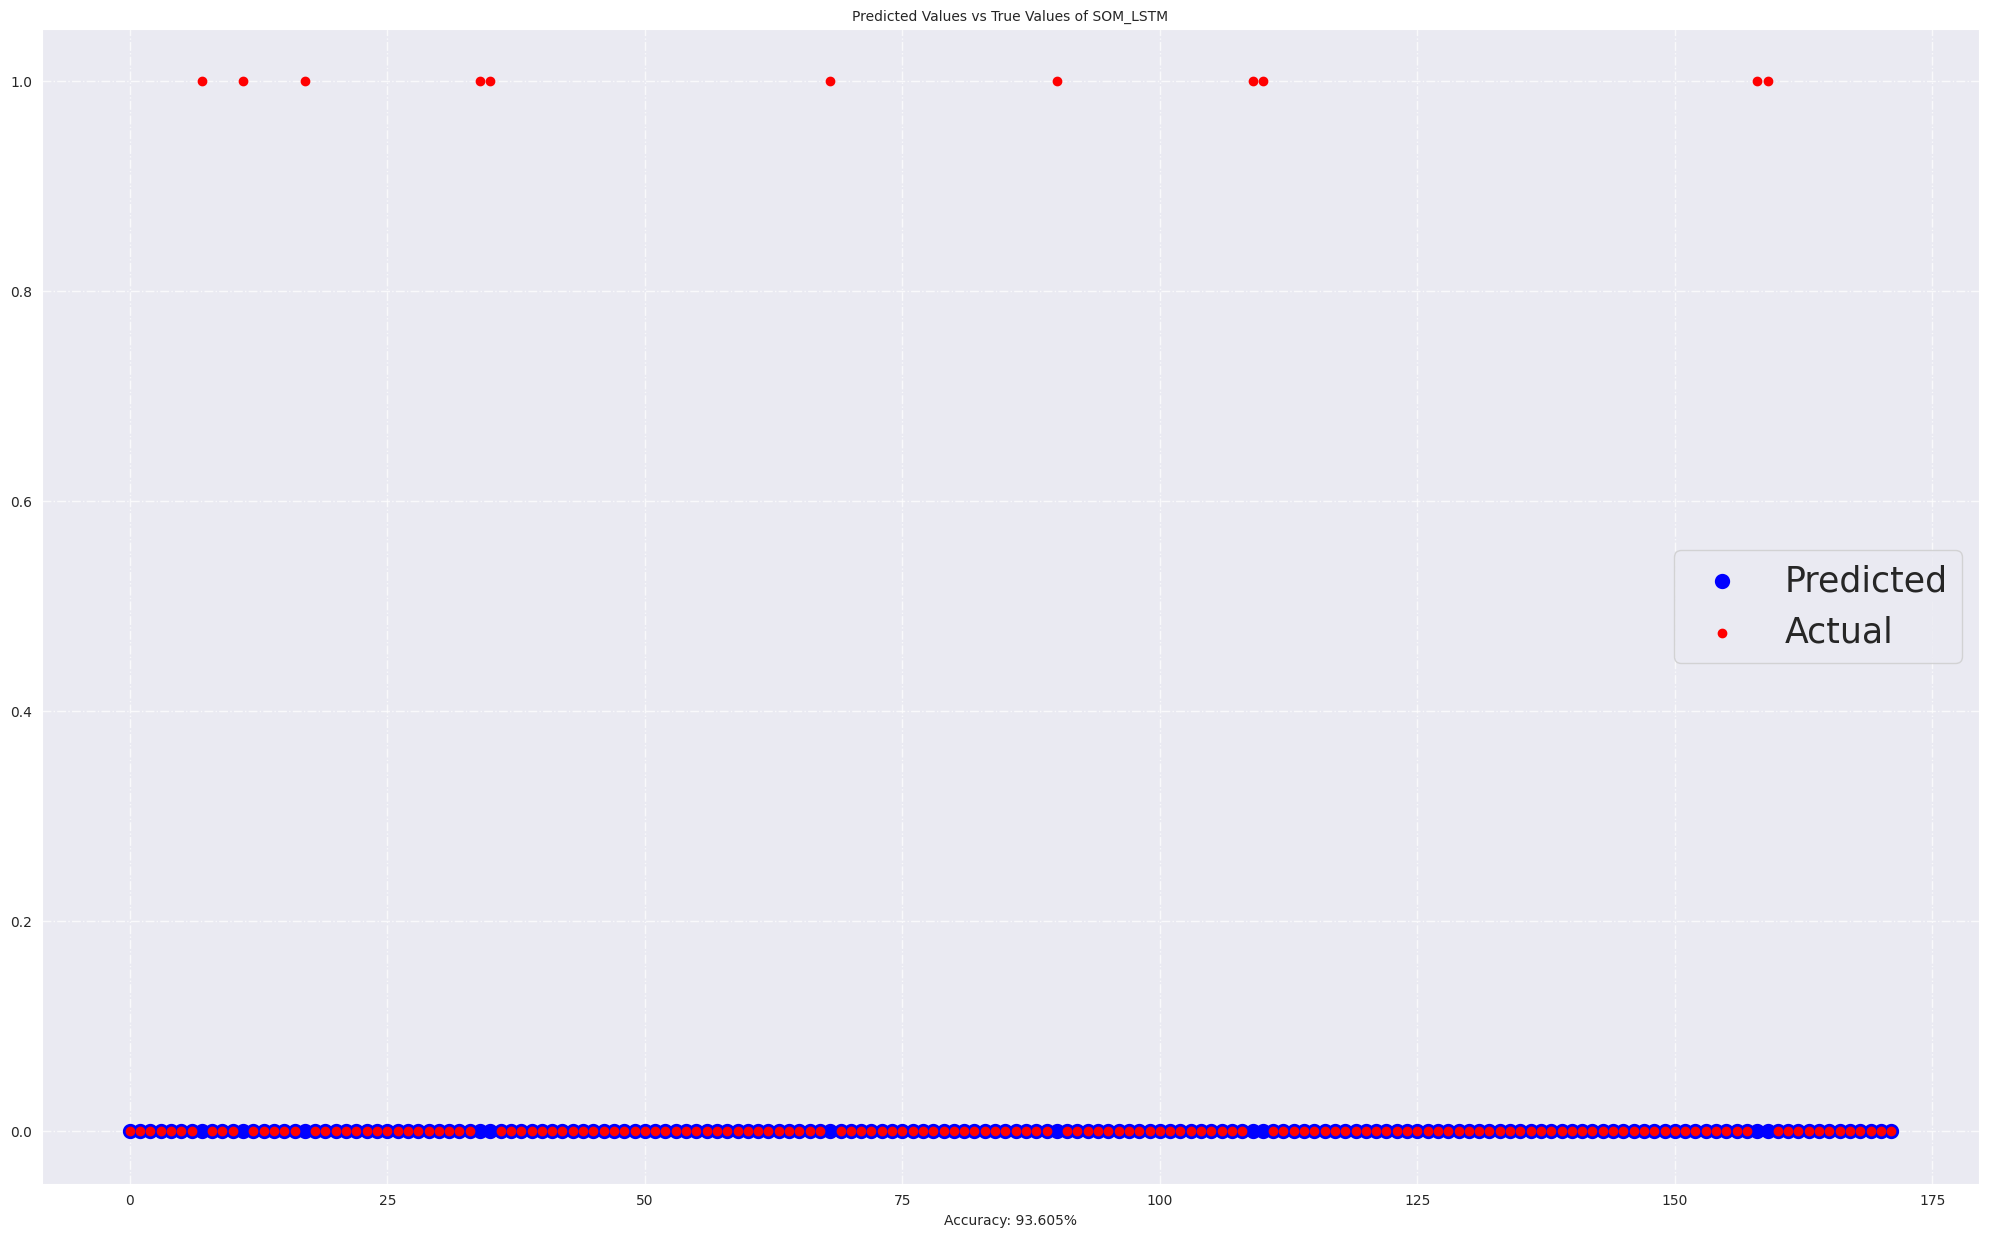

In [ ]:
def plot_real_pred_val(Y_test, ypred, name):
    plt.figure(figsize=(25,15))
    acc=accuracy_score(Y_test,ypred)

    plt.scatter(range(len(ypred)),ypred,color="blue",lw=5,label="Predicted")
    plt.scatter(range(len(Y_test)), Y_test,color="red",label="Actual")
    plt.title("Predicted Values vs True Values of " + name, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc*100),3)) + "%")
    plt.legend(fontsize=25)
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()
plot_real_pred_val(y_test, y_pred, 'SOM_LSTM')

**6. Cervical Cancer Using Deep Belief Networks (DBNs) Model**

In [ ]:
X = df.drop('Biopsy', axis=1).apply(pd.to_numeric,
errors='coerce').astype('float64')
y = df["Biopsy"]
sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X, y.ravel())
# Splits the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=2021, stratify=y)
# Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Create a Deep Belief Network (DBN)
dbn_model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(units=500, input_dim=33,kernel_initializer='uniform', activation='relu'),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(units=200, kernel_initializer='uniform',activation='relu'),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(units=1, kernel_initializer='uniform',activation='sigmoid')
])
print(dbn_model.summary()) # Display the model summary
# Compile the DBN model
dbn_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# Train the DBN model
history = dbn_model.fit(X_train, y_train, batch_size=64,validation_split=0.20, epochs=50, shuffle=True)
# Save the DBN model
dbn_model.save('cervical_dbn_model.h5')
# Save history into npy file
np.save('cervical_dbn_history.npy', history.history)
print(history.history.keys())


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 500)                 │          17,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 200)                 │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,401 (458.60 KB)

 Trainable params: 117,401 (458.60 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7768 - loss: 0.6398 - val_accuracy: 0.8638 - val_loss: 0.4377
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9305 - loss: 0.3121 - val_accuracy: 0.9066 - val_loss: 0.3059
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9568 - loss: 0.1376 - val_accuracy: 0.9261 - val_loss: 0.3096
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9588 - loss: 0.1259 - val_accuracy: 0.9261 - val_loss: 0.2929
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9705 - loss: 0.0948 - val_accuracy: 0.9416 - val_loss: 0.2923
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9824 - loss: 0.0668 - val_accuracy: 0.9416 - val_loss: 0.2876
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9778 - loss: 0.0896 - val_accuracy: 0.9300 - val_loss: 0.2807
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9655 - loss: 0.0970 - val_accuracy: 0.9455

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


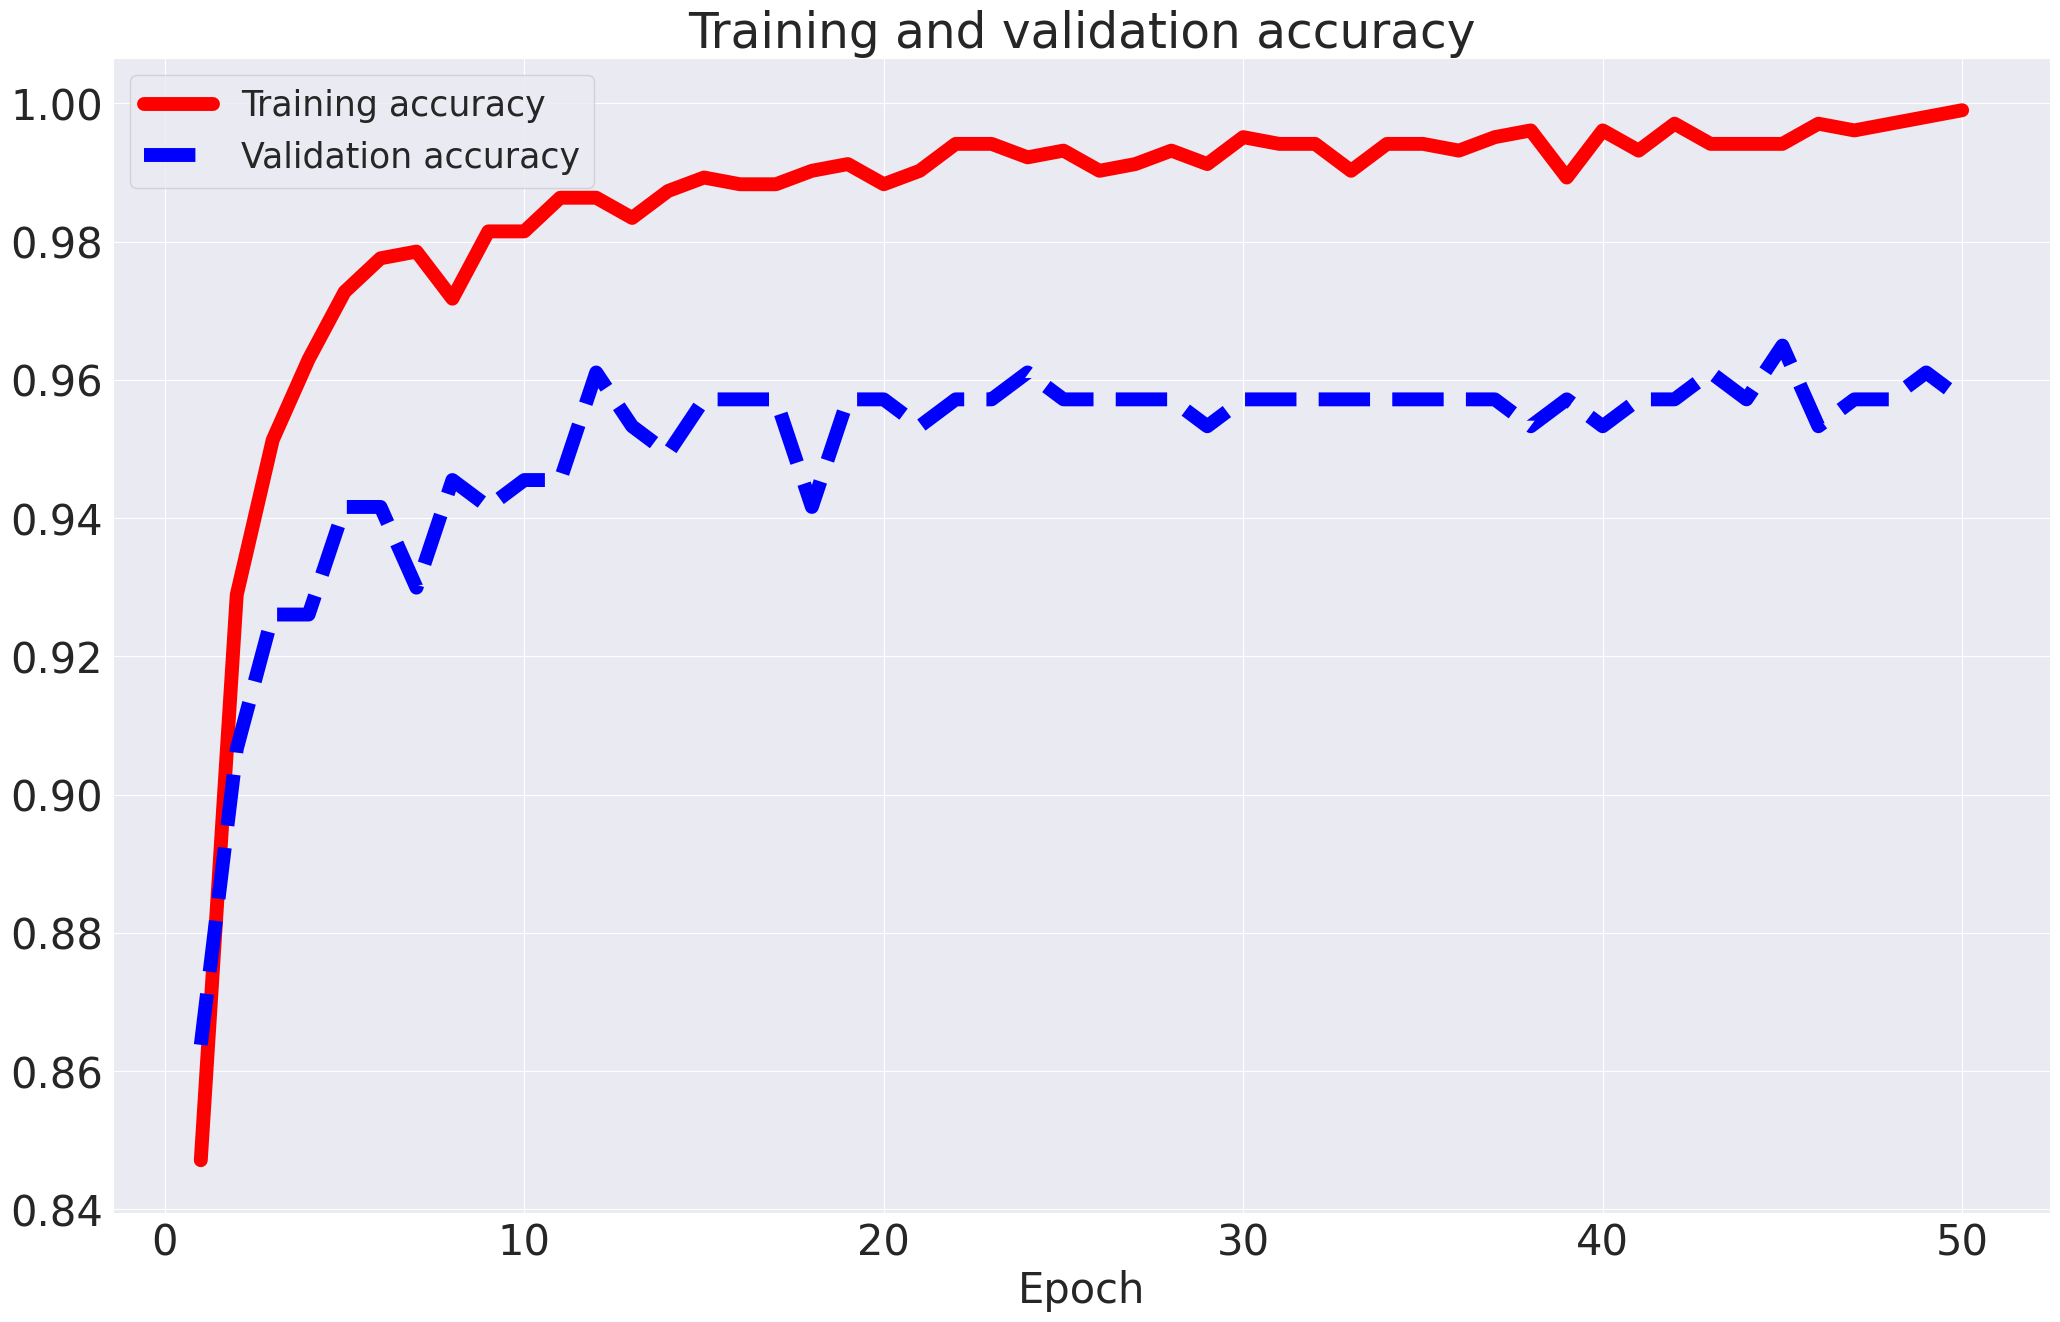

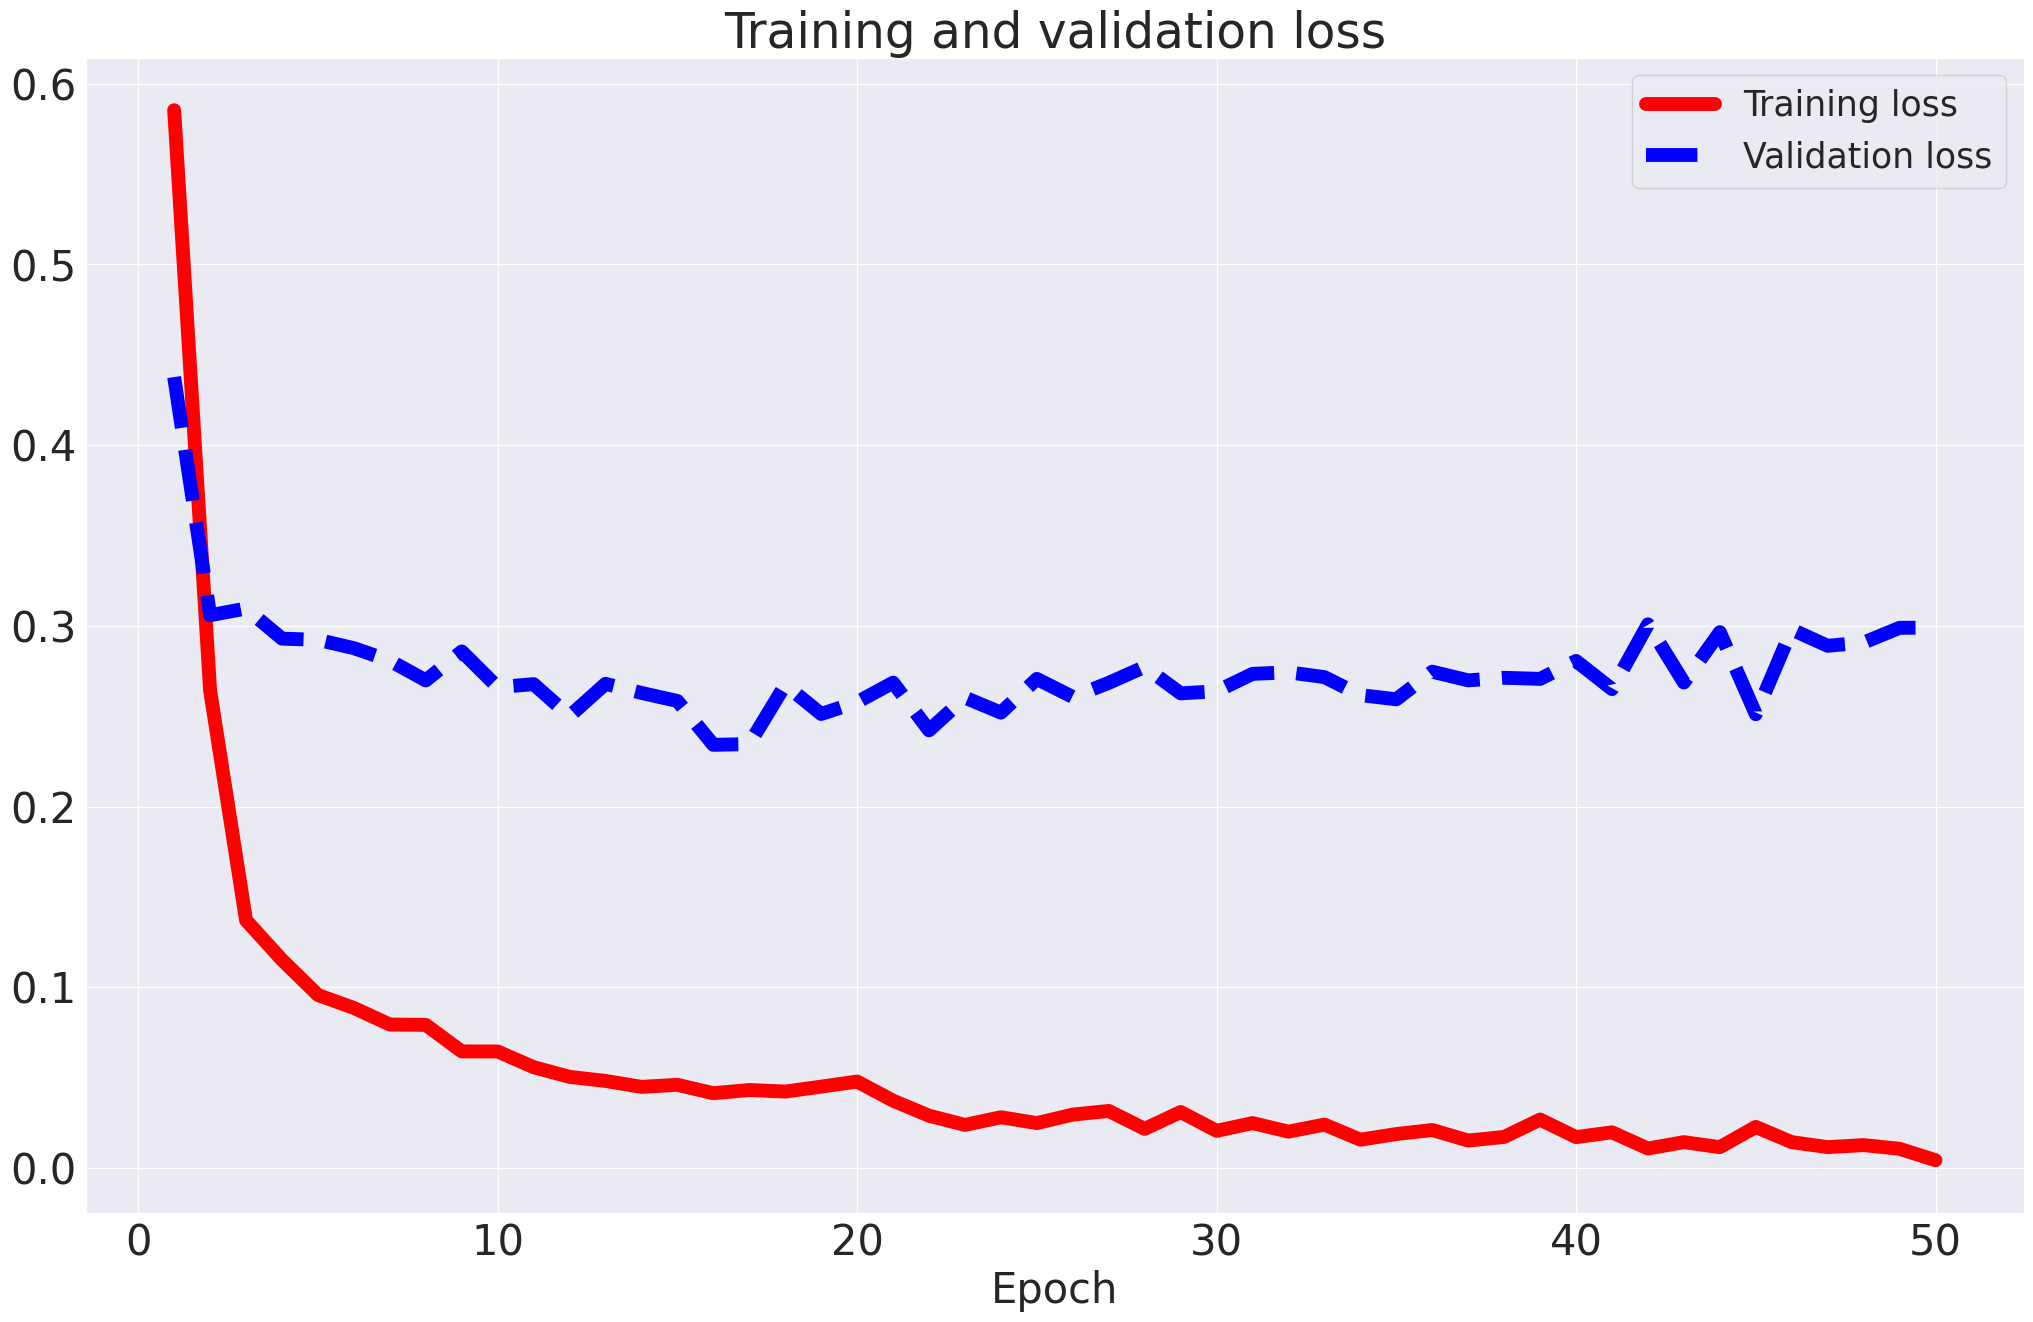

In [ ]:
# Plots accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# Accuracy
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, acc, 'r', label='Training accuracy', lw=10)
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy', lw=10)
plt.title('Training and validation accuracy', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()
# Loss
fig, ax = plt.subplots(figsize=(25, 15))
plt.plot(epochs, loss, 'r', label='Training loss', lw=10)
plt.plot(epochs, val_loss, 'b--', label='Validation loss', lw=10)
plt.title('Training and validation loss', fontsize=35)
plt.legend(fontsize=25)
ax.set_xlabel("Epoch", fontsize=30)
ax.tick_params(labelsize=30)
plt.show()

In [ ]:
# Sets the threshold for the predictions. In this case, the threshold is 0.5 (this value can be modified).
# Prediction on test set
y_pred = dbn_model.predict(X_test)
y_pred = [int(p>=0.5) for p in y_pred]
print(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
# Performance Evaluation - Accuracy and Classification Report
# Accuracy Score
print('Accuracy Score : ', accuracy_score(y_pred, y_test,normalize=True), '\n')
# Precision, recall report
print('Classification Report :\n\n', classification_report(y_pred,y_test))

Accuracy Score :  0.9751552795031055 

Classification Report :

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       153
           1       1.00      0.95      0.98       169

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



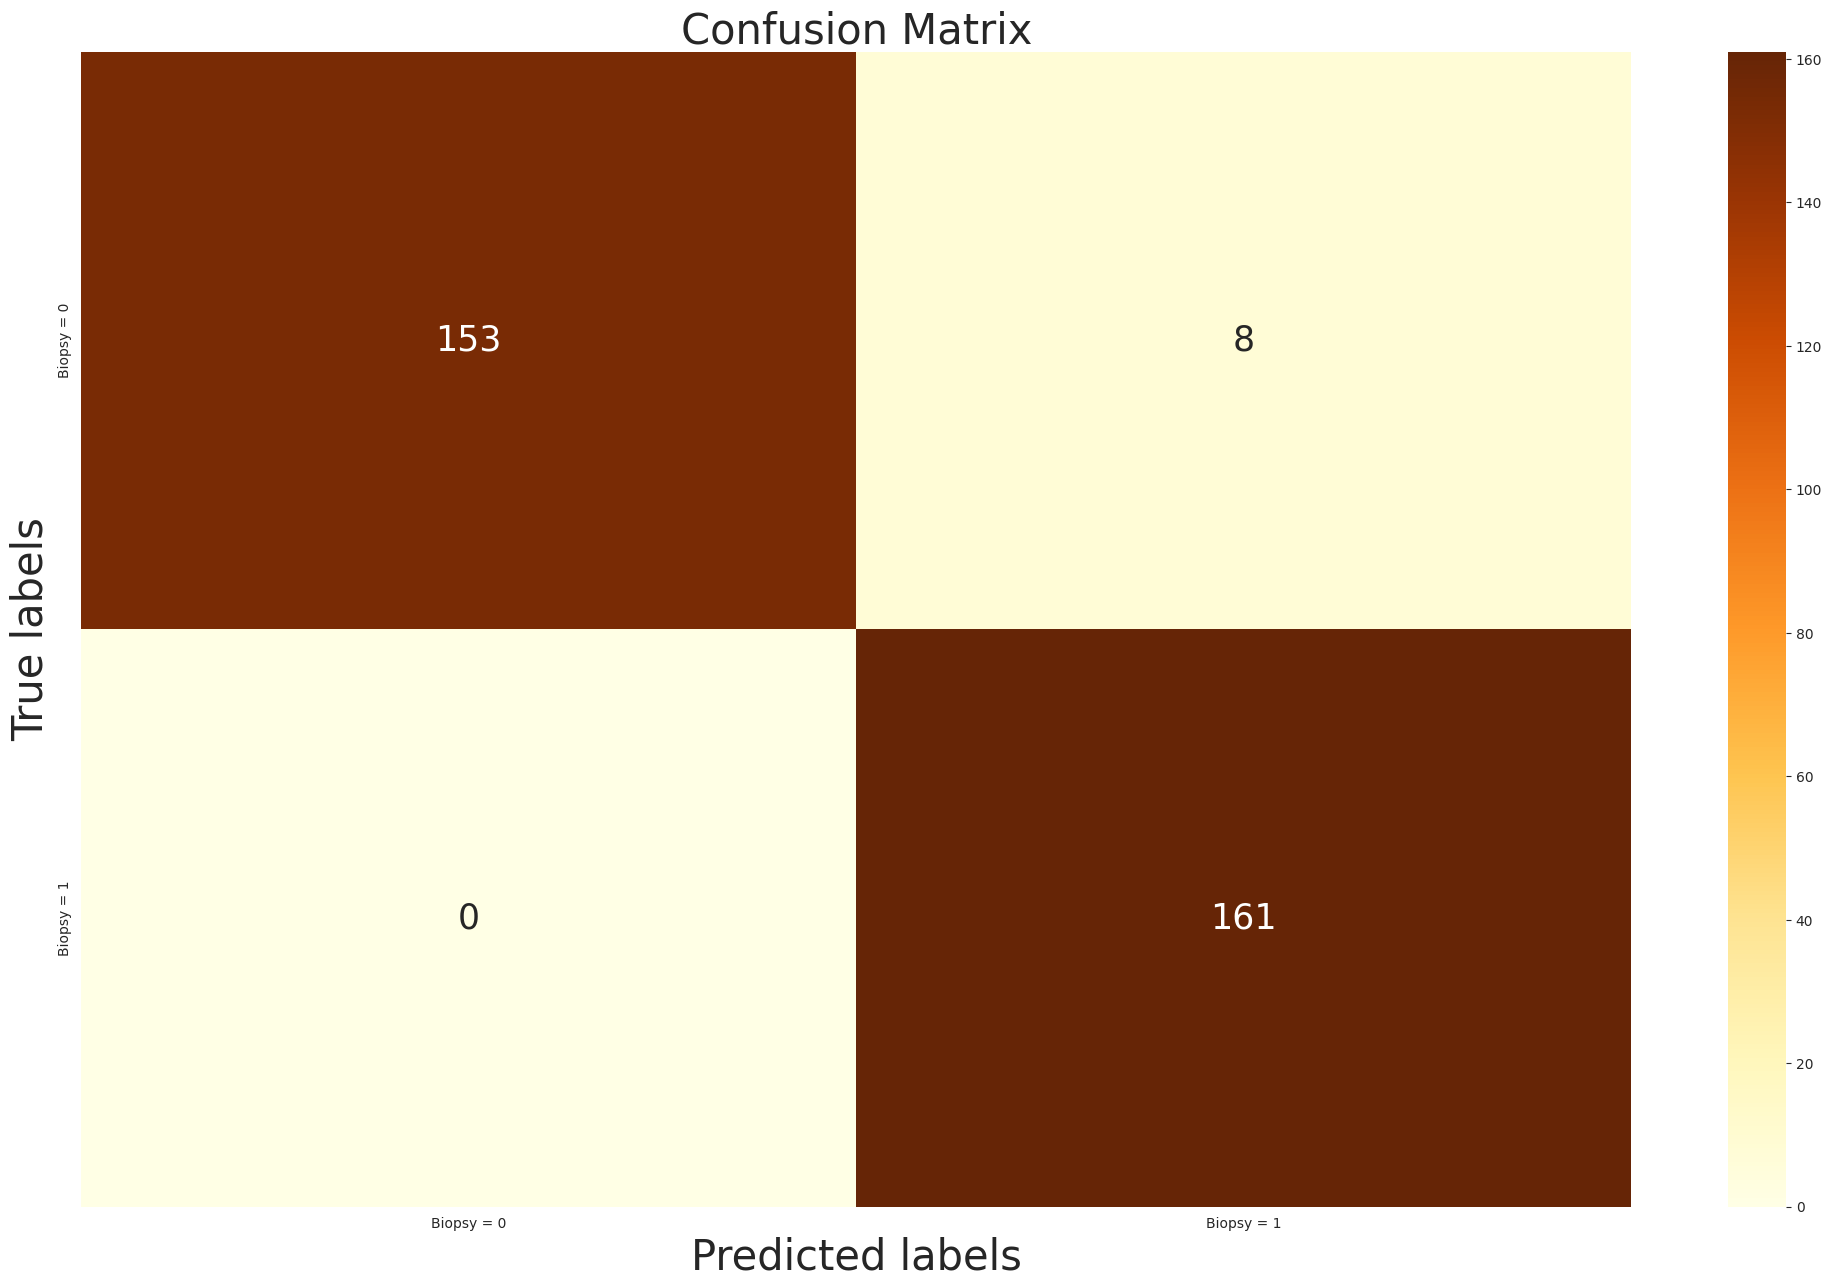

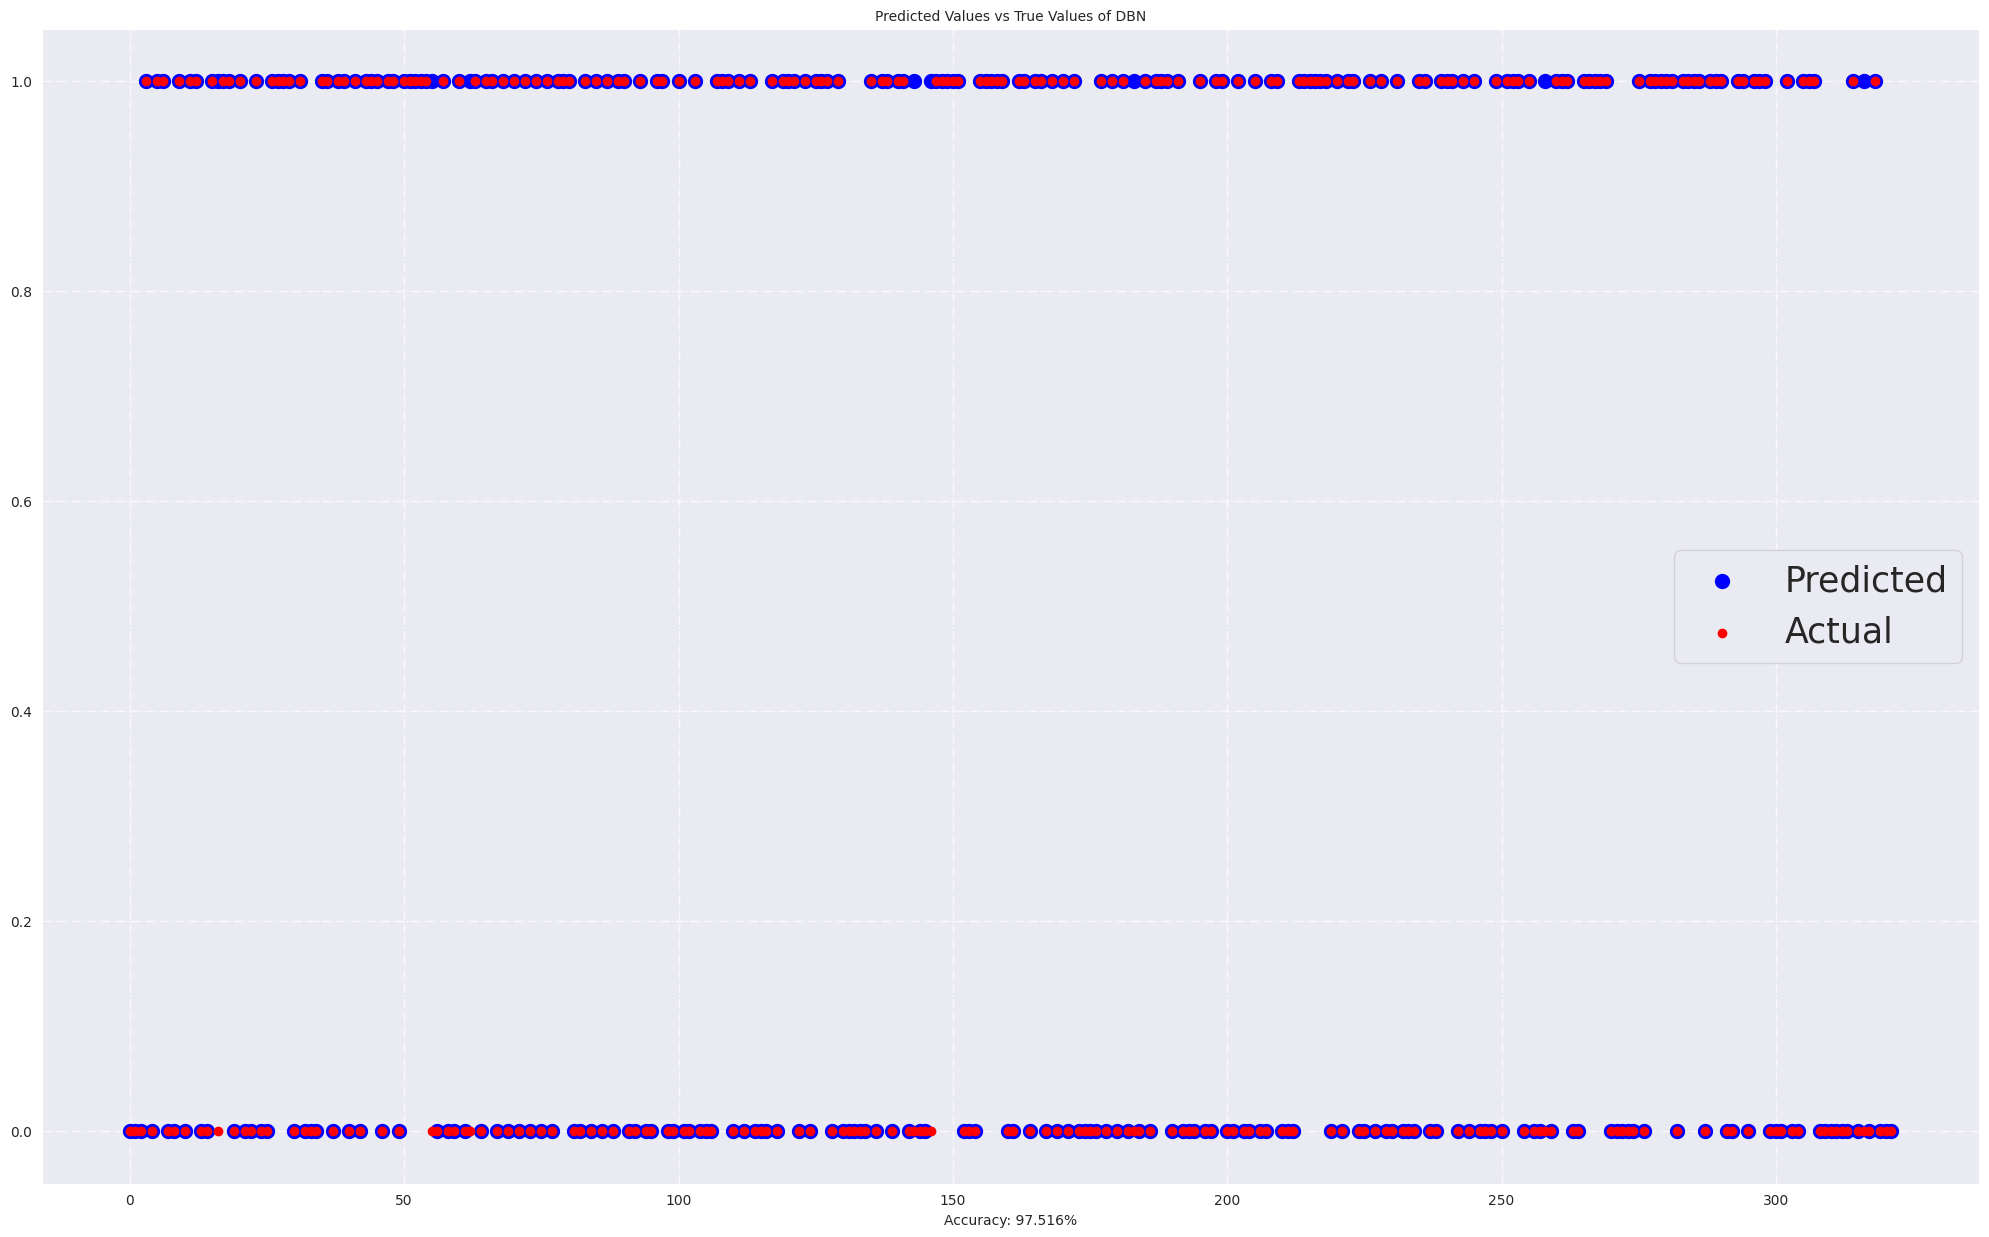

In [ ]:
# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(conf_mat, annot=True, ax=ax, cmap='YlOrBr',fmt='g', annot_kws={"size": 25})
ax.set_xlabel('Predicted labels', fontsize=30)
ax.set_ylabel('True labels', fontsize=30)
ax.set_title('Confusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(class_list),
ax.yaxis.set_ticklabels(class_list)

plot_real_pred_val(y_test, y_pred, 'DBN')

**Cervical Cancer Using Restricted Boltzmann Machines (RBMs) Model**

In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
#Creating the RBM and Logistic Regression Classifier pipeline
rbm = BernoulliRBM(n_components=256, n_iter=10,
learning_rate=0.01, verbose=True)
logreg = LogisticRegression(max_iter=100, random_state=42)
rbm_features_classifier = Pipeline(
 steps=[('rbm', rbm), ('logreg', logreg)])

In [ ]:
# Reshape X_train to 2D before fitting to BernoulliRBM
X_train_2d = X_train.reshape(X_train.shape[0], -1)

# Now fit the RBM with the reshaped data
rbm_features_classifier.fit(X_train_2d, y_train)

# Similarly, reshape X_test before predicting
X_test_2d = X_test.reshape(X_test.shape[0], -1)
y_pred = rbm_features_classifier.predict(X_test_2d)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -75.98, time = 0.04s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -140.68, time = 0.10s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -205.67, time = 0.13s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -221.60, time = 0.12s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -252.36, time = 0.16s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -326.93, time = 0.16s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -361.80, time = 0.18s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -374.72, time = 0.17s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -400.34, time = 0.18s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -404.88, time = 0.18s


In [ ]:

#Performance Evaluation - Accuracy and Classification Report
#Accuracy Score
print ('Accuracy Score : ', accuracy_score(y_pred, y_test,normalize=True), '\n')
#Precision, recall report
print ('Classification Report :\n\n' ,classification_report(y_pred, y_test))

Accuracy Score :  0.5186335403726708 

Classification Report :

               precision    recall  f1-score   support

           0       0.80      0.51      0.62       252
           1       0.24      0.54      0.33        70

    accuracy                           0.52       322
   macro avg       0.52      0.53      0.48       322
weighted avg       0.68      0.52      0.56       322



([Text(0.5, 0, 'Biopsy = 0'), Text(1.5, 0, 'Biopsy = 1')],
 [Text(0, 0.5, 'Biopsy = 0'), Text(0, 1.5, 'Biopsy = 1')])

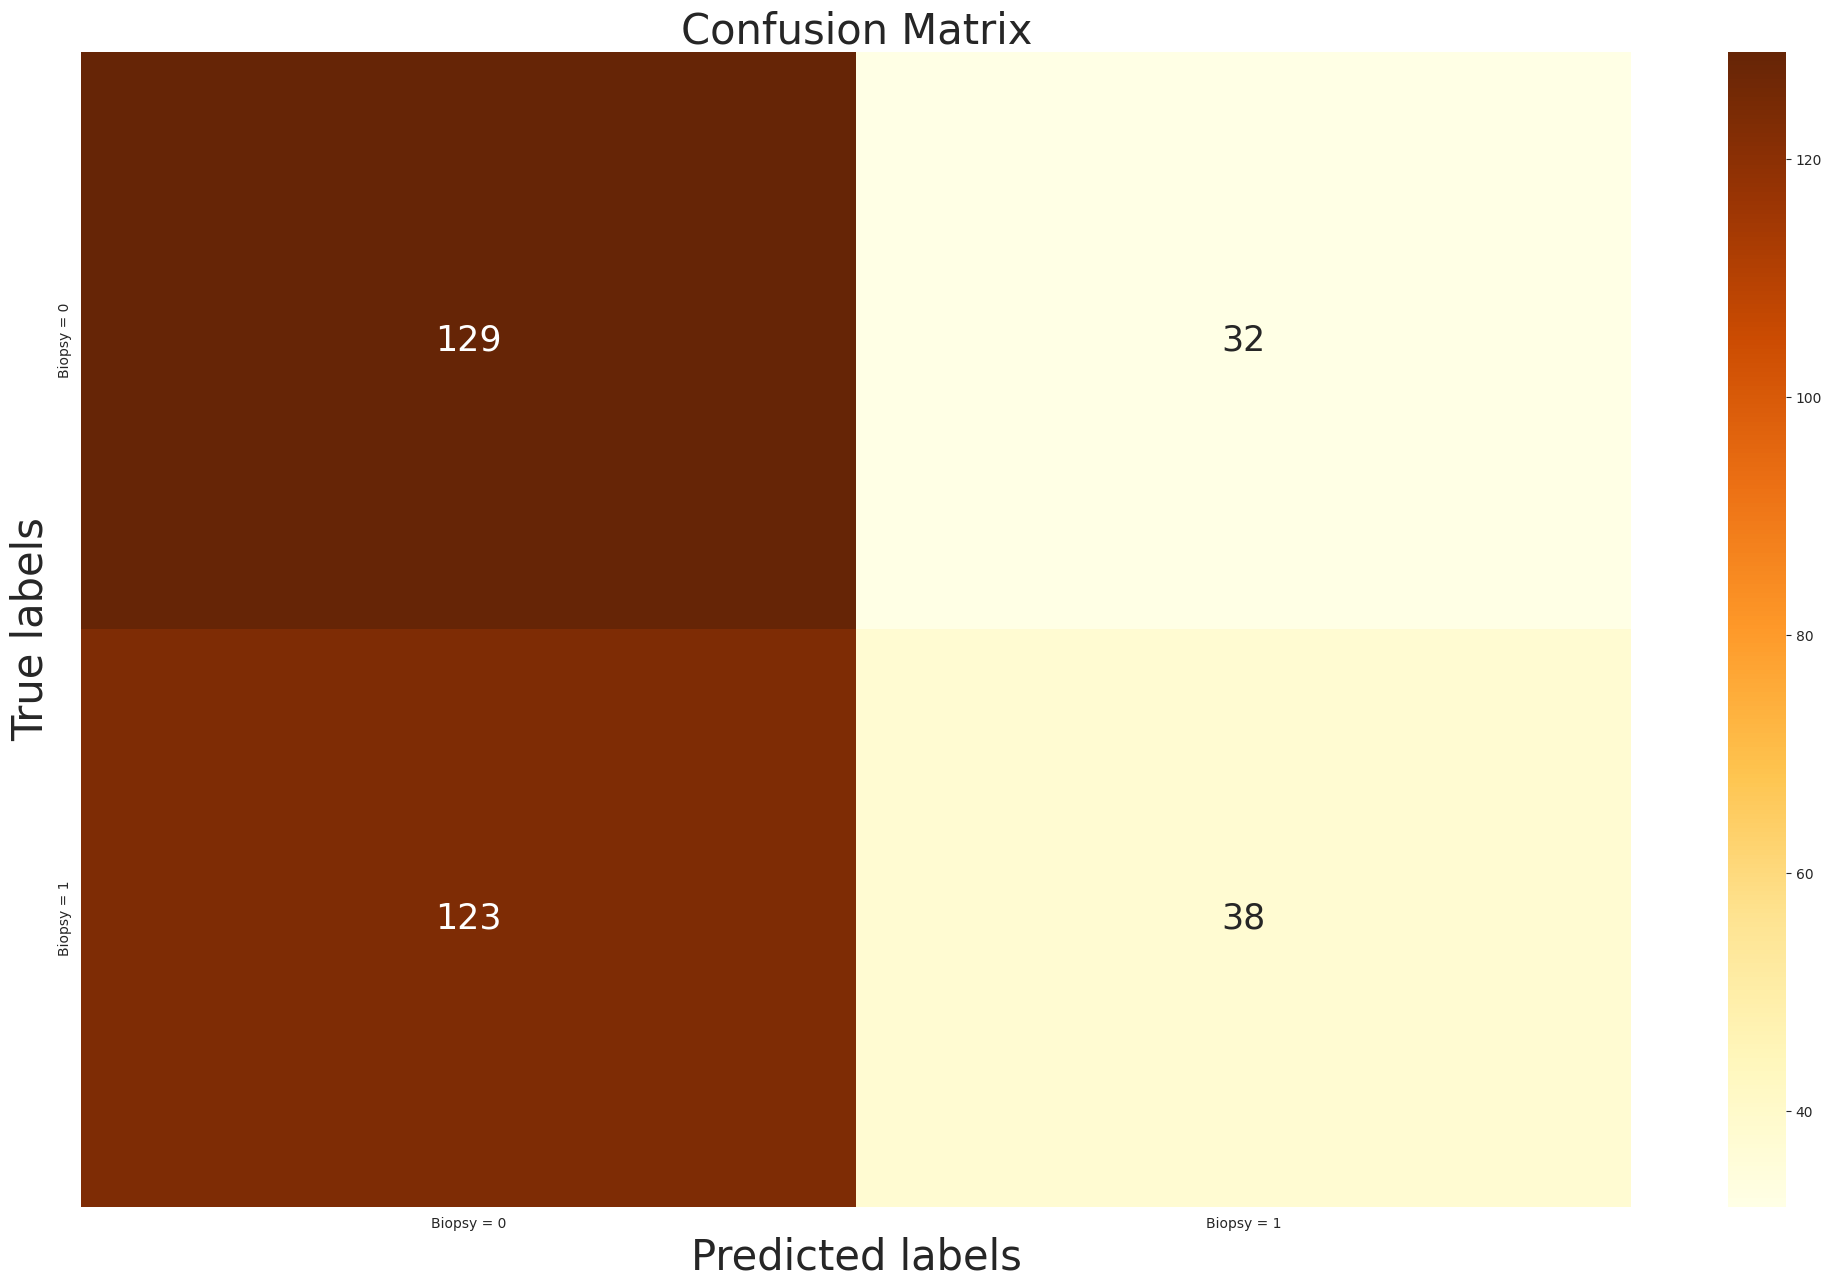

In [ ]:
#Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred = y_pred)
class_list = ['Biopsy = 0', 'Biopsy = 1']
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(conf_mat, annot=True, ax = ax, cmap='YlOrBr', fmt='g',annot_kws={"size": 25})
ax.set_xlabel('Predicted labels', fontsize=30)
ax.set_ylabel('True labels', fontsize=30)
ax.set_title('Confusion Matrix', fontsize=30)
ax.xaxis.set_ticklabels(class_list), ax.yaxis.set_ticklabels(class_list)

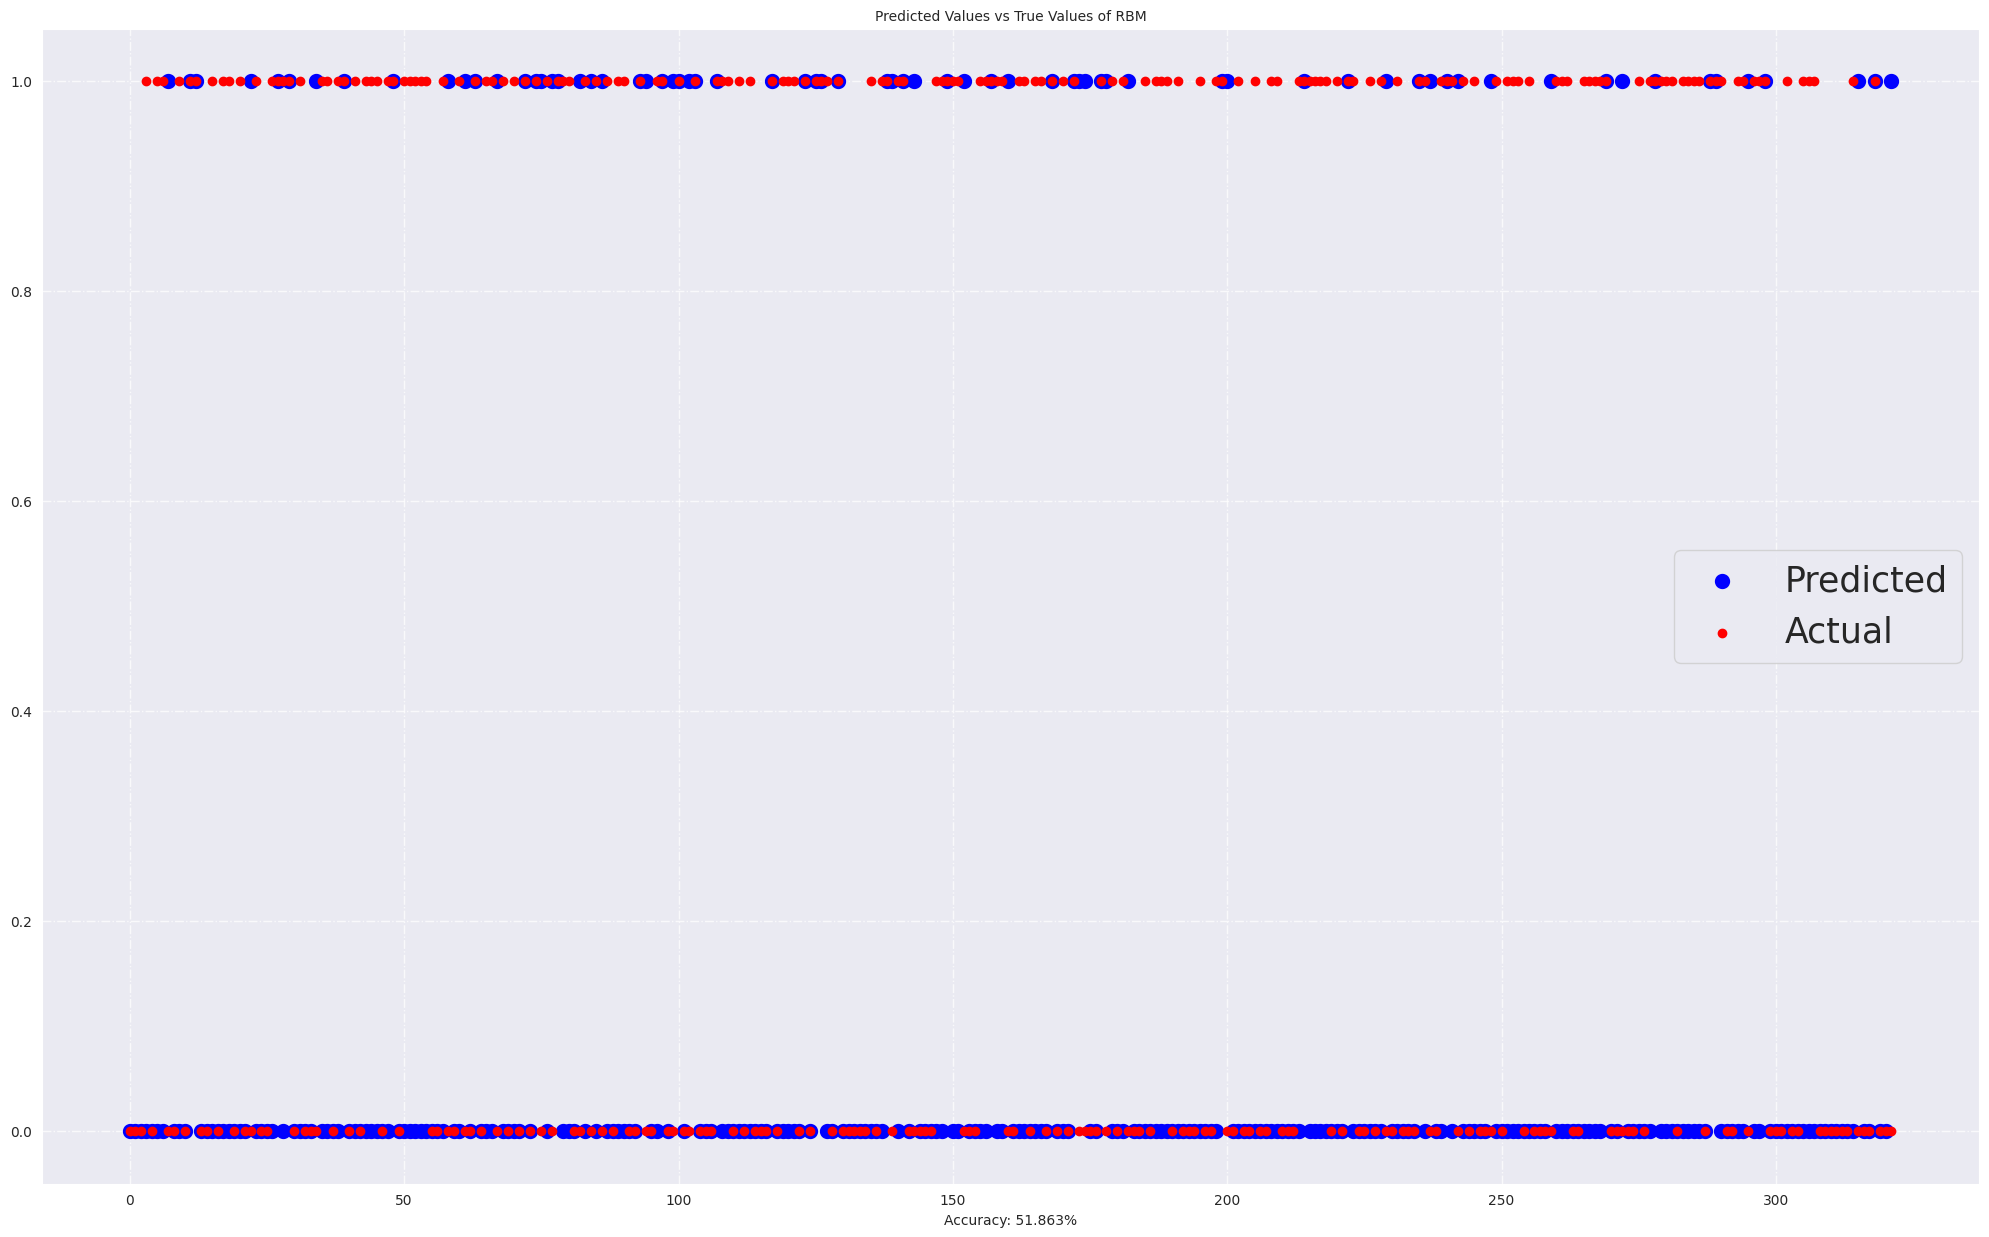

In [ ]:
def plot_real_pred_val(Y_test, ypred, name):
    plt.figure(figsize=(25,15))/*
    acc=accuracy_score(Y_test,ypred)

    plt.scatter(range(len(ypred)),ypred,color="blue",lw=5,label="Predicted")
    plt.scatter(range(len(Y_test)), Y_test,color="red",label="Actual")
    plt.title("Predicted Values vs True Values of " + name, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc*100),3)) + "%")
    plt.legend(fontsize=25)
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()
plot_real_pred_val(y_test, y_pred, 'RBM')

**High-Accuracy Model Comparison**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
                ANN       RNN       CNN      LSTM
Accuracy   0.973684  0.956140  0.973684  0.964912
Precision  0.972222  0.958333  0.972222  0.958904
Recall     0.985915  0.971831  0.985915  0.985915
F1 Score   0.979021  0.965035  0.979021  0.972222
AUC-ROC    0.969702  0.951032  0.969702  0.958074


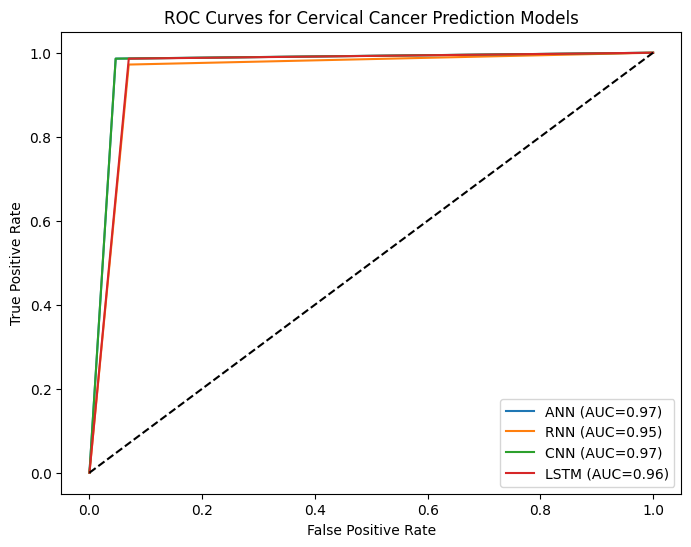

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Conv1D, Flatten, LSTM

# Load Dataset (Breast Cancer from sklearn)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN & RNN models
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ✅ Define and Train Models

# ANN Model
def create_ann():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model = create_ann()
ann_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int).flatten()

# RNN Model
def create_rnn():
    model = Sequential([
        SimpleRNN(32, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = create_rnn()
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=16, verbose=0)
y_pred_rnn = (rnn_model.predict(X_test_rnn) > 0.5).astype(int).flatten()

# CNN Model
def create_cnn():
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn()
cnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=16, verbose=0)
y_pred_cnn = (cnn_model.predict(X_test_rnn) > 0.5).astype(int).flatten()

# LSTM Model
def create_lstm():
    model = Sequential([
        LSTM(32, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm()
lstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=16, verbose=0)
y_pred_lstm = (lstm_model.predict(X_test_rnn) > 0.5).astype(int).flatten()

# ✅ Evaluate Models
models = {
    "ANN": y_pred_ann,
    "RNN": y_pred_rnn,
    "CNN": y_pred_cnn,
    "LSTM": y_pred_lstm,
}

results = {}
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    results[model_name] = [accuracy, precision, recall, f1, auc]

# Convert results to DataFrame
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"])
print(df_results)



# ✅ Plot ROC Curve
plt.figure(figsize=(8, 6))
for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc_score(y_test, y_pred):.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Cervical Cancer Prediction Models")
plt.legend()
plt.show()


HYBRID MODEL

In [ ]:
me

In [ ]:
#1. Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from imblearn.over_sampling import SMOTE


#2. Data Loading and Preprocessing
# Load the cervical cancer dataset (replace with your actual file path)
df = pd.read_csv("/content/drive/MyDrive/SEM-4/kag_risk_factors_cervical_cancer.csv")

# Preprocessing: Replace '?' with NaN and convert to numeric
df = df.replace('?', np.nan)
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Impute missing values using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df.drop('Biopsy', axis=1))
y = df['Biopsy'].values

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define and train your models (ANN, LSTM, KNN, Logistic Regression)
# ... (Your model definitions and training code) ...

#3. Model Definition and Training

# Define the ANN Model (model_ann)
model_ann = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# ... (Rest of your code ...

# Assuming you have trained your KNN and Logistic Regression models:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Example KNN model
knn_model.fit(X_train, y_train)
knn_train_preds = knn_model.predict(X_train)
knn_test_preds = knn_model.predict(X_test)

log_reg_model = LogisticRegression()  # Example Logistic Regression model
log_reg_model.fit(X_train, y_train)
log_reg_train_preds = log_reg_model.predict(X_train)
log_reg_test_preds = log_reg_model.predict(X_test)

# ... (Rest of the code remains the same)

# Define the LSTM Model (model_lstm)
model_lstm = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=0)

#4. Stacking Predictions

ann_train_preds = model_ann.predict(X_train)
ann_test_preds = model_ann.predict(X_test)

# ... (Rest of the code remains the same)

lstm_train_preds = model_lstm.predict(X_train_lstm)
lstm_test_preds = model_lstm.predict(X_test_lstm)

lb = LabelBinarizer()
lb.fit(y_train)  # Fit using the training labels

knn_train_preds_onehot = lb.transform(knn_train_preds)
knn_test_preds_onehot = lb.transform(knn_test_preds)

log_reg_train_preds_onehot = lb.transform(log_reg_train_preds)
log_reg_test_preds_onehot = lb.transform(log_reg_test_preds)

# Stack Predictions
# Stacking predictions of training set
meta_train = np.column_stack((ann_train_preds,
                              lstm_train_preds,
                              knn_train_preds_onehot,
                              log_reg_train_preds_onehot))

# Stacking predictions of testing set
meta_test = np.column_stack((ann_test_preds,
                             lstm_test_preds,
                             knn_test_preds_onehot,
                             log_reg_test_preds_onehot))

#5. Training and Evaluating the Final Classifier

# 6. Train Random Forest Classifier as Final Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(meta_train, y_train)

# 7. Evaluate Random Forest Classifier
final_predictions = rf_classifier.predict(meta_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print("Final Ensemble Model Accuracy: ", final_accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Final Ensemble Model Accuracy:  0.9813664596273292


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(meta_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
best_rf_classifier = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100)
# ... (Rest of your code remains the same) ...

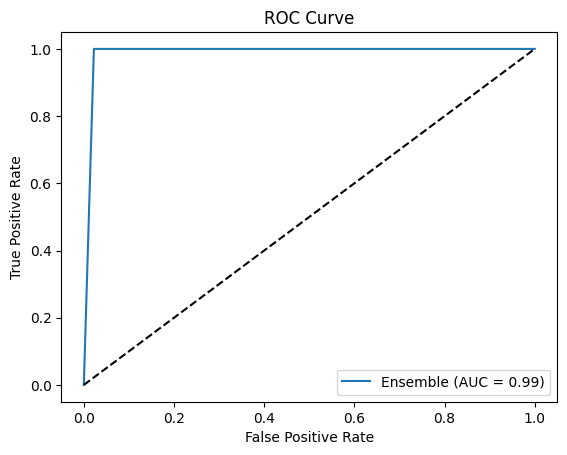

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ... (Your previous code remains the same)

# Get the predictions from the ensemble model (Random Forest in your case)
y_pred_ensemble = rf_classifier.predict(meta_test)  # Assuming rf_classifier is your final model

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ensemble)
auc = roc_auc_score(y_test, y_pred_ensemble)

plt.plot(fpr, tpr, label=f"Ensemble (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()